In [123]:
import sys
import os
import os.path
import io
import csv
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import gamma
from scipy import integrate

# plt.rcParams.update({'font.size': 16})
import pandas as pd
from scipy.stats import gamma

# Generation of SBATCH files

Batch file creation function :

In [238]:
def batchwriter(pathtofile="analyses/scaling_param/",files_name="simul", time=24, nodes=1, ntaskspernode=1, mem=2, partition="normal", params_names=[], params_values=[],pathtoexe="../../meiosis"):
        if os.path.exists(pathtofile)==False:
            os.makedirs(pathtofile)
        batchfile= open("{0}Run_{1}.sh".format(pathtofile,files_name),"w+")
        batchfile.write("#!/bin/bash\n")
        batchfile.write("#SBATCH --partition={0}\n".format(partition))
        batchfile.write("#SBATCH --time={0}:00:00\n".format(time))
        batchfile.write("#SBATCH --nodes={0}\n".format(nodes))
        batchfile.write("#SBATCH --ntasks-per-node={0}\n".format(ntaskspernode))
        batchfile.write("#SBATCH --mem={0}gb\n".format(mem))
        batchfile.write("#SBATCH -o Run_{0}.out\n".format(files_name))
        batchfile.write("#SBATCH -e Run_{0}.err\n".format(files_name))
        batchfile.write("\n")
        batchfile.write(pathtoexe)
        for param in range(len(params_names)):
            batchfile.write(" -"+params_names[param]+" {0}".format(params_values[param]))
        batchfile.write(" Run_{0}".format(files_name))
        batchfile.close()

In [239]:
#batchwriter(files_name="V4",params_names=["u","v","w","N"],params_values=[1e-5,1e-4,1e-2,10000],pathtoexe="./meiosis")
batchwriter()

Creation of directory of batch files :

In [240]:
def scaling_U(params_list=["1e-2","1e-3","1e-4","1e-5","1e-6","1e-7","1e-8"],N=1000,nbGenerations=50000,time=24,path_to_folder="analyses/",path_to_exe="../../meiosis",v=1e-4,mem=2,nbcore=1):
    index_u=1
    path=path_to_folder+"scaling_U_{0}/".format(index_u)
    print(os.path.exists(path))
    while os.path.exists(path):
        index_u+=1
        path=path_to_folder+"scaling_U_{0}/".format(index_u)
        print(path)
    for i in range (len(params_list)):
        batchwriter(pathtofile=path,files_name="U_{0}".format(params_list[i]), params_names=["u","N","nbGenerations","v","nbcore"], params_values=[float(params_list[i]),N,nbGenerations,v,nbcore],pathtoexe=path_to_exe,time=time,mem=mem)

In [241]:
scaling_U(time=168,path_to_folder="analyses/",path_to_exe="../../meiosis",params_list=["5e-2","2e-2","5e-3","2e-3","5e-4","2e-4","5e-5","2e-5","5e-6","2e-6"],N=200,nbGenerations=100000,v=5e-5,nbcore=4)

True
analyses/scaling_U_2/
analyses/scaling_U_3/
analyses/scaling_U_4/
analyses/scaling_U_5/
analyses/scaling_U_6/
analyses/scaling_U_7/
analyses/scaling_U_8/
analyses/scaling_U_9/
analyses/scaling_U_10/
analyses/scaling_U_11/
analyses/scaling_U_12/
analyses/scaling_U_13/
analyses/scaling_U_14/


In [242]:
def scaling_V(params_list=["1e-2","1e-3","1e-4","1e-5","1e-6","1e-7","1e-8"],N=1000,nbGenerations=50000,time=24,path_to_folder="analyses/",path_to_exe="../../meiosis",u=1e-4,mem=2,nbcore=1):
    index_v=1
    path=path_to_folder+"scaling_V_{0}/".format(index_v)
    print(os.path.exists(path))
    while os.path.exists(path):
        index_v+=1
        path=path_to_folder+"scaling_V_{0}/".format(index_v)
        print(path)
    for i in range (len(params_list)):
        batchwriter(pathtofile=path,files_name="V_{0}".format(params_list[i]), params_names=["v","N","nbGenerations","u"], params_values=[float(params_list[i]),N,nbGenerations,u,nbcore],pathtoexe=path_to_exe,time=time,mem=mem)

In [243]:
scaling_V(nbGenerations=100000,time=168,path_to_folder="analyses/",path_to_exe="../../meiosis",params_list=["5e-3","2e-3","5e-4","2e-4","5e-5","2e-5","5e-6","2e-6"],N=200,u=5e-3,nbcore=4)

True
analyses/scaling_V_2/
analyses/scaling_V_3/
analyses/scaling_V_4/
analyses/scaling_V_5/
analyses/scaling_V_6/
analyses/scaling_V_7/
analyses/scaling_V_8/
analyses/scaling_V_9/
analyses/scaling_V_10/
analyses/scaling_V_11/
analyses/scaling_V_12/
analyses/scaling_V_13/
analyses/scaling_V_14/


In [5]:
def scaling_N(params_list=["1e3","1e4","1e5","1e6"]):
    index_N=1
    path="analyses/scaling_N_{0}/".format(index_N)
    print(os.path.exists(path))
    while os.path.exists(path):
        index_N+=1
        path="analyses/scaling_N_{0}/".format(index_N)
        print(path)
    for i in range (len(params_list)):
        batchwriter(pathtofile=path,files_name="N_{0}".format(params_list[i]), params_names=["N"], params_values=[float(params_list[i])],pathtoexe="../../meiosis")

In [65]:
scaling_N()

True
analyses/scaling_N_2/
analyses/scaling_N_3/
analyses/scaling_N_4/


In [6]:
def scaling_M(params_list=["1e-1","1e-2","1e-3","1e-4","1e-5","1e-6","1e-7","1e-8"], nbgenmig=4000,N=1000,u=1e-4,v=1e-4,time=24,path_to_folder="analyses/",path_to_exe="../../meiosis",nbGenerations=10000):
    index_m=1
    path=path_to_folder+"scaling_M_{0}/".format(index_m)
    print(os.path.exists(path))
    while os.path.exists(path):
        index_m+=1
        path=path_to_folder+"scaling_M_{0}/".format(index_m)
        print(path)
    for i in range (len(params_list)):
        batchwriter(pathtofile=path,files_name="M_{0}".format(params_list[i]), params_names=["m","nbgenmig","N","u","v","nbGenerations"], params_values=[float(params_list[i]),nbgenmig,N,u,v,nbGenerations],pathtoexe=path_to_exe,time=time)

In [146]:
scaling_M(params_list=["1e-1","3e-2","1e-2","3e-3","1e-3","3e-4","1e-4","3e-5","1e-5","3e-6","1e-6","3e-7","1e-7","3e-8","1e-8"],time=72,u=1e-4,v=1e-4,nbgenmig=4000,N=1000,nbGenerations=10000)

True
analyses/scaling_M_2/
analyses/scaling_M_3/
analyses/scaling_M_4/
analyses/scaling_M_5/
analyses/scaling_M_6/
analyses/scaling_M_7/
analyses/scaling_M_8/


In [11]:
scaling_M(params_list=["5e-1","2e-1","5e-2","2e-2","5e-3","2e-3","5e-4","2e-4","5e-5","2e-5","5e-6","2e-6","5e-7","2e-7","5e-8","2e-8"],time=72,u=5e-5,v=5e-4,nbgenmig=10000,N=200,nbGenerations=100000)

True
analyses/scaling_M_2/
analyses/scaling_M_3/
analyses/scaling_M_4/
analyses/scaling_M_5/
analyses/scaling_M_6/
analyses/scaling_M_7/
analyses/scaling_M_8/
analyses/scaling_M_9/


# Interpretations

## Panmictic

Function for reading files :

In [124]:
def readfiles(pathtofile, file_name, ext_name,withoutneutral,withoutnan):
    data_file = pathtofile+file_name+"."+ext_name
    data = dict()
    params = []
    with io.open(data_file,'r') as f:
        reader = csv.reader(f)
        firstline = True
        for line in reader:
            lin = line[0].split()
            if not firstline:
                for j in range(len(lin)):
                    if ext_name == "allele":
                        if withoutneutral==1 and float(lin[1]) != -3 :
                            if withoutnan == 0:
                                data[params[j]].append(float(lin[j]))
                            elif withoutnan ==1 :
                                if lin[5]!="-nan" and lin[6]!="-nan":
                                    data[params[j]].append(float(lin[j])) 
                        elif withoutneutral==0:
                            if withoutnan == 0:
                                data[params[j]].append(float(lin[j]))
                            elif withoutnan ==1 :
                                if lin[5]!="-nan" and lin[6]!="-nan":
                                    data[params[j]].append(float(lin[j]))
                    else :
                        data[params[j]].append(float(lin[j]))
            else:
                for j in lin:
                    data[j]=[]
                    params.append(j)
                firstline = False
    return (data)

In [259]:
def readfiles1(pathtofile, file_name, ext_name,withoutneutral,withoutnan,minq,minfert,logfert,line_to_begin):
    data_file = pathtofile+file_name+"."+ext_name
    data = dict()
    params = []
    nbline=1
    with io.open(data_file,'r') as f:
        reader = csv.reader(f)
        firstline = True
        for line in reader:
            lin = line[0].split()
            if not firstline:
                if nbline>=line_to_begin:
                    for j in range(len(lin)):
                        if ext_name == "allele":
                            if float(lin[5])>minq and float(lin[6])>minfert:
                                if withoutneutral==1 and float(lin[1]) != -3 :
                                    if withoutnan == 0:
                                        if logfert==True and (j==6 or j==9):
                                            data[params[j]].append(np.log(float(lin[j])))
                                        else:
                                            data[params[j]].append(float(lin[j]))
                                    elif withoutnan ==1 :
                                        if lin[5]!="-nan" and lin[6]!="-nan":
                                            if logfert==True and (j==6 or j==9):
                                                data[params[j]].append(np.log(float(lin[j])))
                                            else:
                                                data[params[j]].append(float(lin[j])) 
                                elif withoutneutral==0:
                                    if withoutnan == 0:
                                        if logfert==True and (j==6 or j==9):
                                            data[params[j]].append(np.log(float(lin[j])))
                                        else:
                                            data[params[j]].append(float(lin[j]))
                                    elif withoutnan ==1 :
                                        if lin[5]!="-nan" and lin[6]!="-nan":
                                            if logfert==True and (j==6 or j==9):
                                                data[params[j]].append(np.log(float(lin[j])))
                                            else:
                                                data[params[j]].append(float(lin[j]))
                        elif ext_name == "trace" and logfert==True and (j==6 or j==14):
                            data[params[j]].append(np.log(float(lin[j])))
                        else :
                            data[params[j]].append(float(lin[j]))
                nbline=nbline+1
            else:
                for j in lin:
                    data[j]=[]
                    params.append(j)
                firstline = False
                nbline=nbline+1
    return (data)

In [164]:
a=readfiles('analyses/scaling_V_4/','Run_V_1e-4','allele',0,0)
#len(a["Generation_number"])
print(a)
#print(readfiles("simuU5","trace"))
#sorted(os.listdir('analyses/scaling_V_2/'))

{'Generation_number': [0.0, 0.0, 10.0, 10.0, 20.0, 20.0, 30.0, 30.0, 40.0, 40.0, 50.0, 50.0, 50.0, 50.0, 60.0, 60.0, 60.0, 70.0, 70.0, 70.0, 70.0, 80.0, 80.0, 90.0, 90.0, 90.0, 100.0, 100.0, 100.0, 110.0, 110.0, 110.0, 120.0, 120.0, 120.0, 130.0, 130.0, 140.0, 140.0, 150.0, 150.0, 160.0, 160.0, 160.0, 170.0, 170.0, 180.0, 180.0, 190.0, 190.0, 190.0, 200.0, 200.0, 210.0, 210.0, 210.0, 220.0, 220.0, 220.0, 230.0, 230.0, 230.0, 240.0, 240.0, 240.0, 240.0, 250.0, 250.0, 250.0, 250.0, 260.0, 260.0, 260.0, 270.0, 270.0, 270.0, 280.0, 280.0, 280.0, 280.0, 280.0, 290.0, 290.0, 290.0, 300.0, 300.0, 300.0, 300.0, 310.0, 310.0, 310.0, 310.0, 310.0, 310.0, 320.0, 320.0, 320.0, 320.0, 330.0, 330.0, 330.0, 340.0, 340.0, 340.0, 340.0, 350.0, 350.0, 350.0, 350.0, 360.0, 360.0, 360.0, 370.0, 370.0, 370.0, 370.0, 370.0, 370.0, 380.0, 380.0, 380.0, 380.0, 380.0, 390.0, 390.0, 390.0, 390.0, 400.0, 400.0, 400.0, 400.0, 410.0, 410.0, 410.0, 410.0, 420.0, 420.0, 420.0, 420.0, 420.0, 430.0, 430.0, 430.0, 430.

Function for ploting data :

In [6]:
def plot_data(target_folder_path,x_params,y_params, file_ext,withoutneutral,list_start): #list_start = [start of each simul]
    list_files = sorted(os.listdir(target_folder_path))
    #plt.figure(1, figsize=(20,20))
    index_line=1
    #n=(len(list_files)/6)*len(params_names)
    for file_name in list_files :
        if file_name.split(".")[1]==file_ext :
            plt.figure(1, figsize=(20,20))
            data_file=readfiles(target_folder_path, file_name.split(".")[0], file_name.split(".")[1],withoutneutral,0)
            #print(params)
            n=len(data_file[x_params])
            plt.subplot(len(list_files)/6,1,index_line)
            plt.plot(data_file[x_params][list_start[index_line-1]:n], data_file[y_params][list_start[index_line-1]:n],'.')
            plt.plot(data_file[x_params][list_start[index_line-1]:n],np.ones((len(data_file[x_params][list_start[index_line-1]:n]),1), dtype = float)*np.mean(data_file[y_params][list_start[index_line-1]:n]) ,'r--')
            plt.ylabel(y_params, fontsize = 12)
            plt.xlabel(x_params+"_for_run_"+(file_name.split(".")[0]).split("_")[2], fontsize = 12)
            index_line=index_line+1

### Individual : Temporal graphs

In [544]:
#plot_data(target_folder_path="analyses/scaling_V_4/",x_params="Generation_number",y_params="Diversity", file_ext="trace",withoutneutral=0,list_start=[0,0,0,0,0,0,0,0])

The more the v decreases, the more the diversity decreases
We can also observe that when v is low, the regim is mostly a successive regim with some polymorphic phases (around 2 alleles) and when v is high, the rigim is rapidly polymorphic
Maybe for v = 1e-6 the diversity will increase later => not enough long

In [179]:
#plot_data(target_folder_path="analyses/scaling_V_4/",x_params="Generation_number",y_params="Activity", file_ext="trace",withoutneutral=0,list_start=[0,0,0,0,0,0,0,0])

We observe that the higher the v, the lower the activity. When v is high, the activity is more variable.

In [180]:
#plot_data(target_folder_path="analyses/scaling_V_4/",x_params="Generation_number",y_params="Fertility_rate", file_ext="trace",withoutneutral=0,list_start=[0,0,0,0,0,0,0,0])

When v is high, we observe a trend with sinusoidal variations for the fertility rate. V is between 0.9 and 0.98.
When v is low, there is no trend any more. We observe a cloud of point centered around the value 0.99.
the higher the v, the lower the fertility rate. This is consitent with the fact that if there is no erosion of sites by mutation, the PRDM9 protein will always be able to link these sites. But, in the other side, if the mutation rate is high, there will be more sites inactivated, the protein will not be able to bind to all the sites and the probability of having a symetrical binding will decrease until a new allele appears in the pop with much less eroded sites.

In [181]:
#plot_data(target_folder_path="analyses/scaling_V_4/",x_params="Generation_number",y_params="q", file_ext="trace",withoutneutral=0,list_start=[0,0,0,0,0,0,0,0])

q = the probability of symmetrical binding = nb of symetrical binding with at least one DSB / nb of DSB
Same as the fertility rate : trend when v is high, cloud of point for low v.
the higher the v, the lower the q. Same principle as the fertility rate.

In [337]:
#plot_data(target_folder_path="analyses/scaling_V_5/",x_params="Generation_number",y_params="Frequency", file_ext="allele",withoutneutral=1,list_start=[0,0,0,0,0,0,0,0])

Here we can see that when v is low, the regim is successive and when v is high the regim is polymorphic. This show that when the sites are to much eroded, it lead to the emergence of new alleles => positive selection for new alleles of PRDM9 recognizing new sites. But, when the sites are not eroded, there is no reason to change the PRDM9 allele. This happen only when the sites targeted by the PRDM9 allele currently segregating in the pop are to much eroded, then a new allele appears.

In [182]:
#plot_data(target_folder_path="analyses/scaling_V_4/",x_params="Generation_number",y_params="Activity",file_ext="allele",withoutneutral=1,list_start=[0,0,0,0,0,0,0,0])

Sites activities associated to each PRDM9 allele. When, v is low, the activity doesn't change and stay at 1. But when v is high, the sites are eroded more rapidly.

In [183]:
#plot_data(target_folder_path="analyses/scaling_V_4/",x_params="Generation_number",y_params="Age",file_ext="allele",withoutneutral=1,list_start=[0,0,0,0,0,0,0,0])

The lower the v, the gigher the maximum age. We also observe that when v is high, there are many alleles but when v is low, there is very few alleles (1 or 2)

In [184]:
#plot_data(target_folder_path="analyses/scaling_V_4/",x_params="Generation_number",y_params="q_allele",file_ext="allele",withoutneutral=1,list_start=[0,0,0,0,0,0,0,0])

Here, we can see that the higher the v, the lower and the more variable the q. We can observe a sort of trend when v is high even if it is not well drawn.
When v is high, there is more erosion of sites so the probability of having a symmetrical binding (2 activated sites bound by PRDM9 with one experiencing a DSB). In this case we also predict that when a new allele appear in the population, the q will increase => consistent with the sinusoidal trend and mean q.

In [185]:
#plot_data(target_folder_path="analyses/scaling_V_4/",x_params="Generation_number",y_params="Fertility_allele",file_ext="allele",withoutneutral=1,list_start=[0,0,0,0,0,0,0,0])

The higher the v the more variable the fertility rate. Also, the higher the v, the lower the mean fertility rate. That is coherent with the q observed prviously.
When the sites are more eroded, the probbility of having a symmetrical binding is lower leading to a lower fertility rate.

In [186]:
#plot_data(target_folder_path="analyses/scaling_U_4/",x_params="Generation_number",y_params="Diversity", file_ext="trace",withoutneutral=0,list_start=[0,0,0,0,0,0,0,0])

Here we can see that when u is high there is a higher diversity which is completely normal because u correspond to the appearence of new alleles.
We can also see the two regim : successive regim when u < 1e-5 and polymorphic regim when u > 1e-4.

In [187]:
#plot_data(target_folder_path="analyses/scaling_U_4/",x_params="Generation_number",y_params="Activity", file_ext="trace",withoutneutral=0,list_start=[0,0,0,0,0,0,0,0])

The lower the u the lower the minimum activity.
Here too we can observe the two regims.
We can see that the activity is decreasing with the same speed (same v) but when u is to low, there is a much lower probability of having a new allele PRDM9 in the population. That's why the activity stay around 0 for a long time. And when finally a new allele appear it invade directly the population.

In [188]:
#plot_data(target_folder_path="analyses/scaling_U_4/",x_params="Generation_number",y_params="Fertility_rate", file_ext="trace",withoutneutral=1,list_start=[0,0,0,0,0,0,0,0])

What we an observe here is that when u is high the fertility rate is stable at a high value but when u is low, the fertility rate decreases to a plateau and when a new allele appears the fertility rate increase to 1. We can also see that the plateau has not all the same value.

In [189]:
#plot_data(target_folder_path="analyses/scaling_U_4/",x_params="Generation_number",y_params="q", file_ext="trace",withoutneutral=0,list_start=[0,0,0,0,0,0,0,0])

the lower the u, the lower the minimum q.
Consistent with fertiltiy rate
I don't understand why the q is the same but not the fertility rate (mabe because q takes into account no sym binding but not no DSB and fertiltiy takes into account no DSB and no sym binding => when activity close to 0 when there is a DSB there is always a sym binding : q high, but the site has to experience a DSB) ????

In [190]:
#plot_data(target_folder_path="analyses/scaling_U_4/",x_params="Generation_number",y_params="Frequency", file_ext="allele",withoutneutral=1,list_start=[0,0,0,0,0,0,0,0])

We can see the two regims : successive regim when u < 1e-4 and polymorphic regim when u > 1e-4

In [191]:
#plot_data(target_folder_path="analyses/scaling_U_4/",x_params="Generation_number",y_params="Activity",file_ext="allele",withoutneutral=0,list_start=[0,0,0,0,0,0,0,0])

Activity corresponding to each allele. Consistent with mean activity

In [192]:
#plot_data(target_folder_path="analyses/scaling_U_4/",x_params="Generation_number",y_params="Age",file_ext="allele",withoutneutral=0,list_start=[0,0,0,0,0,0,0,0])

When the regim is highly polymorphic, each allele has a relatively short lifetime which is not the case when the regim is successive.

In [546]:
#plot_data(target_folder_path="analyses/scaling_U_4/",x_params="Generation_number",y_params="q_allele",file_ext="allele",withoutneutral=1,list_start=[0,0,0,0,0,0,0,0])

The higher the u the more variable the q and the low the minimum q. This come from the fact that when there are a lot of alleles segregating in the population, there is a highest probability of having alleles recognizing sites with poor activity. Also when the sites are not enough eroded, the PRDM9 protein has a bigger choice for binding so there is a higher probability of having a non symetrical binding.

In [194]:
#plot_data(target_folder_path="analyses/scaling_U_4/",x_params="Generation_number",y_params="Fertility_allele",file_ext="allele",withoutneutral=1,list_start=[0,0,0,0,0,0,0,0])

It is the same as the mean fertility concerning the low u. But for the higher u, the fertility is much more variable but the mean is really high due to the great amount of allele in the population

### Polymorphic regim

In [74]:
def plot_regim(target_folder_path,x_param,y_params,file_name,withoutneutral,time_stable,end_time,larg,long,vertline,xtext,title):
    lettres=["A","B","C","D","E"]
    #paramname=["Fréquence","Activité","Affinité moyenne","Liaisons symétriques","Taux de fertilité"]
    paramname=["Frequency","Activity","mean_affinity","q_allele","Fertility_allele"]
    data_file=readfiles(target_folder_path, file_name.split(".")[0], file_name.split(".")[1],withoutneutral,0)
    #data_file=readfiles1(target_folder_path, file_name.split(".")[0], file_name.split(".")[1],withoutneutral,0,0.5,0.9)
    print(file_name)
    index_line=1
    #plt.figure(1, figsize=(long,larg))
    figure=plt.figure(figsize=(long,larg))
    #plt.gcf().subplots_adjust(hspace=0.15)
    #n=len(data_file[x_param])
    if end_time==0:
        end_time=len(data_file[x_param])
    for param in y_params:
        plt.subplot(len(y_params),1,index_line)
        plt.plot(data_file[x_param][time_stable:end_time], data_file[param][time_stable:end_time],'.')
        #print(np.nanmean(data_file[param][time_stable:end_time]))
        plt.axvline(x=vertline, color='#FF9933')
        plt.plot(data_file[x_param][time_stable:end_time],np.ones((len(data_file[x_param][time_stable:end_time]),1), dtype = float)*np.nanmean(data_file[param][time_stable:end_time]) ,'r--')
        plt.ylabel(paramname[index_line-1], fontsize = 12)
        plt.xlabel("Nombre de générations", fontsize = 12)
        ytext=np.nanmax(data_file[param][time_stable:end_time])
        plt.text(x=xtext,y=ytext,s=lettres[index_line-1],fontweight='bold',fontsize=16)
        print(param,"mean = ",np.nanmean(data_file[param][time_stable:end_time]))
        if param=="q_allele":
            plt.plot(data_file[x_param][time_stable:end_time], data_file["q_analytic"][time_stable:end_time],'.')
            plt.plot(data_file[x_param][time_stable:end_time],np.ones((len(data_file[x_param][time_stable:end_time]),1), dtype = float)*np.nanmean(data_file["q_analytic"][time_stable:end_time]) ,'g--')
            print("q_analytic","mean = ",np.nanmean(data_file["q_analytic"][time_stable:end_time]))
        if param=="Fertility_allele":
            plt.plot(data_file[x_param][time_stable:end_time], data_file["fertility_analytic"][time_stable:end_time],'.')
            plt.plot(data_file[x_param][time_stable:end_time],np.ones((len(data_file[x_param][time_stable:end_time]),1), dtype = float)*np.nanmean(data_file["fertility_analytic"][time_stable:end_time]) ,'g--')
            print("fertility_analytic","mean = ",np.nanmean(data_file["fertility_analytic"][time_stable:end_time]))
        if param=="q":
            plt.plot(data_file[x_param][time_stable:end_time], data_file["q_analytic"][time_stable:end_time],'.')
            plt.plot(data_file[x_param][time_stable:end_time],np.ones((len(data_file[x_param][time_stable:end_time]),1), dtype = float)*np.nanmean(data_file["q_analytic"][time_stable:end_time]) ,'g--')
            print("q_analytic","mean = ",np.nanmean(data_file["q_analytic"][time_stable:end_time]))
        if param=="Fertility_rate":
            plt.plot(data_file[x_param][time_stable:end_time], data_file["fertility_analytic"][time_stable:end_time],'.')
            plt.plot(data_file[x_param][time_stable:end_time],np.ones((len(data_file[x_param][time_stable:end_time]),1), dtype = float)*np.nanmean(data_file["fertility_analytic"][time_stable:end_time]) ,'g--')
            print("fertility_analytic","mean = ",np.nanmean(data_file["fertility_analytic"][time_stable:end_time]))
        index_line=index_line+1
    #figure.suptitle(title,fontsize=18,fontweight="bold")
    #figure.subplots_adjust(top=0.95)

In [704]:
#plot_regim(target_folder_path="analyses/scaling_U_4/",x_param="Generation_number",y_params=["Frequency","Activity","q_allele","Fertility_allele"],file_name="Run_U_1e-3.allele",withoutneutral=1,time_stable=7420,end_time=9297,larg=10,long=18,vertline=0)

Run_U_5e-4.allele


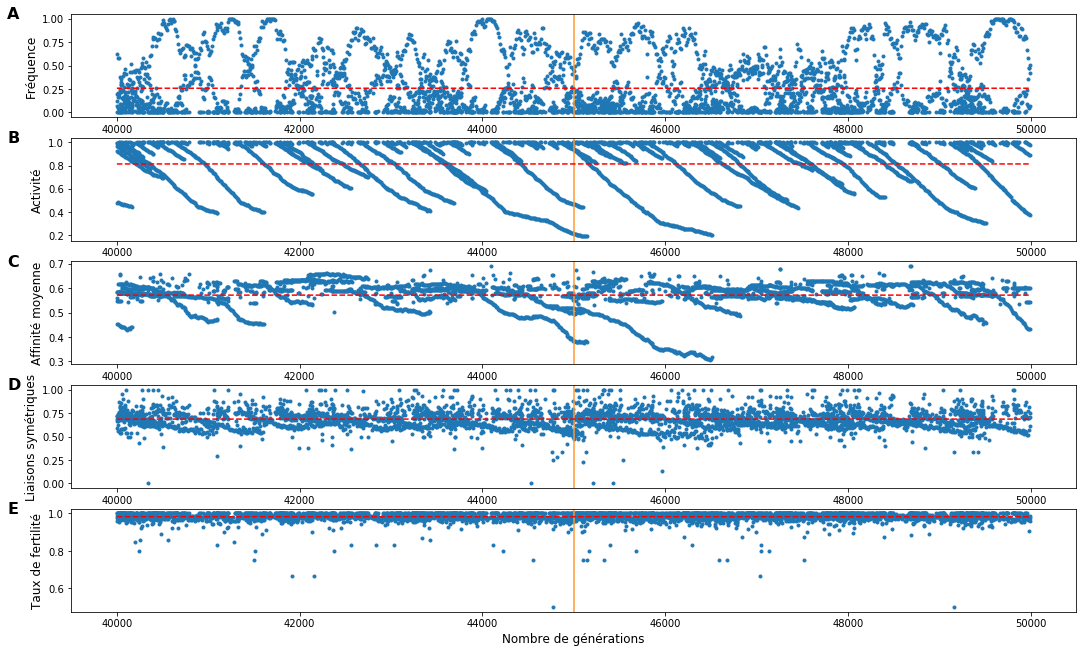

In [814]:
plot_regim(target_folder_path="meiosis/analyses/scaling_U_9/",x_param="Generation_number",y_params=["Frequency","Activity","mean_affinity","q_allele","Fertility_allele"],file_name="Run_U_5e-4.allele",withoutneutral=1,time_stable=15653,end_time=19527,larg=11,long=18,vertline=45000,xtext=38800,title="Reine Rouge en régime polymorphe")

Run_U_2e-3.allele


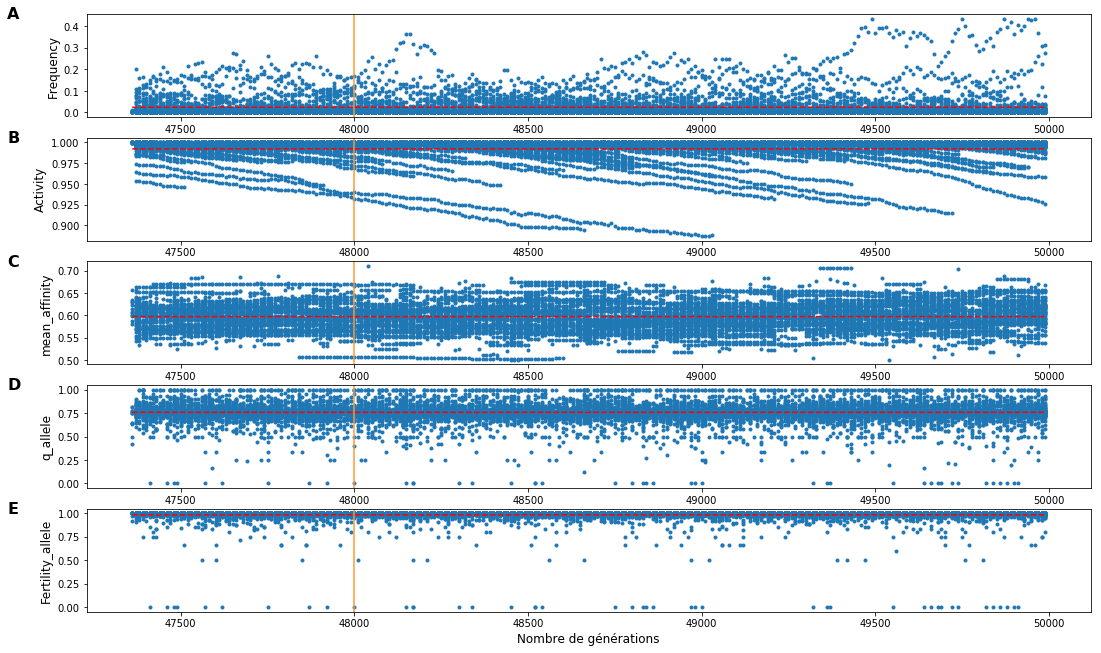

In [210]:
plot_regim(target_folder_path="./",x_param="Generation_number",y_params=["Frequency","Activity","mean_affinity","q_allele","Fertility_allele"],file_name="Run_U_2e-3.allele",withoutneutral=1,time_stable=200000,end_time=300000,larg=11,long=18,vertline=48000,xtext=47000,title="Reine Rouge en régime polymorphe")

Run_U_2e-3.allele


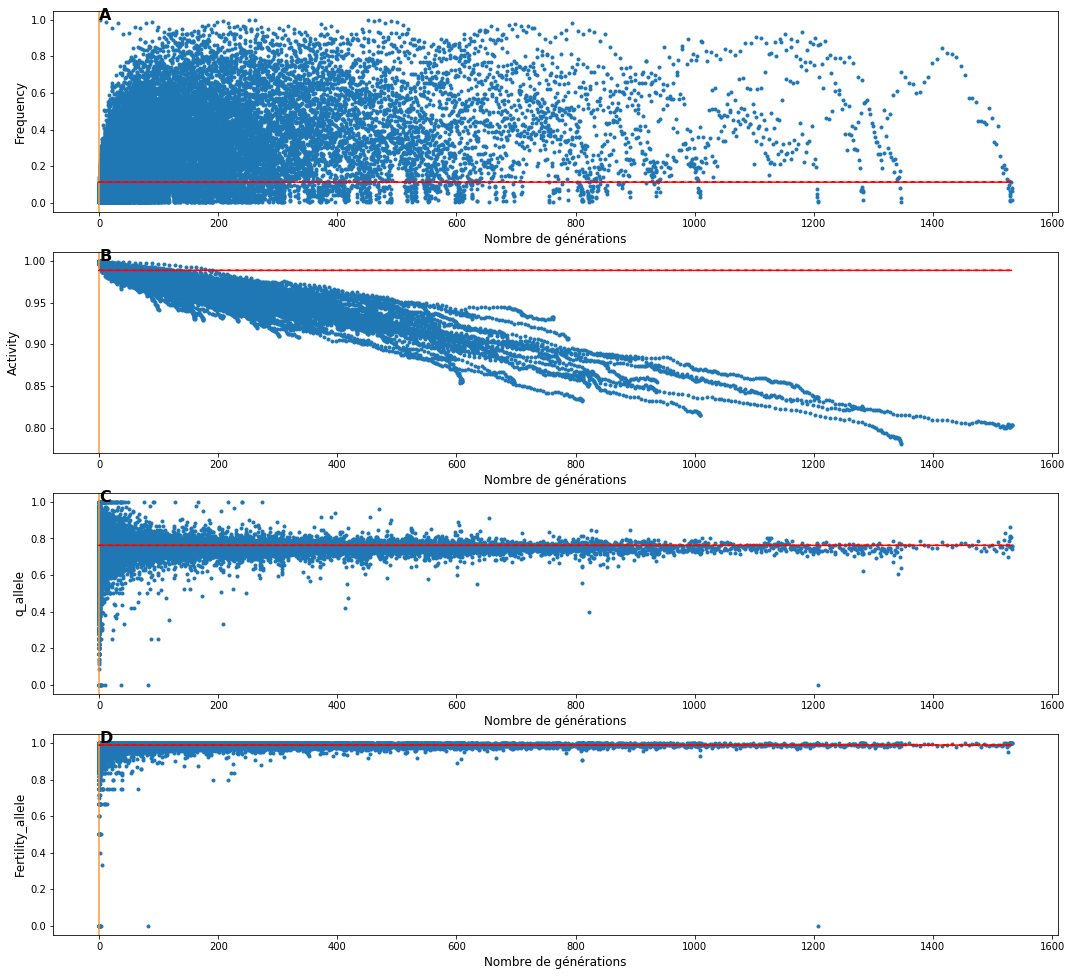

In [2482]:
plot_regim(target_folder_path="analyses/scaling_U_10/",x_param="Age",y_params=["Frequency","Activity","q_allele","Fertility_allele"],file_name="Run_U_2e-3.allele",withoutneutral=1,time_stable=0,end_time=0,larg=17,long=18,vertline=0,xtext=0,title="")

Run_U_5e-4.allele


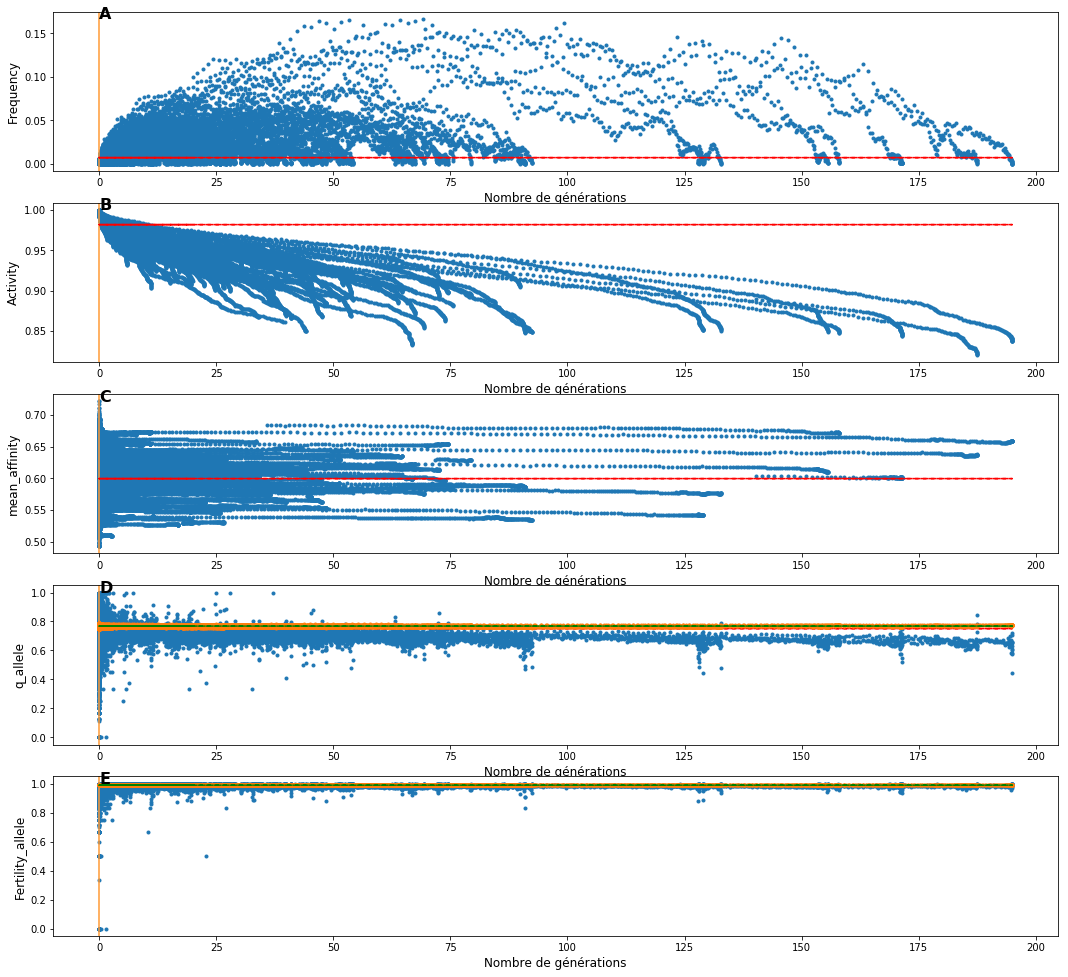

In [81]:
plot_regim(target_folder_path="./analyses/test_N_10000/",x_param="Age",y_params=["Frequency","Activity","mean_affinity","q_allele","Fertility_allele"],file_name="Run_U_5e-4.allele",withoutneutral=1,time_stable=18811,end_time=0,larg=17,long=18,vertline=0,xtext=0,title="")

Run_U_5e-4.allele
Frequency mean =  0.00712604657963
Activity mean =  0.98201708932
mean_affinity mean =  0.599536058339
q_allele mean =  0.750852098804
q_analytic mean =  0.768297330647
Fertility_allele mean =  0.985708801719
fertility_analytic mean =  0.990038815449


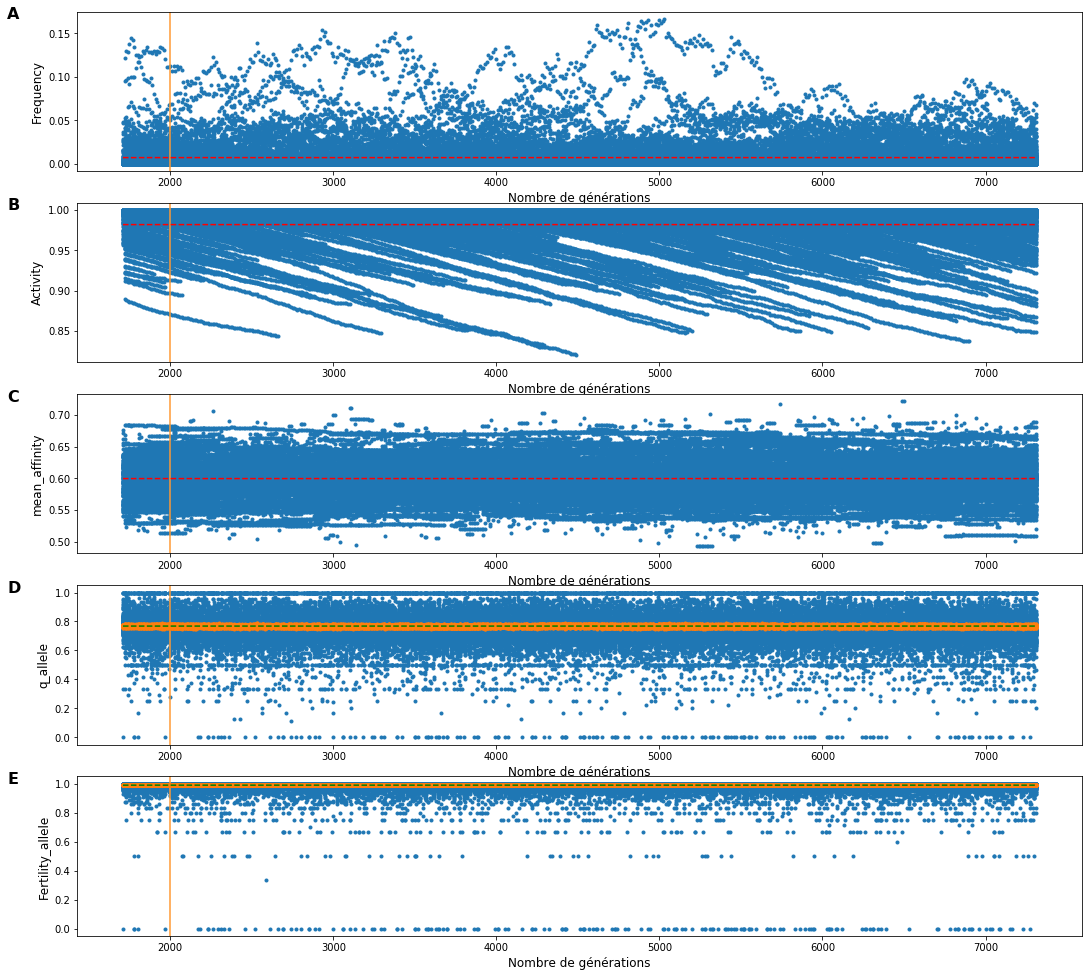

In [75]:
plot_regim(target_folder_path="./analyses/test_N_10000/",x_param="Generation_number",y_params=["Frequency","Activity","mean_affinity","q_allele","Fertility_allele"],file_name="Run_U_5e-4.allele",withoutneutral=1,time_stable=18811,end_time=0,larg=17,long=18,vertline=2000,xtext=1000,title="")

Run_U_5e-4.trace


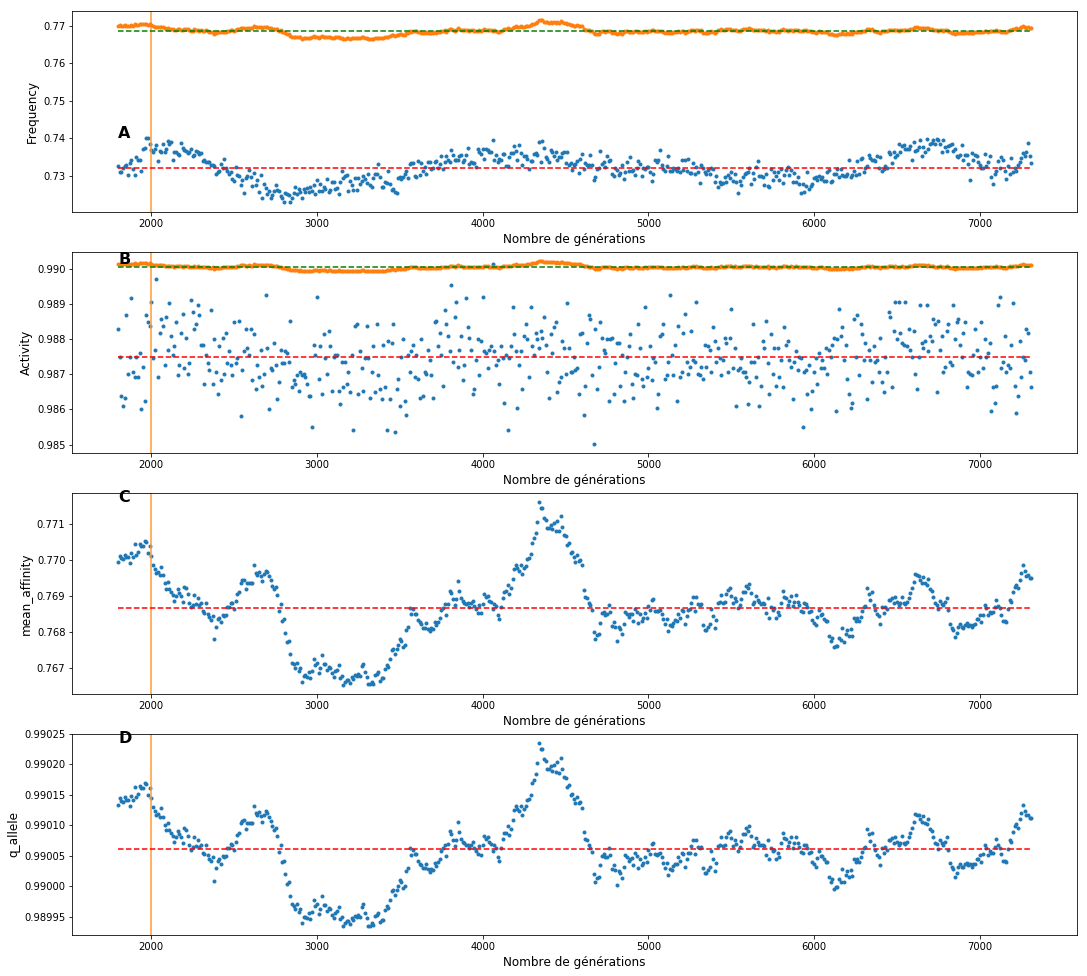

In [58]:
plot_regim(target_folder_path="./analyses/test_N_10000/",x_param="Generation_number",y_params=["q","Fertility_rate","q_analytic","fertility_analytic"],file_name="Run_U_5e-4.trace",withoutneutral=1,time_stable=180,end_time=0,larg=17,long=18,vertline=2000,xtext=1800,title="")

Run_U_5e-4.trace
q mean =  0.732090990637
q_analytic mean =  0.768625945693
Fertility_rate mean =  0.987494868914
fertility_analytic mean =  0.990057992509
q_analytic mean =  0.768625945693
fertility_analytic mean =  0.990057992509


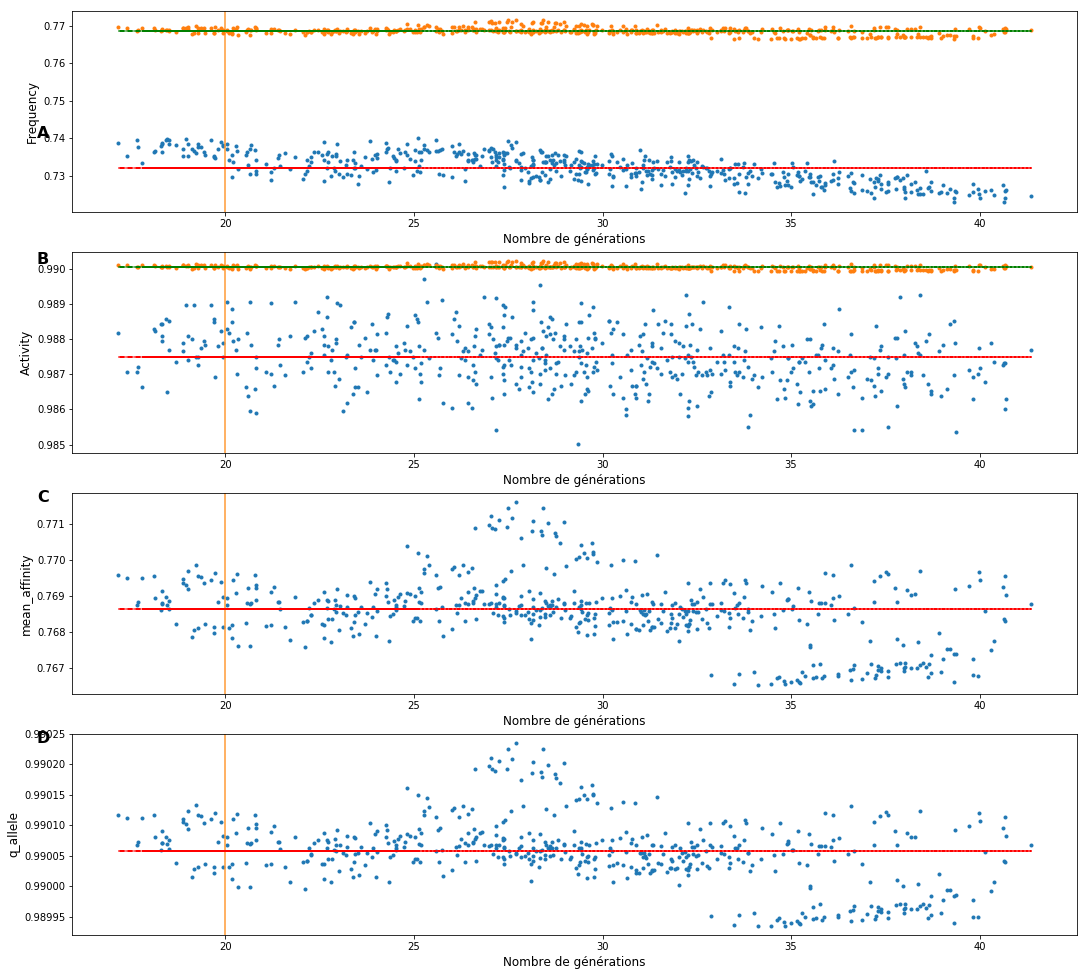

In [89]:
plot_regim(target_folder_path="./analyses/test_N_10000/",x_param="Mean_Age",y_params=["q","Fertility_rate","q_analytic","fertility_analytic"],file_name="Run_U_5e-4.trace",withoutneutral=1,time_stable=198,end_time=0,larg=17,long=18,vertline=20,xtext=15,title="")

Run_U_1e-4.allele
Frequency mean =  0.042651551575
Activity mean =  0.938804871508
mean_affinity mean =  0.600657170597
q_allele mean =  0.615645705528
q_analytic mean =  0.642500850308
Fertility_allele mean =  0.965121888586
fertility_analytic mean =  0.978800307699


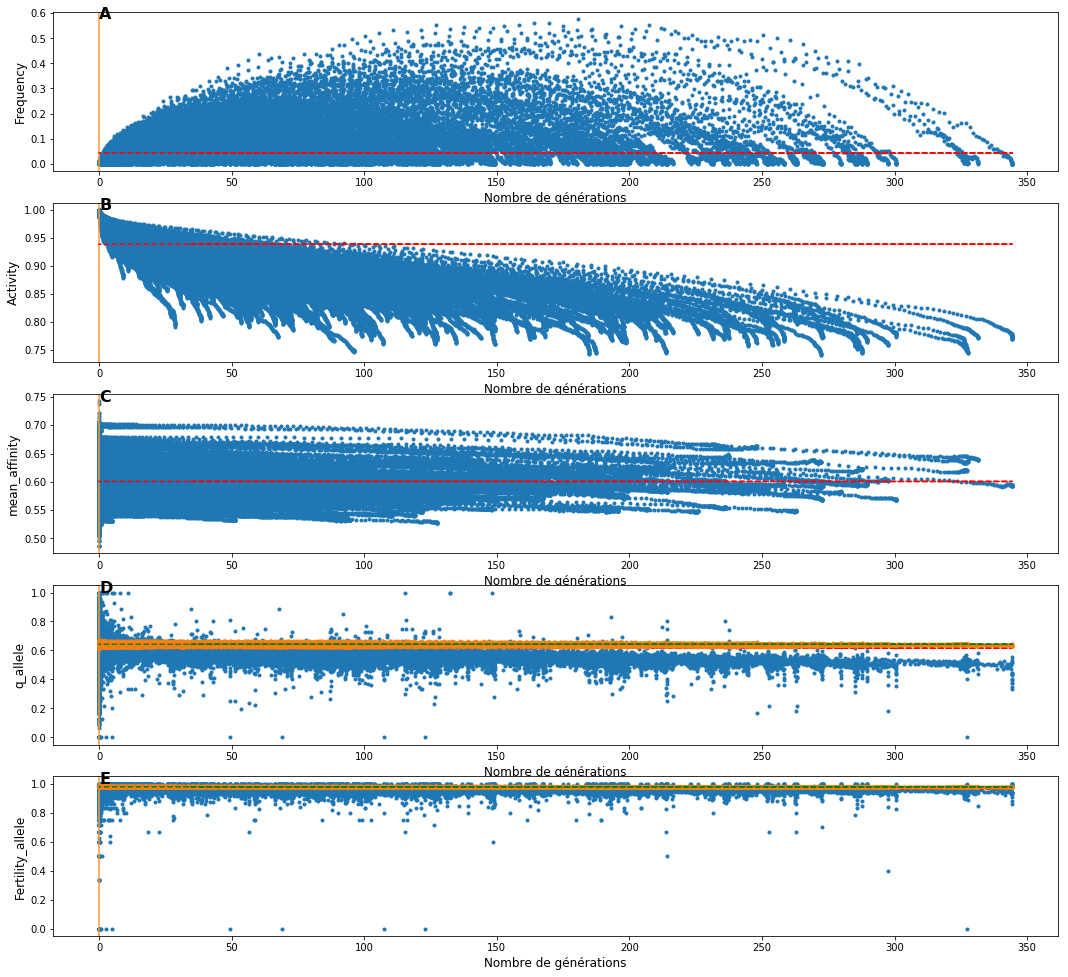

In [336]:
plot_regim(target_folder_path="./",x_param="Age",y_params=["Frequency","Activity","mean_affinity","q_allele","Fertility_allele"],file_name="Run_U_1e-4.allele",withoutneutral=1,time_stable=18811,end_time=0,larg=17,long=18,vertline=0,xtext=0,title="")

Run_U_1e-4.allele
Frequency mean =  0.042651551575
Activity mean =  0.938804871508
mean_affinity mean =  0.600657170597
q_allele mean =  0.615645705528
q_analytic mean =  0.642500850308
Fertility_allele mean =  0.965121888586
fertility_analytic mean =  0.978800307699


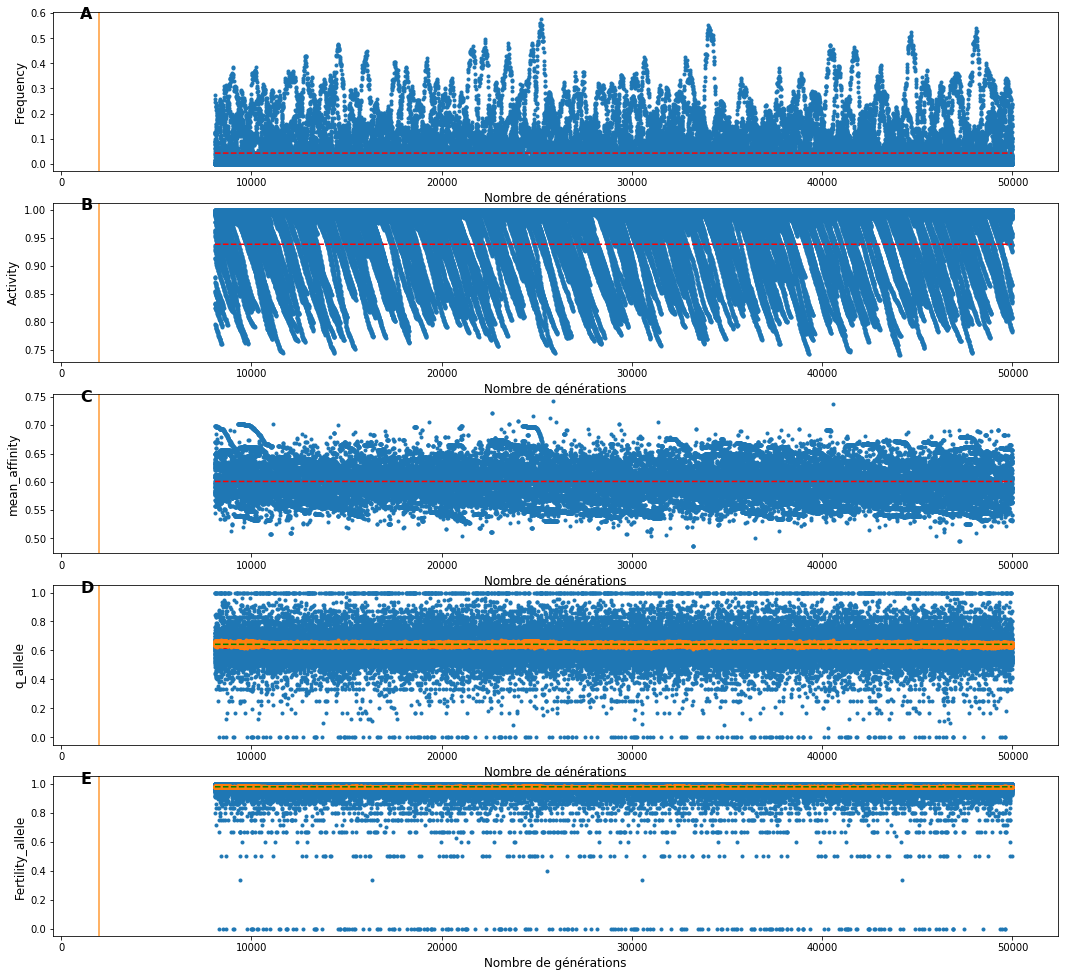

In [335]:
plot_regim(target_folder_path="./",x_param="Generation_number",y_params=["Frequency","Activity","mean_affinity","q_allele","Fertility_allele"],file_name="Run_U_1e-4.allele",withoutneutral=1,time_stable=18811,end_time=0,larg=17,long=18,vertline=2000,xtext=1000,title="")

Run_U_1e-4.trace
q mean =  0.599568340664
q_analytic mean =  0.643426121784
Fertility_rate mean =  0.968913133195
fertility_analytic mean =  0.97891320332
q_analytic mean =  0.643426121784
fertility_analytic mean =  0.97891320332


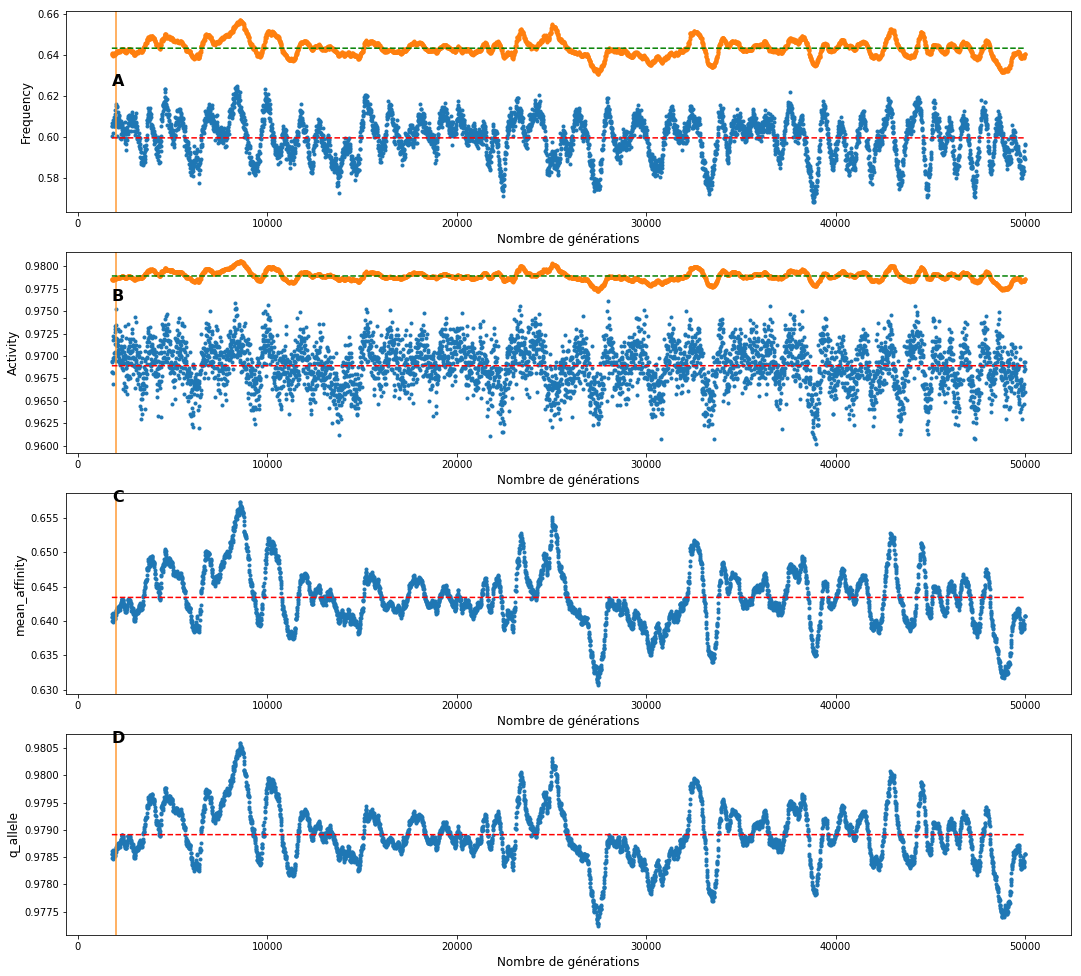

In [334]:
plot_regim(target_folder_path="./",x_param="Generation_number",y_params=["q","Fertility_rate","q_analytic","fertility_analytic"],file_name="Run_U_1e-4.trace",withoutneutral=1,time_stable=180,end_time=0,larg=17,long=18,vertline=2000,xtext=1800,title="")

Run_U_1e-4.trace
q mean =  0.599543229071
q_analytic mean =  0.643437031862
Fertility_rate mean =  0.968908558726
fertility_analytic mean =  0.978914570179
q_analytic mean =  0.643437031862
fertility_analytic mean =  0.978914570179


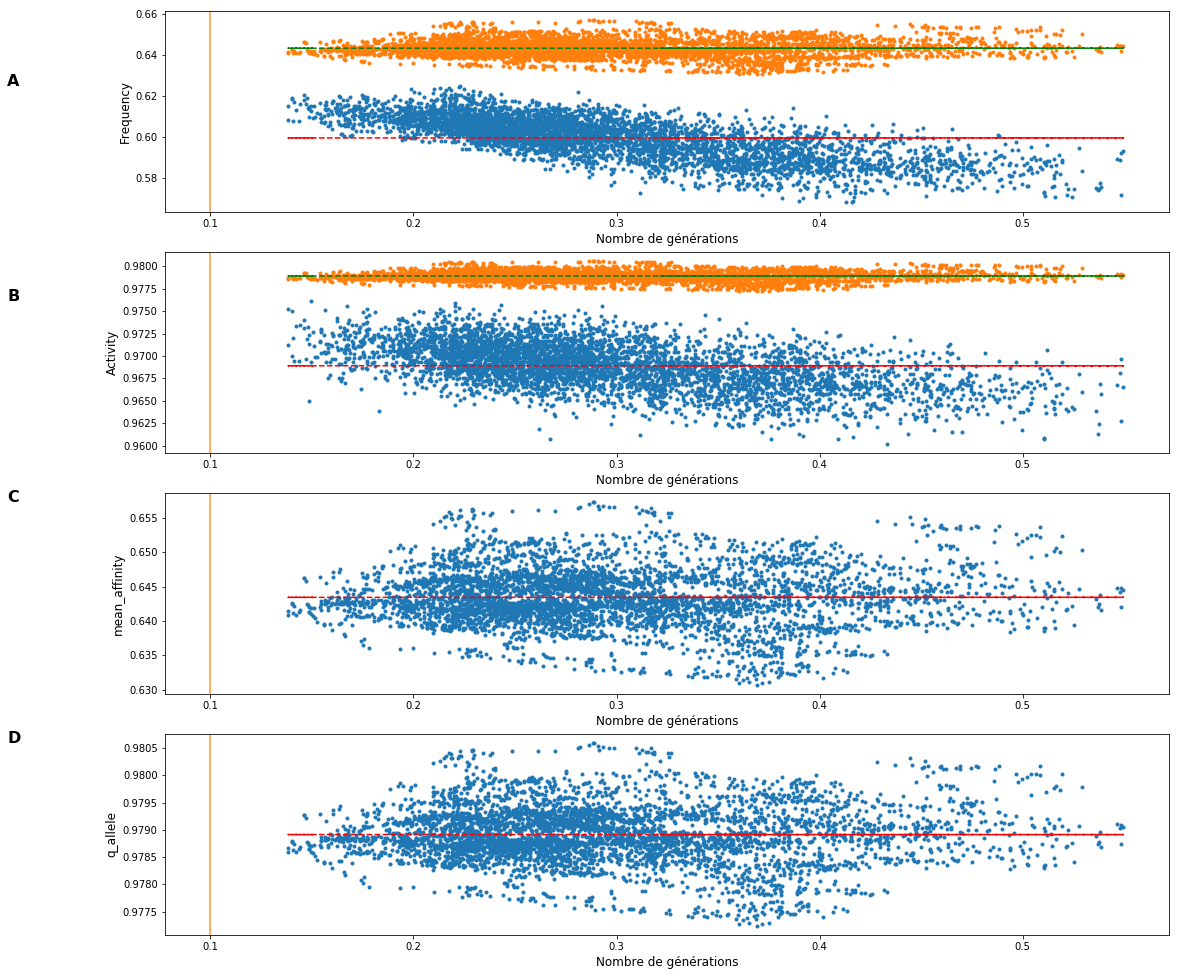

In [333]:
plot_regim(target_folder_path="./",x_param="Mean_Age",y_params=["q","Fertility_rate","q_analytic","fertility_analytic"],file_name="Run_U_1e-4.trace",withoutneutral=1,time_stable=198,end_time=0,larg=17,long=18,vertline=0.1,xtext=0,title="")

### Successive regim

In [362]:
#plot_regim(target_folder_path="analyses/scaling_U_4/",x_param="Generation_number",y_params=["Frequency","Activity"],file_name="Run_U_1e-5.allele",withoutneutral=1,time_stable=100,larg=7,long=18)

Run_U_2e-8.allele


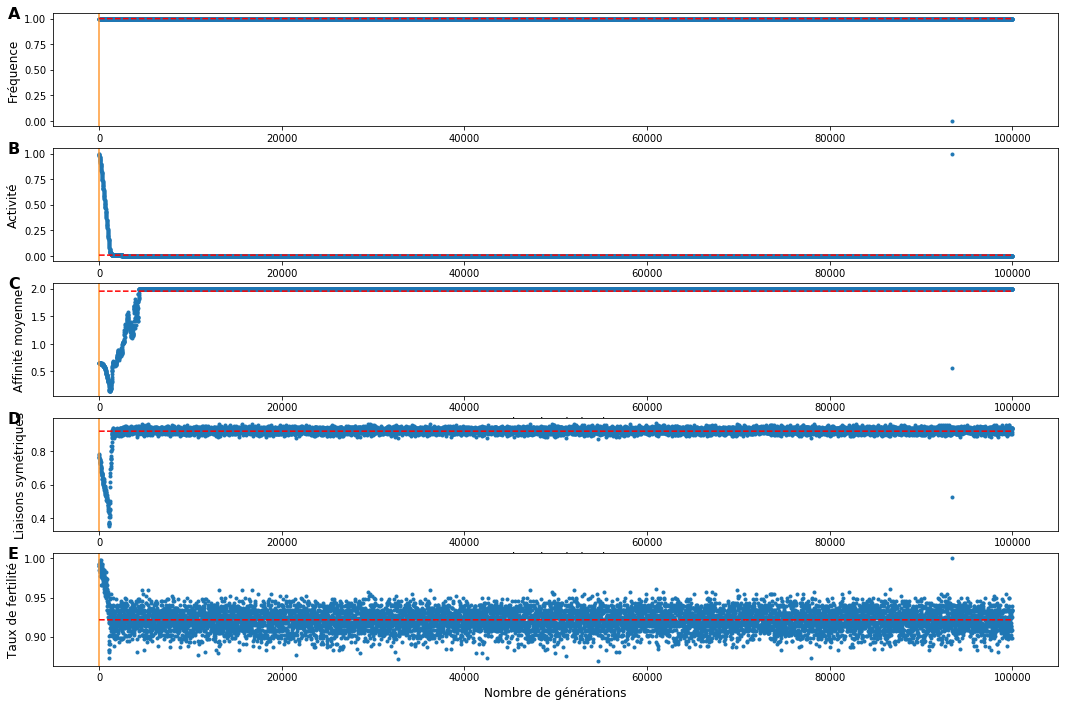

In [31]:
plot_regim(target_folder_path="meiosis/analyses/scaling_U_9/",x_param="Generation_number",y_params=["Frequency","Activity","mean_affinity","q_allele","Fertility_allele"],file_name="Run_U_2e-8.allele",withoutneutral=1,time_stable=0,end_time=0,larg=12,long=18,vertline=0,xtext=-10000,title="Reine Rouge en régime de succession u=2e-8")

Run_U_5e-5.allele


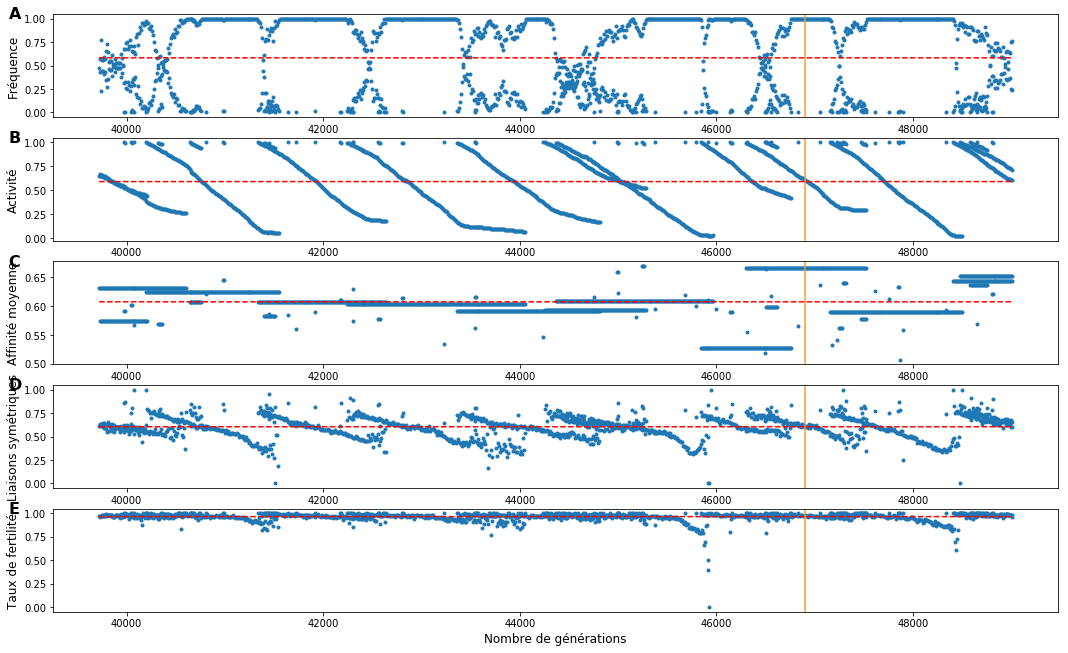

In [2064]:
plot_regim(target_folder_path="analyses/scaling_U_9/",x_param="Generation_number",y_params=["Frequency","Activity","mean_affinity","q_allele","Fertility_allele"],file_name="Run_U_5e-5.allele",withoutneutral=1,time_stable=6081,end_time=7679,larg=11,long=18,vertline=46900,xtext=38800,title="Reine Rouge en régime de succession")

In [2065]:
plot_regim(target_folder_path="analyses/scaling_U_6/",x_param="Age",y_params=["Frequency","Activity","q_allele","Fertility_allele"],file_name="Run_U_1e-6.allele",withoutneutral=1,time_stable=0,end_time=0,larg=17,long=18)

TypeError: plot_regim() missing 3 required positional arguments: 'vertline', 'xtext', and 'title'

### Individual : Params vs age

In [328]:
#plot_data(target_folder_path="analyses/scaling_V_4/",x_params="Age",y_params="Frequency", file_ext="allele",withoutneutral=1,list_start=[0,0,0,0,0,0,0,0])

In [332]:
#plot_data(target_folder_path="analyses/scaling_V_4/",x_params="Age",y_params="Activity", file_ext="allele",withoutneutral=1,list_start=[0,0,0,0,0,0,0,0])

In [334]:
#plot_data(target_folder_path="analyses/scaling_V_4/",x_params="Age",y_params="q_allele",file_ext="allele",withoutneutral=1,list_start=[0,0,0,0,0,0,0,0])

In [228]:
#plot_data(target_folder_path="analyses/scaling_V_4/",x_params="Age",y_params="Fertility_allele",file_ext="allele",withoutneutral=1,list_start=[0,0,0,0,0,0,0,0])

In [201]:
#plot_data(target_folder_path="analyses/scaling_U_4/",x_params="Age",y_params="Frequency", file_ext="allele",withoutneutral=1,list_start=[0,0,0,0,0,0,0,0])

In [331]:
#plot_data(target_folder_path="analyses/scaling_U_4/",x_params="Age",y_params="Activity", file_ext="allele",withoutneutral=1,list_start=[0,0,0,0,0,0,0,0])

In [203]:
#plot_data(target_folder_path="analyses/scaling_U_4/",x_params="Age",y_params="q_allele",file_ext="allele",withoutneutral=1,list_start=[0,0,0,0,0,0,0,0])

In [204]:
#plot_data(target_folder_path="analyses/scaling_U_4/",x_params="Age",y_params="Fertility_allele",file_ext="allele",withoutneutral=1,list_start=[0,0,0,0,0,0,0,0])

In [30]:
def graph_per_allele(target_folder_path, file_name, ext_name, x_axis_param, y_axis_param,withoutneutral):
    data = readfiles(target_folder_path, file_name, ext_name,withoutneutral,0)
    x_per_allele=dict()
    y_per_allele=dict()
    for i in range(len(data["Generation_number"])):
        cle = data['Allele_number'][i]
        if ((str(cle) in x_per_allele) == False and cle!=-3):
            x_per_allele[str(cle)]=[]
            x_per_allele[str(cle)].append(data[x_axis_param][i])
            y_per_allele[str(cle)]=[]
            y_per_allele[str(cle)].append(data[y_axis_param][i])
        elif ((str(cle) in x_per_allele) == True and cle!=-3):
            x_per_allele[str(cle)].append(data[x_axis_param][i])
            y_per_allele[str(cle)].append(data[y_axis_param][i])
    return(x_per_allele,y_per_allele)

In [190]:
(X,Y)=graph_per_allele("analyses/scaling_V_2/", 'Run_V_1e-4', 'allele', "q_allele", "Age",1)

Text(0.5,0,'Age')

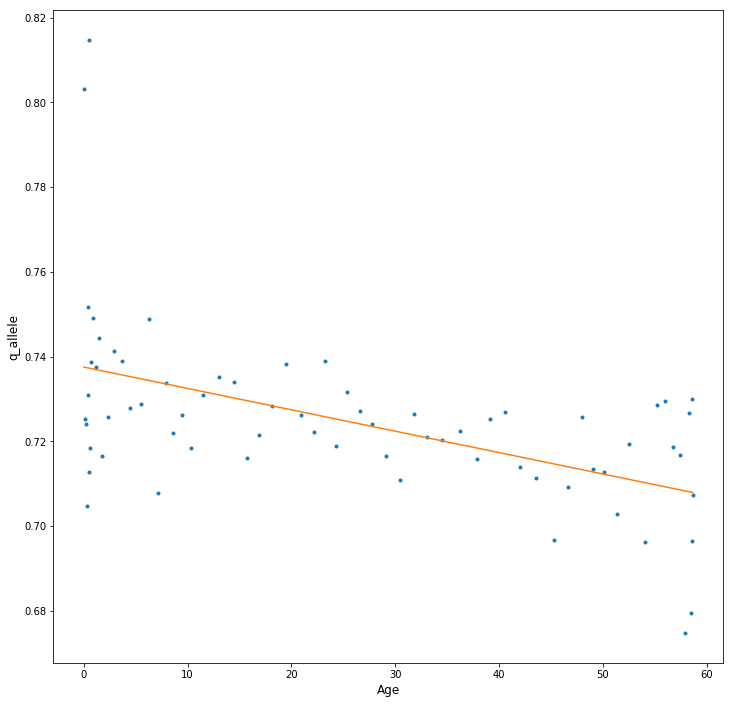

In [192]:
allele_nb = '73.0'
(X,Y)=graph_per_allele("analyses/scaling_V_2/", 'Run_V_1e-4', 'allele', "Age", "q_allele",1)
lm1 = LinearRegression().fit(np.array(X[allele_nb]).reshape(-1, 1), np.array(Y[allele_nb]))
plt.figure(1, figsize=(12,12))
plt.plot(X[allele_nb], Y[allele_nb], '.')
plt.plot(X[allele_nb], lm1.predict(np.array(X[allele_nb]).reshape(-1, 1)))
plt.ylabel('q_allele', fontsize = 12)
plt.xlabel('Age', fontsize = 12)

In [193]:
#print(np.array(Y[allele_nb]))
#print(lm1.predict(np.array(X[allele_nb]).reshape(-1, 1)))
score_lm1 = r2_score(np.array(Y[allele_nb]),lm1.predict(np.array(X[allele_nb]).reshape(-1, 1)))
print("R2 score : ",score_lm1)
print('intercept:', lm1.intercept_)
print('slope:', lm1.coef_)

R2 score :  0.269792224568
intercept: 0.7375572852
slope: [-0.00050471]


In [31]:
def plot_regim_per_allele(target_folder_path, file_name, ext_name, x_param, y_params, withoutneutral, allelenbmin, allelenbmax):
    index_line=1
    figure=plt.figure(figsize=(18,11))
    for i in y_params:
        plt.subplot(len(y_params),1,index_line) 
        (X,Y)=graph_per_allele(target_folder_path, file_name, ext_name, x_param, i, withoutneutral)
        #print(X)
        for j in range(allelenbmax-allelenbmin):
            allele_nb=allelenbmin+j
            nameallelelist=[str(allele_nb),'.0']
            nameallele=''.join(nameallelelist)
            if X.get(nameallele, 0)!=0:
                plt.plot(X[nameallele], Y[nameallele], '.')
        index_line+=1

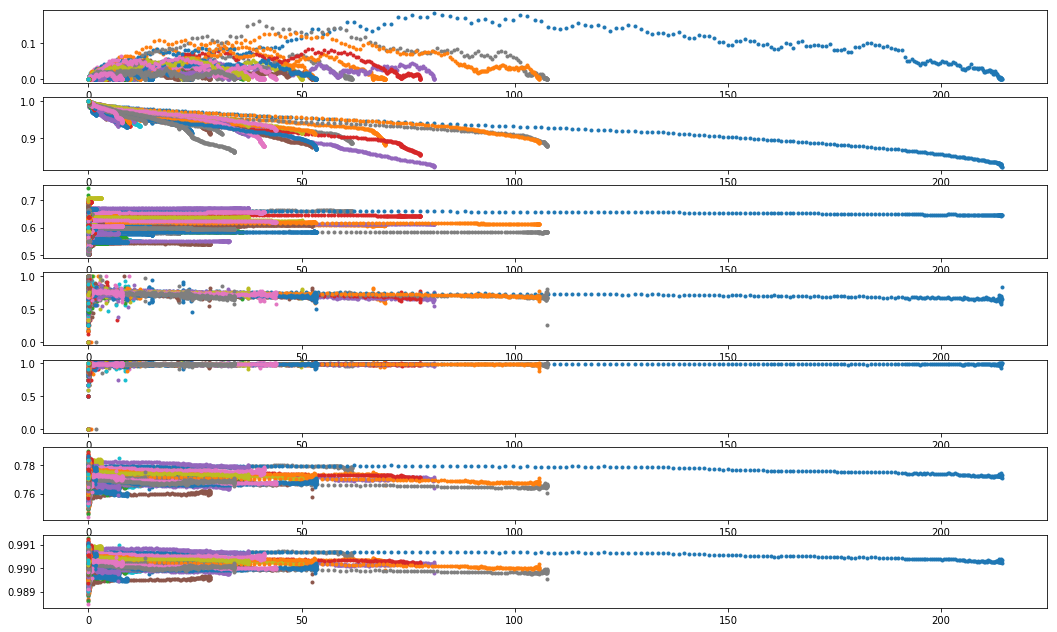

In [32]:
plot_regim_per_allele("./analyses/test_N_10000_2/", 'Run_U_5e-4', 'allele', "Age", ["Frequency","Activity","mean_affinity","q_allele","Fertility_allele","q_analytic","fertility_analytic"],1, 10000, 30000)

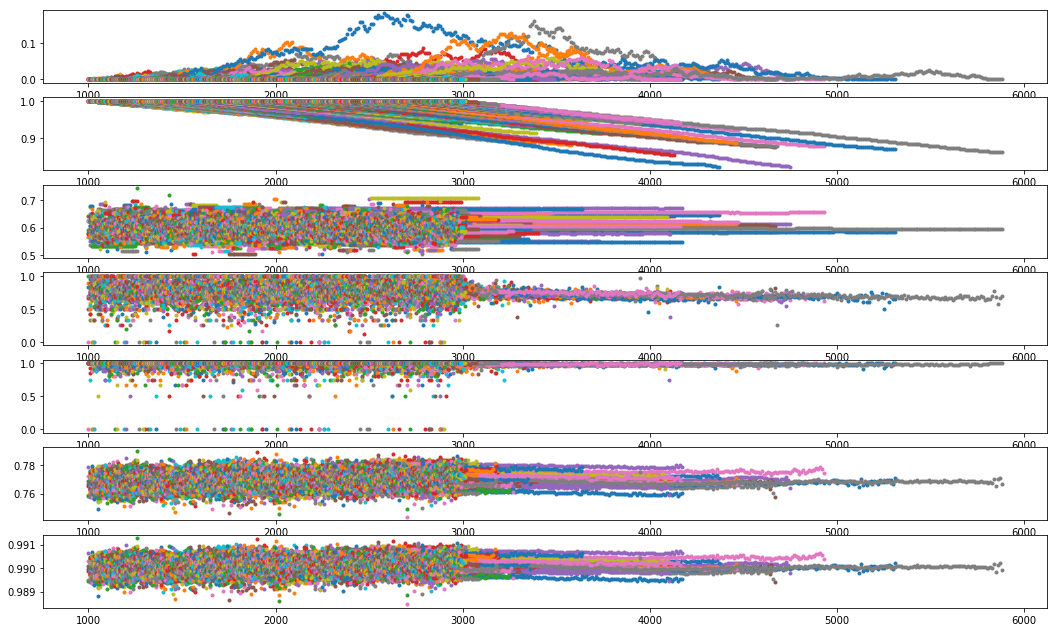

In [37]:
plot_regim_per_allele("./analyses/test_N_10000_2/", 'Run_U_5e-4', 'allele', "Generation_number", ["Frequency","Activity","mean_affinity","q_allele","Fertility_allele","q_analytic","fertility_analytic"],1, 10000, 30000)

### Scaling

In [126]:
def readscalingexperiment(target_folder_path , scaling_param_name, param_names_allele, param_names_trace,withoutneutral,init_line):
    list_files = sorted(os.listdir(target_folder_path))
    stat_dict_allele = dict()
    for param in param_names_allele:
        stat_dict_allele[scaling_param_name]=[]
        stat_dict_allele[param+"_mean"]=[]
        stat_dict_allele[param+"_variance"]=[]
    stat_dict_trace = dict()
    for param in param_names_trace:
        stat_dict_trace[scaling_param_name]=[]
        stat_dict_trace[param+"_mean"]=[]
        stat_dict_trace[param+"_variance"]=[]
    for file_name in list_files :
        if file_name.split(".")[1]=="allele" :
            stat_dict_allele[scaling_param_name].append(float((file_name.split(".")[0]).split("_")[2]))
            data_file = readfiles(target_folder_path, file_name.split(".")[0], file_name.split(".")[1],withoutneutral,0)
            for key in data_file.keys():
                (stat_dict_allele[key+"_mean"]).append(np.mean(data_file[key]))
                (stat_dict_allele[key+"_variance"]).append(np.var(data_file[key]))
        elif file_name.split(".")[1]=="trace" :
            stat_dict_trace[scaling_param_name].append(float((file_name.split(".")[0]).split("_")[2]))
            data_file = readfiles(target_folder_path, file_name.split(".")[0], file_name.split(".")[1],withoutneutral,0)
            for key in data_file.keys():
                (stat_dict_trace[key+"_mean"]).append(np.mean(data_file[key][init_line:]))
                (stat_dict_trace[key+"_variance"]).append(np.var(data_file[key][init_line:]))
    return (stat_dict_allele,stat_dict_trace)

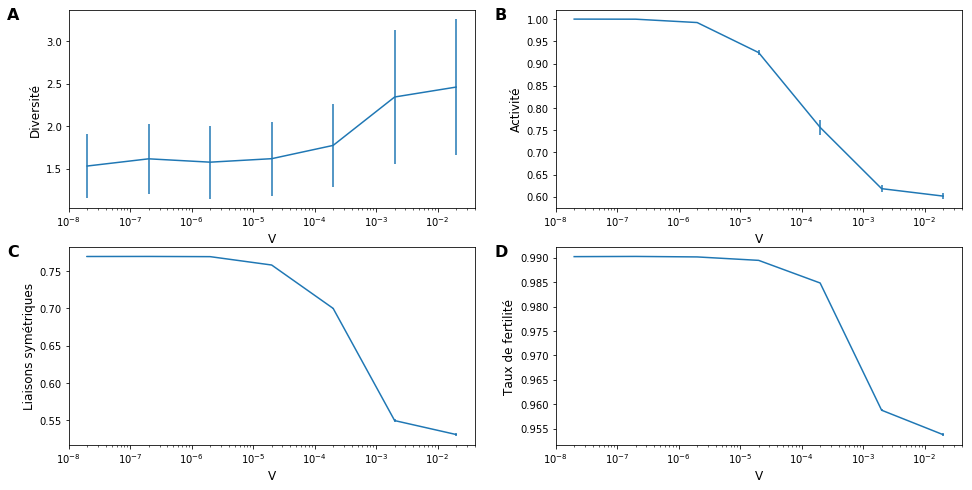

In [349]:
(allele,trace)=readscalingexperiment(target_folder_path="analyses/scaling_V_9/" , scaling_param_name="V", param_names_allele=["Generation_number","Allele_number","Frequency","Activity","Age","q_allele","Fertility_allele","mean_affinity"], param_names_trace=["Generation_number","Total_number_of_allele","Diversity","Activity","Mean_Age","Time","Fertility_rate","2_DSB_on_one_site_rate","No_DSB_rate","No_symmetrical_sites_rate","q","q_intra","fertility_intra"],withoutneutral=0,init_line=101)
scaling_param_name="V"
param_to_plot=["Diversity","Activity","q","Fertility_rate"]
paramname=["Diversité","Activité","Liaisons symétriques","Taux de fertilité"]
n=len(param_to_plot)
#d=6
#h=400
#g=d/(4*h)
#for j in range(len(trace[scaling_param_name])):
#    trace[scaling_param_name][j]=trace[scaling_param_name][j]*g
lettres=["A","B","C","D"]
figure=plt.figure(1, figsize=(16,8))
for index_parameter in range(n):
    plt.subplot(2,2,index_parameter+1)
    plt.errorbar(trace[scaling_param_name][1:8], trace[param_to_plot[index_parameter]+'_mean'][1:8], trace[param_to_plot[index_parameter]+'_variance'][1:8])
    plt.xscale('log')
    plt.ylabel(paramname[index_parameter], fontsize = 12)
    plt.xlabel(scaling_param_name, fontsize = 12)
    maxval=[]
    for i in range(len(trace[param_to_plot[index_parameter]+'_mean'][1:8])):
        maxval.append(trace[param_to_plot[index_parameter]+'_mean'][1:8][i]+trace[param_to_plot[index_parameter]+'_variance'][1:8][i])
    ytext=np.max(maxval)
    plt.text(x=1e-9,y=ytext,s=lettres[index_parameter],fontweight='bold',fontsize=16)
    #plt.suptitle("Manipulations de scaling de V (taux d'inactivation des sites)",fontsize=18,fontweight="bold")

Scaling of v :  
Diversity increases with v : when v is high it leads to a positive selection of new PRDM9 alleles. Effect not really visible  
Activity decreases with v : normal because v acts on the activity of the sites, the higher the v the lower the activity  
Fertiltity rate decreases with v : when v is high, the probability of binding is lower (praticularly the sym binding) (drop of 3%)  
no sym binding increases with v (2%) : coherent with what I said above for fertility rate  
q decreases with v : coherent with what I said for Fertiltiy rate, when v is high, the probability of having a symetrical binding with DSB is lower than with a low v  

In the article of Latrille the scling are made with vg (erosion rate) against recombination rates, PRDM9 Diversity (and turnovertime). In my case the recombination rate is analogue to the fertility rate.  
If I change to vg (g=d/4h) against the other parameters I obtain something similar to what Latrille had for the diversity and recombination rate.  

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3146: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


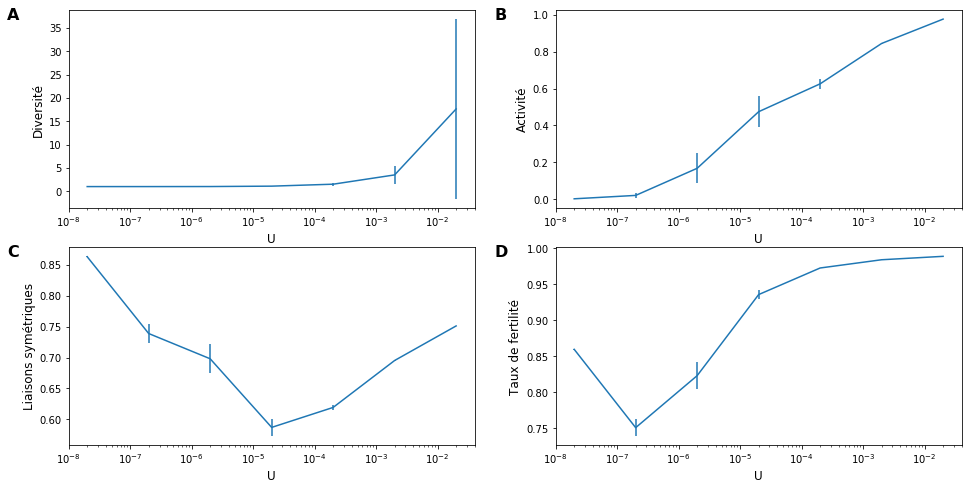

In [350]:
(allele,trace)=readscalingexperiment(target_folder_path="analyses/scaling_U_9/" , scaling_param_name="U", param_names_allele=["Generation_number","Allele_number","Frequency","Activity","Age","q_allele","Fertility_allele","mean_affinity"], param_names_trace=["Generation_number","Total_number_of_allele","Diversity","Activity","Mean_Age","Time","Fertility_rate","2_DSB_on_one_site_rate","No_DSB_rate","No_symmetrical_sites_rate","q","q_intra","fertility_intra"],withoutneutral=0,init_line=101)
scaling_param_name="U"

param_to_plot=["Diversity","Activity","q","Fertility_rate"]
paramname=["Diversité","Activité","Liaisons symétriques","Taux de fertilité"]
#param_to_plot=["q","Fertility_rate","No_DSB_rate","No_symmetrical_sites_rate"]
#paramname=["Liaisons symétriques","Taux de fertilité","No_DSB_rate","No_symmetrical_sites_rate"]
n=len(param_to_plot)

plt.figure(1, figsize=(16,8))
for index_parameter in range(n):
    plt.subplot(2,2,index_parameter+1)
    plt.errorbar(trace[scaling_param_name][1:8], trace[param_to_plot[index_parameter]+'_mean'][1:8], trace[param_to_plot[index_parameter]+'_variance'][1:8])
    plt.xscale('log')
    #plt.yscale('log')
    plt.ylabel(paramname[index_parameter], fontsize = 12)
    plt.xlabel(scaling_param_name, fontsize = 12)
    maxval=[]
    for i in range(len(trace[param_to_plot[index_parameter]+'_mean'][1:8])):
        maxval.append(trace[param_to_plot[index_parameter]+'_mean'][1:8][i]+trace[param_to_plot[index_parameter]+'_variance'][1:8][i])
    ytext=np.max(maxval)
    plt.text(x=1e-9,y=ytext,s=lettres[index_parameter],fontweight='bold',fontsize=16)
    #plt.suptitle("Manipulations de scaling de U (taux d'apparition d'un nouvel allèle)",fontsize=18,fontweight="bold")

Scaling of u :  
Diversity increases with u : when u is high it leads to a high polymorphic regim with alleles that have nearly the same frequence in the population. If u is low, only one allele dominates.  
Activity increases with u : normal because u acts on the number of alleles. If there are a lot of alleles in the population, the erosion will be distributed among these alleles and the dBGC will act not only on one allele. That means that the sites eroded themseves slower than when u is low (1 allele in the population)  
Fertiltity rate increases with u : when u is high, there are more alleles with less eroded sites so the probability of having a good symetrical binding is high (which is not the case when u is low)  
no sym binding decreases with u (2%) : coherent with what I said above for fertility rate  
q decreases with u until 1e-5 and inreases again : q calculates the probability of having a symetrical binding given that there is at least one DSB. When there is at least one DSB there is usually a binding on the homologue and the q is high. But the fertility rate is low because it takes into account the fact where there is no DSB or no binding at all. This case might be really present in the case of a low u. the q is also high when there are a lot of allele in the population. That means that there are many heterozygous individuals for the PRDM9 locus which increases the probability of having a symetrical binding (2 times more sites). With a u = 1e-5, it could be a transitory state between the two cases I presented before : there are not enough alleles in the pop for having a high activity for each allele but in the other side, there is enough active sites for having a DSB on it but not a symetrical binding.

## Migration

### Individual : Temporal graphs

In [9]:
def dico_data_mig(target_folder_path,x_params,y_params, file_ext, withneutral,withoutnan):
    list_files = sorted(os.listdir(target_folder_path))
    dico_file = dict()
    dico_file_1 = dict()
    dico_file_2 = dict()
    list_namefile=[]
    for file_name in list_files :
        if file_name.split(".")[1]==file_ext :
            if withneutral==1:
                data_file=readfiles(target_folder_path, file_name.split(".")[0], file_name.split(".")[1],0,withoutnan)
            elif withneutral==0:
                data_file=readfiles(target_folder_path, file_name.split(".")[0], file_name.split(".")[1],1,withoutnan)
            if (file_name.split(".")[0]).split("_")[-1] == "1" :
                dico_file_1[(file_name.split(".")[0]).split("_")[2]+"_x_params"]=data_file[x_params]
                dico_file_1[(file_name.split(".")[0]).split("_")[2]+"_y_params"]=data_file[y_params]
            if (file_name.split(".")[0]).split("_")[-1] == "2" :
                dico_file_2[(file_name.split(".")[0]).split("_")[2]+"_x_params"]=data_file[x_params]
                dico_file_2[(file_name.split(".")[0]).split("_")[2]+"_y_params"]=data_file[y_params]
            if  x_params in data_file and y_params in data_file :
                dico_file[(file_name.split(".")[0]).split("_")[-1]+"_x_params"]=data_file[x_params]
                dico_file[(file_name.split(".")[0]).split("_")[-1]+"_y_params"]=data_file[y_params]
            list_namefile.append((file_name.split(".")[0]).split("_")[2])
    list_namefile=sorted(list(set(list_namefile)))
    return (list_namefile,dico_file,dico_file_1,dico_file_2)

In [9]:
def plot_data_mig(target_folder_path,x_params,y_params, file_ext, withneutral, withoutnan):
    plt.figure(1, figsize=(20,30))
    index_line=1
    list_namefile,dico_file,dico_file_1,dico_file_2=dico_data_mig(target_folder_path,x_params,y_params, file_ext, withneutral, withoutnan)
    for i in list_namefile[0:9] :
        plt.subplot(len(list_namefile[0:9]),1,index_line)
        #if i+"_x_params" in dico_file and i+"_y_params" in dico_file:
            #plt.plot(dico_file[i+"_x_params"],dico_file[i+"_y_params"],'.',label="pop before migration")
        plt.plot(dico_file_1[i+"_x_params"],dico_file_1[i+"_y_params"],'.',label="pop1")
        plt.plot(dico_file_2[i+"_x_params"],dico_file_2[i+"_y_params"],'.',label="pop2")
        plt.ylabel(y_params, fontsize = 12)
        plt.xlabel(x_params+"_for_run_"+i, fontsize = 12)
        index_line=index_line+1

In [342]:
#plot_data_mig("analyses/scaling_M_3/","Generation_number","Diversity","trace",1,0)

The higher the m, the lower the mean diversity  
When there are a lot of migrants, the diversity in the 2 pop is really similar.  
When there are very few migrants, the diversity in each pop is independent from one another.
We expected to have for each parameter the same thing for m 1e-6, 1e-7, 1e-8 and 0 as the simulations for u and v at 1e-4. We also expect to have for m = 1e-1 and 1e-2 the same thing as simulations for u and v at 1e-4 and a pop size multiplied by 2.

In [286]:
#plot_data_mig("analyses/scaling_M_3/","Generation_number","Activity","trace",1,0)

Same activity when m is high and very variable activity when m is low

In [291]:
#plot_data_mig("analyses/scaling_M_3/","Generation_number","Fertility_rate","trace",1,0)

The fertility rate is mostly the same and is independent of m. But we can observe that sometimes one population has a lower fertility rate for a short time which could correlate with the end of life of an old allele

In [292]:
#plot_data_mig("analyses/scaling_M_3/","Generation_number","q","trace",1,0)

In [224]:
#plot_data_mig("analyses/scaling_M_3/","Generation_number","q_intra","trace",1,0)

In [226]:
#plot_data_mig("analyses/scaling_M_3/","Generation_number","fertility_intra","trace",1,0)

In [348]:
#plot_data_mig("analyses/scaling_M_3/","Generation_number","q_inter","trace",1,0)

In [228]:
#plot_data_mig("analyses/scaling_M_3/","Generation_number","fertility_inter","trace",1,0)

In [229]:
#plot_data_mig("analyses/scaling_M_3/","Generation_number","FST_neutral","trace",1,0)

In [53]:
#plot_data_mig("analyses/scaling_M_3/","Generation_number","FST_PRDM9","trace",1,0)

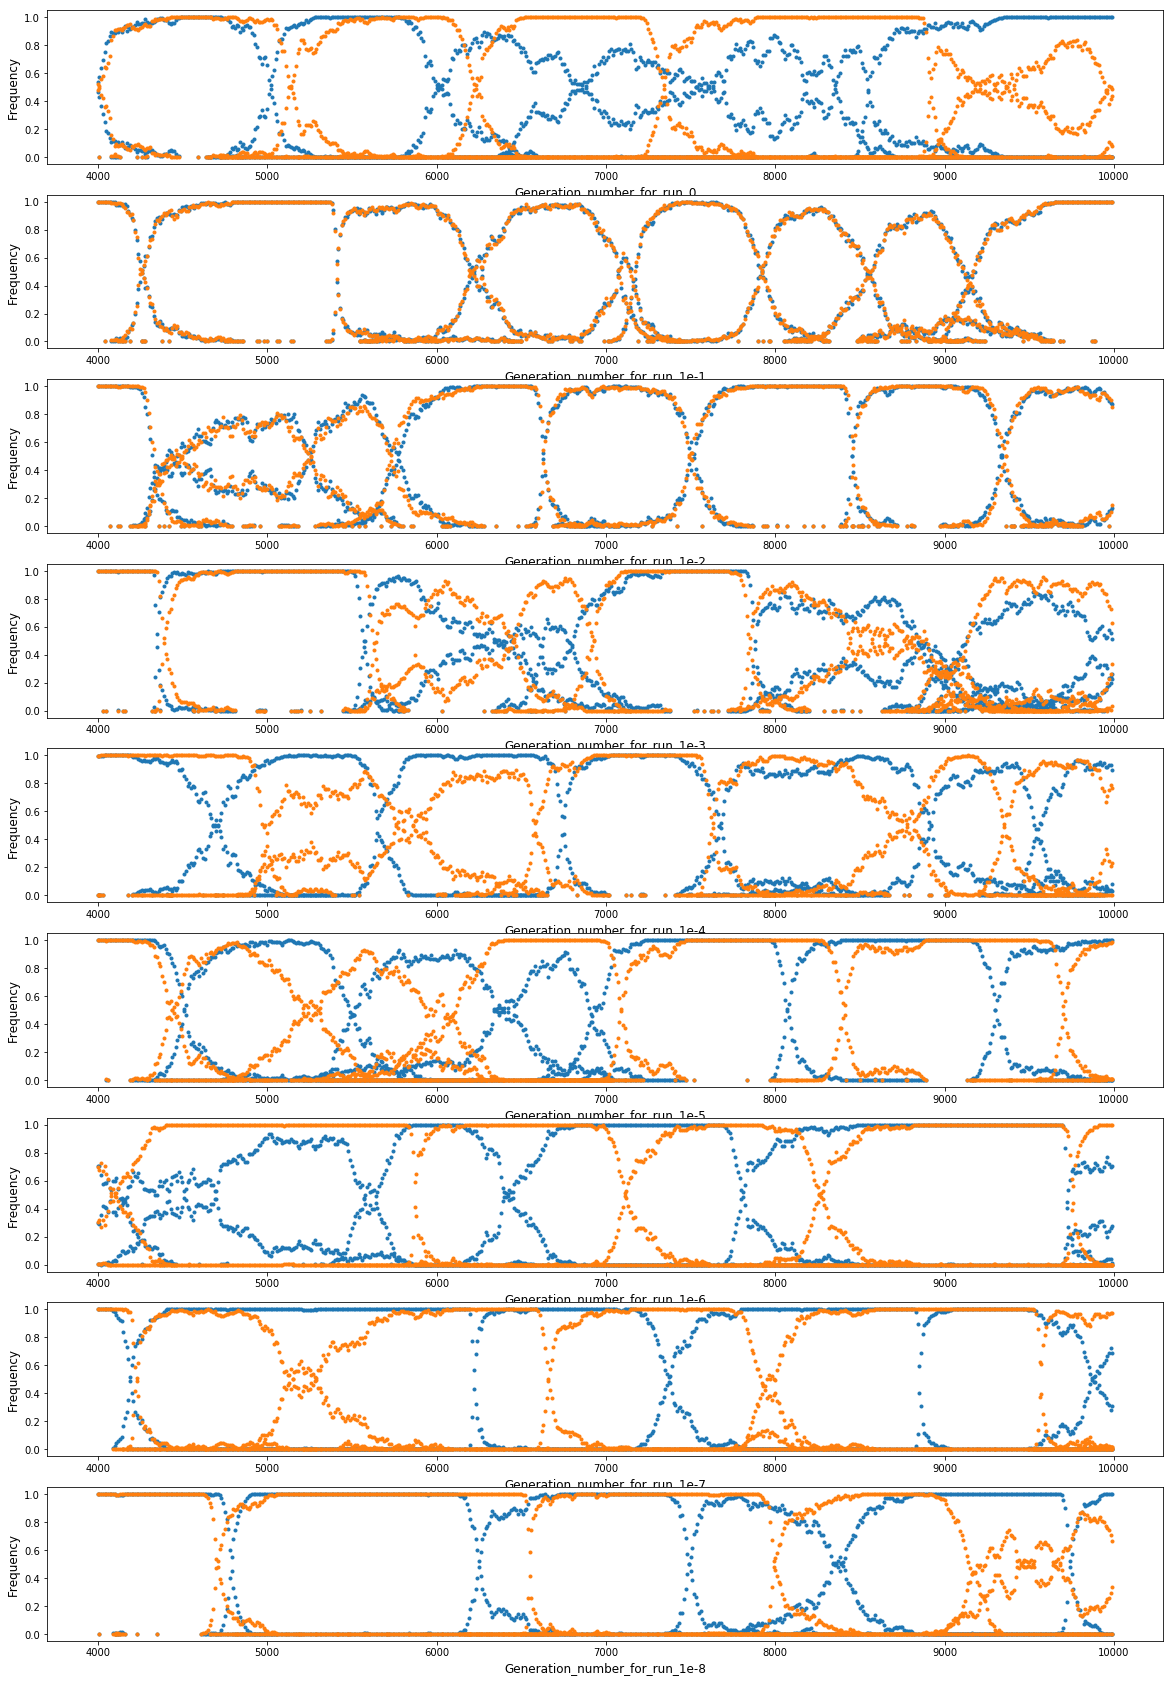

In [6]:
plot_data_mig("analyses/scaling_M_5/","Generation_number","Frequency","allele",0,0)

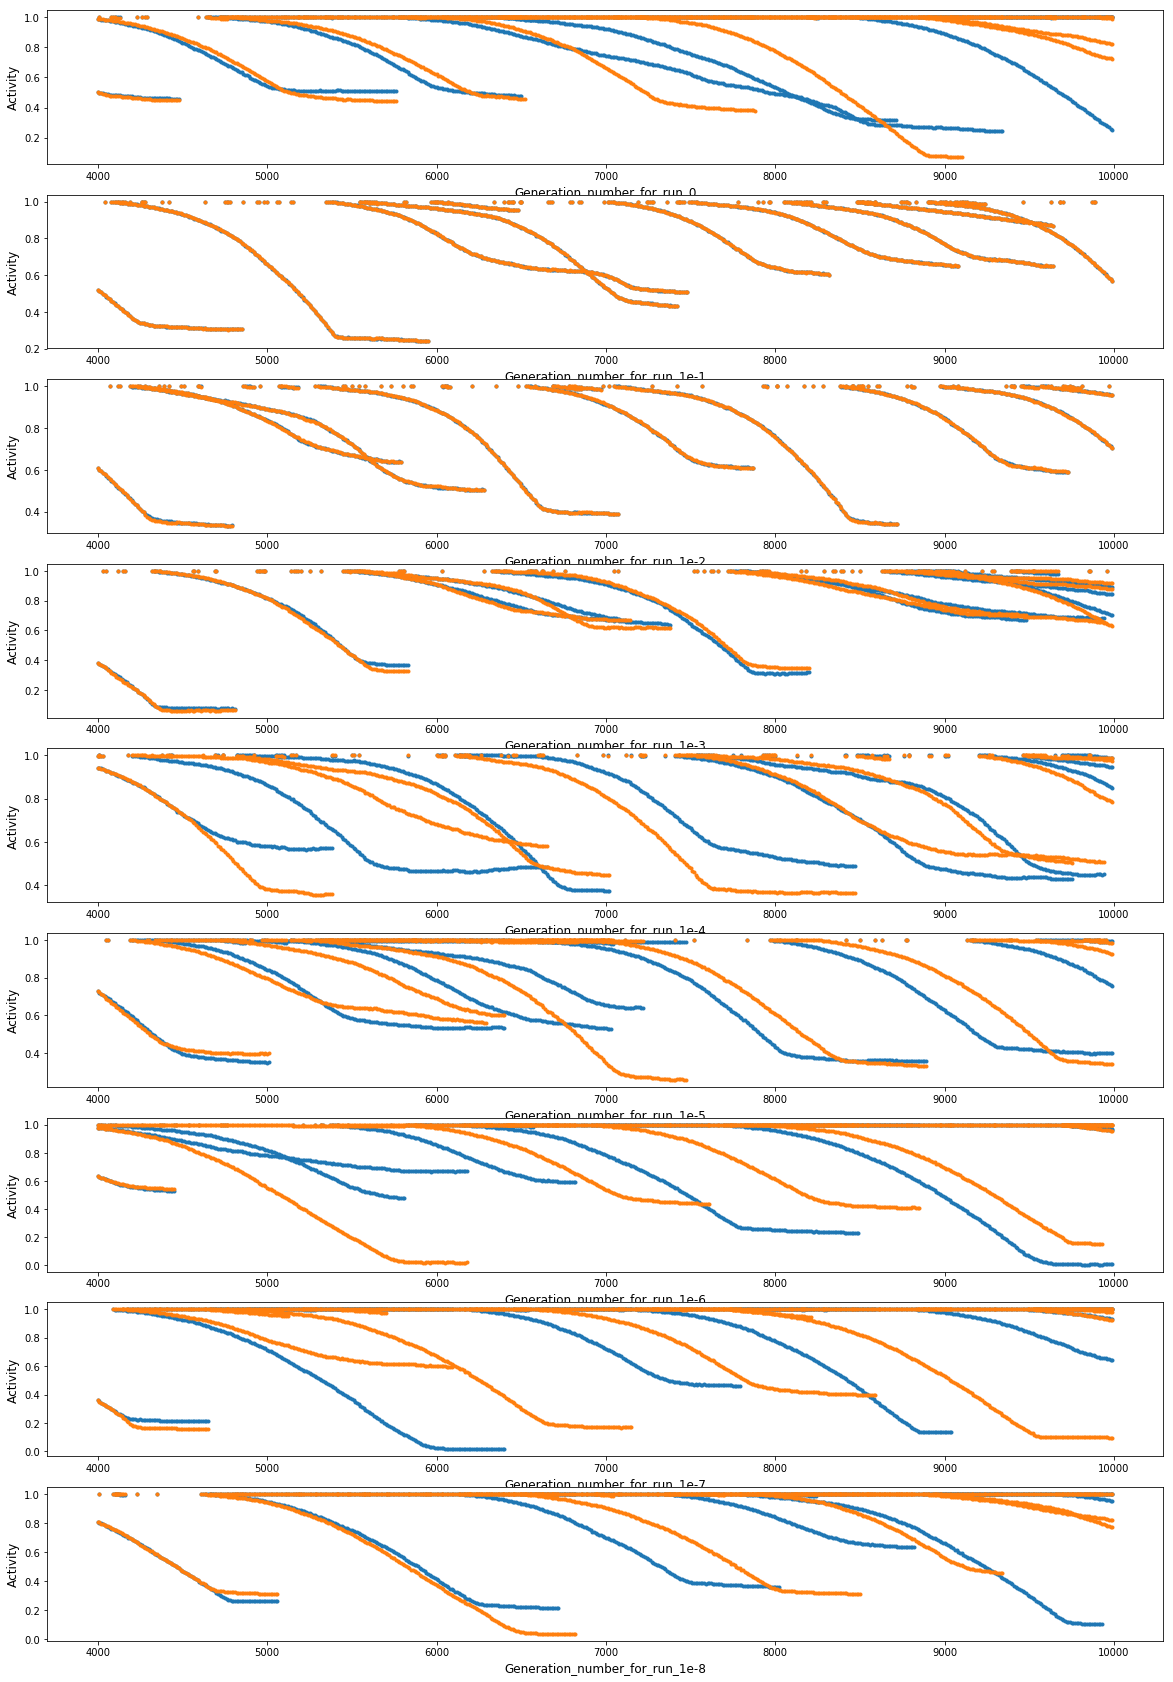

In [111]:
plot_data_mig("analyses/scaling_M_5/","Generation_number","Activity","allele",0,0)

In [294]:
#plot_data_mig("analyses/scaling_M_3/","Generation_number","Age","allele",0,0)

In [234]:
#plot_data_mig("analyses/scaling_M_3/","Generation_number","q_allele","allele",0,0)

In [235]:
#plot_data_mig("analyses/scaling_M_3/","Generation_number","Fertility_allele","allele",0,0)

In [14]:
def plot_red_queen_mig(target_folder_path,x_params,y_params,file_ext, withneutral, withoutnan,xtext,title,time_stable,end_time):
    plt.figure(1, figsize=(16,22))
    index_line=1
    i="0"
    lettres=["A","B"]
    paramname=["Fréquence", "Activité"]
    for j in range(len(y_params)):
        list_namefile,dico_file,dico_file_1,dico_file_2=dico_data_mig(target_folder_path,x_params,y_params[j], file_ext, withneutral, withoutnan)
        plt.subplot(len(list_namefile[0:9]),1,index_line)
        if i+"_x_params" in dico_file and i+"_y_params" in dico_file:
            plt.plot(dico_file[i+"_x_params"][time_stable:],dico_file[i+"_y_params"][time_stable:],'.',label="Population avant séparation")
        plt.plot(dico_file_1[i+"_x_params"][:end_time],dico_file_1[i+"_y_params"][:end_time],'.',label="Population 1")
        plt.plot(dico_file_2[i+"_x_params"][:end_time],dico_file_2[i+"_y_params"][:end_time],'.',label="Population 2")
        plt.ylabel(paramname[j], fontsize = 12)
        plt.xlabel("Nombre de générations", fontsize = 12)
        ytext=1
        plt.text(x=xtext,y=ytext,s=lettres[index_line-1],fontweight='bold',fontsize=16)
        plt.legend(loc=4)
        index_line=index_line+1
    #figure.suptitle(title,fontsize=18,fontweight="bold")
    #figure.subplots_adjust(top=0.95)

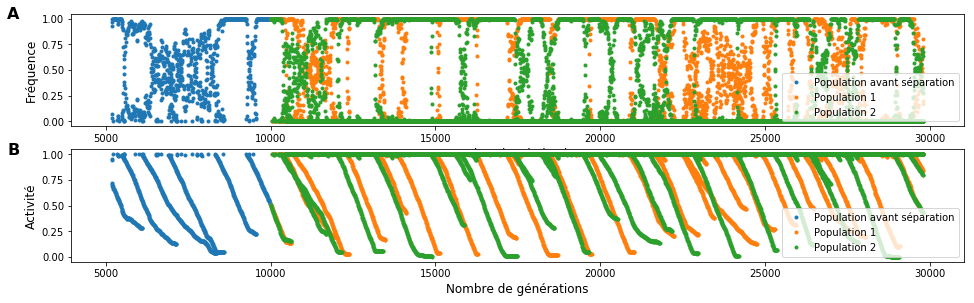

In [730]:
plot_red_queen_mig("meiosis/analyses/scaling_M_11/","Generation_number",["Frequency","Activity"],"allele", 0, 0,2000,"Reine Rouge en régime de succession en bi-populationnel",800,6200)

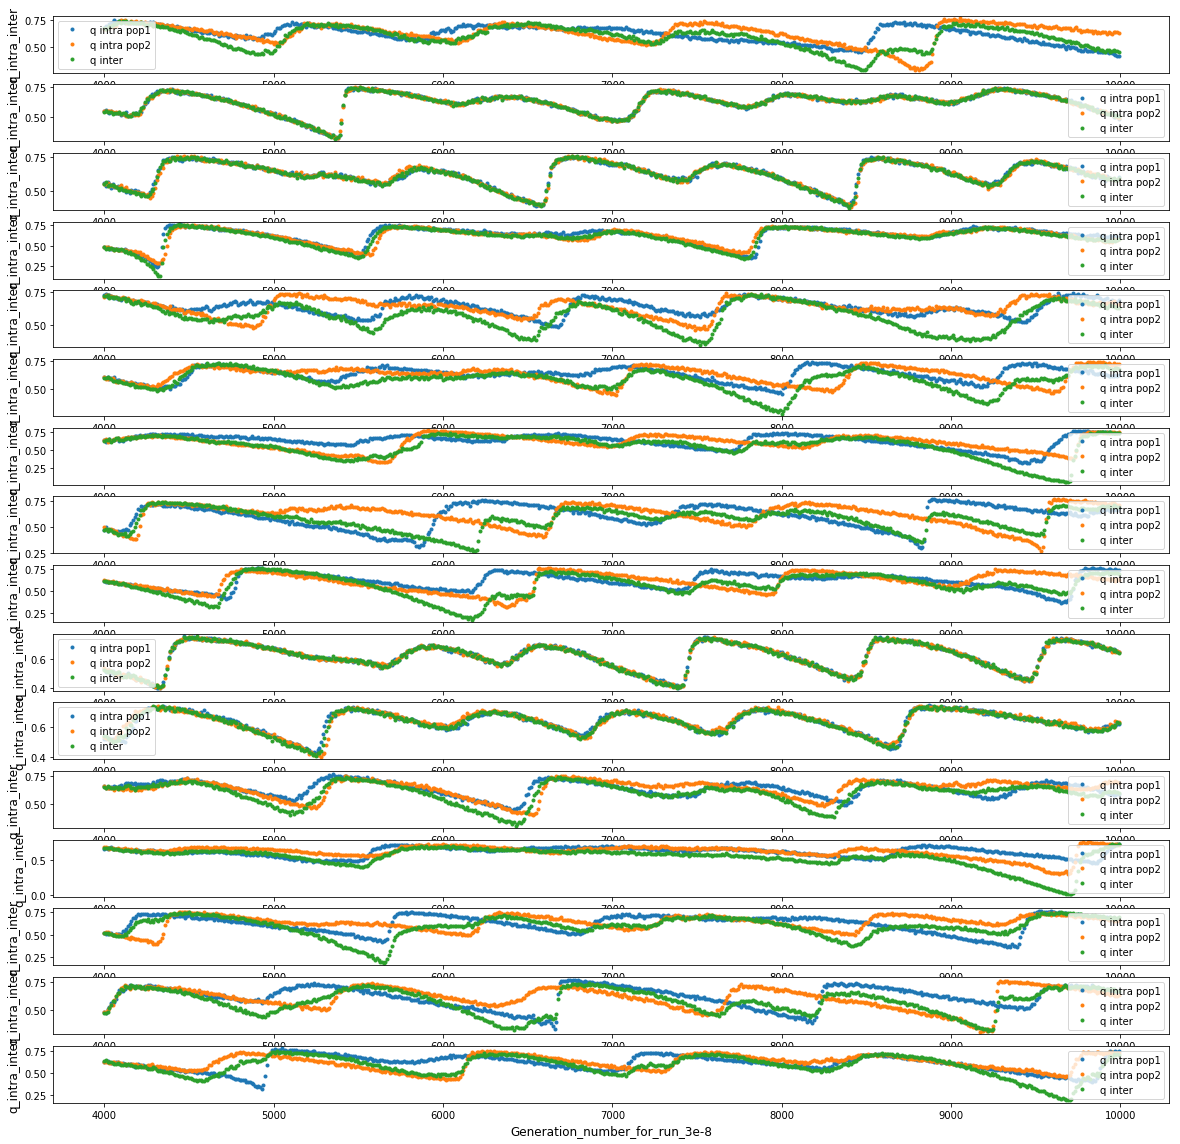

In [112]:
plt.figure(1, figsize=(20,20))
index_line=1
list_namefile,dico_file_inter,dico_file_1_inter,dico_file_2_inter=dico_data_mig("analyses/scaling_M_5/","Generation_number","q_inter", "trace",0,0)
list_namefile,dico_file_intra,dico_file_1_intra,dico_file_2_intra=dico_data_mig("analyses/scaling_M_5/","Generation_number","q_intra", "trace",0,0)
for i in list_namefile :
    plt.subplot(len(list_namefile),1,index_line)
    #if i+"_x_params" in dico_file_intra and i+"_y_params" in dico_file_intra:
        #plt.plot(dico_file_intra[i+"_x_params"],dico_file_intra[i+"_y_params"],'.',label="q intra before mig")
    plt.plot(dico_file_1_intra[i+"_x_params"],dico_file_1_intra[i+"_y_params"],'.',label="q intra pop1")
    plt.plot(dico_file_2_intra[i+"_x_params"],dico_file_2_intra[i+"_y_params"],'.',label="q intra pop2")
    plt.plot(dico_file_1_inter[i+"_x_params"],dico_file_1_inter[i+"_y_params"],'.',label="q inter")
    plt.ylabel("q_intra_inter", fontsize = 12)
    plt.xlabel("Generation_number"+"_for_run_"+i, fontsize = 12)
    plt.legend()
    index_line=index_line+1

# Succession

No handles with labels found to put in legend.


0.7061111111111111


No handles with labels found to put in legend.


0.7212222222222222


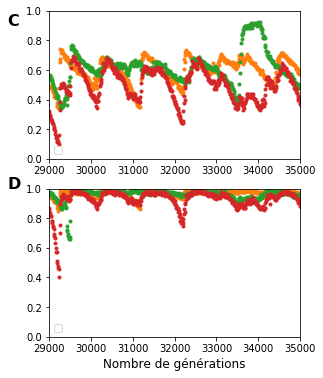

In [11]:
time_stable = 0 #500
time_stable1 = 0
end_time = -1 #2000
xtext=28000 #2100
leg_loc=3
long = 4.5
larg = 6
xmin=29000
xmax=35000
ymin=0
ymax=1
figure=plt.figure(1, figsize=(long,larg))
#figure.suptitle("Liaisons symétriques et fertilités hybride et intra-populationnel en régime de succession",fontsize=18,fontweight="bold")
#figure.subplots_adjust(top=0.9)
filename="0"
list_namefile,dico_file_inter,dico_file_1_inter,dico_file_2_inter=dico_data_mig("analyses/scaling_M_11/","Generation_number","q_inter", "trace",0,0)
list_namefile,dico_file_intra,dico_file_1_intra,dico_file_2_intra=dico_data_mig("analyses/scaling_M_11/","Generation_number","q_intra", "trace",0,0)
if time_stable == -1 :
    time_stable = len(dico_file_intra[filename+"_x_params"])
if end_time == -1 :
    end_time = len(dico_file_1_intra[filename+"_x_params"])
plt.subplot(2,1,1)
#if filename+"_x_params" in dico_file_intra and filename+"_y_params" in dico_file_intra:
    #plt.plot(dico_file_intra[filename+"_x_params"][time_stable:],dico_file_intra[filename+"_y_params"][time_stable:],'.',label="Avant séparation")
#plt.plot(dico_file_1_intra[filename+"_x_params"][time_stable1:end_time],dico_file_1_intra[filename+"_y_params"][time_stable1:end_time],'.',label="Intra population 1")
#plt.plot(dico_file_2_intra[filename+"_x_params"][time_stable1:end_time],dico_file_2_intra[filename+"_y_params"][time_stable1:end_time],'.',label="Intra population 2")
#plt.plot(dico_file_1_inter[filename+"_x_params"][time_stable1:end_time],dico_file_1_inter[filename+"_y_params"][time_stable1:end_time],'.',label="Hybride")
#plt.ylabel("Liaisons symétriques", fontsize = 12)
if filename+"_x_params" in dico_file_intra and filename+"_y_params" in dico_file_intra:
    plt.plot(dico_file_intra[filename+"_x_params"][time_stable:],dico_file_intra[filename+"_y_params"][time_stable:],'.')
plt.plot(dico_file_1_intra[filename+"_x_params"][time_stable1:end_time],dico_file_1_intra[filename+"_y_params"][time_stable1:end_time],'.')
plt.plot(dico_file_2_intra[filename+"_x_params"][time_stable1:end_time],dico_file_2_intra[filename+"_y_params"][time_stable1:end_time],'.')
plt.plot(dico_file_1_inter[filename+"_x_params"][time_stable1:end_time],dico_file_1_inter[filename+"_y_params"][time_stable1:end_time],'.')
plt.axis([xmin,xmax,ymin,ymax])
plt.legend(loc=leg_loc)
plt.text(x=xtext,y=0.9,s="C",fontweight='bold',fontsize=16)


prop_inf=0
for i in range(len(dico_file_1_intra[filename+"_x_params"])):
    if min(dico_file_1_intra[filename+"_y_params"][i],dico_file_2_intra[filename+"_y_params"][i],dico_file_1_inter[filename+"_y_params"][i])==dico_file_1_inter[filename+"_y_params"][i] :
        prop_inf+=1
prop_inf=prop_inf/len(dico_file_1_intra[filename+"_x_params"])
print(prop_inf)

list_namefile,dico_file_inter,dico_file_1_inter,dico_file_2_inter=dico_data_mig("analyses/scaling_M_11/","Generation_number","fertility_inter", "trace",0,0)
list_namefile,dico_file_intra,dico_file_1_intra,dico_file_2_intra=dico_data_mig("analyses/scaling_M_11/","Generation_number","fertility_intra", "trace",0,0)
plt.subplot(2,1,2)
#if filename+"_x_params" in dico_file_intra and filename+"_y_params" in dico_file_intra:
#    plt.plot(dico_file_intra[filename+"_x_params"][time_stable:],dico_file_intra[filename+"_y_params"][time_stable:],'.',label="Avant séparation")
#plt.plot(dico_file_1_intra[filename+"_x_params"][time_stable1:end_time],dico_file_1_intra[filename+"_y_params"][time_stable1:end_time],'.',label="Intra population 1")
#plt.plot(dico_file_2_intra[filename+"_x_params"][time_stable1:end_time],dico_file_2_intra[filename+"_y_params"][time_stable1:end_time],'.',label="Intra population 2")
#plt.plot(dico_file_1_inter[filename+"_x_params"][time_stable1:end_time],dico_file_1_inter[filename+"_y_params"][time_stable1:end_time],'.',label="Hybride")
#plt.ylabel("Taux de fertilité", fontsize = 12)
if filename+"_x_params" in dico_file_intra and filename+"_y_params" in dico_file_intra:
    plt.plot(dico_file_intra[filename+"_x_params"][time_stable:],dico_file_intra[filename+"_y_params"][time_stable:],'.')
plt.plot(dico_file_1_intra[filename+"_x_params"][time_stable1:end_time],dico_file_1_intra[filename+"_y_params"][time_stable1:end_time],'.')
plt.plot(dico_file_2_intra[filename+"_x_params"][time_stable1:end_time],dico_file_2_intra[filename+"_y_params"][time_stable1:end_time],'.')
plt.plot(dico_file_1_inter[filename+"_x_params"][time_stable1:end_time],dico_file_1_inter[filename+"_y_params"][time_stable1:end_time],'.')
plt.xlabel("Nombre de générations", fontsize = 12)
plt.axis([xmin,xmax,ymin,ymax])
plt.legend(loc=leg_loc)
plt.text(x=xtext,y=1,s="D",fontweight='bold',fontsize=16)

prop_inf=0
for i in range(len(dico_file_1_intra[filename+"_x_params"])):
    if min(dico_file_1_intra[filename+"_y_params"][i],dico_file_2_intra[filename+"_y_params"][i],dico_file_1_inter[filename+"_y_params"][i])==dico_file_1_inter[filename+"_y_params"][i] :
        prop_inf+=1
prop_inf=prop_inf/len(dico_file_1_intra[filename+"_x_params"])
print(prop_inf)

# Polymorphe

0.6691111111111111
0.6525555555555556


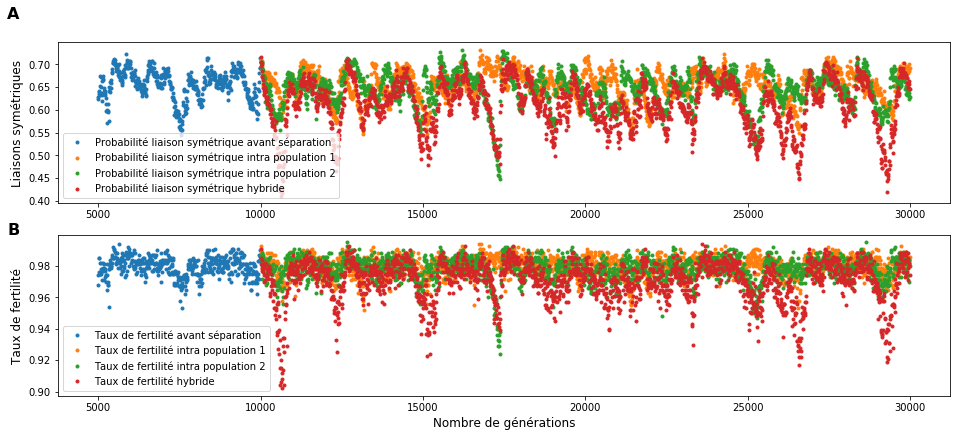

In [732]:
time_stable = 500
end_time = 2000
xtext=2200
figure=plt.figure(1, figsize=(16,6.5))
#figure.suptitle("Liaisons symétriques et fertilités hybride et intra-populationnel en régime polymorphe",fontsize=18,fontweight="bold")
#figure.subplots_adjust(top=0.9)
filename="0"
list_namefile,dico_file_inter,dico_file_1_inter,dico_file_2_inter=dico_data_mig("meiosis/analyses/scaling_M_10/","Generation_number","q_inter", "trace",0,0)
list_namefile,dico_file_intra,dico_file_1_intra,dico_file_2_intra=dico_data_mig("meiosis/analyses/scaling_M_10/","Generation_number","q_intra", "trace",0,0)
plt.subplot(2,1,1)
if filename+"_x_params" in dico_file_intra and filename+"_y_params" in dico_file_intra:
    plt.plot(dico_file_intra[filename+"_x_params"][time_stable:],dico_file_intra[filename+"_y_params"][time_stable:],'.',label="Probabilité liaison symétrique avant séparation")
plt.plot(dico_file_1_intra[filename+"_x_params"][:end_time],dico_file_1_intra[filename+"_y_params"][:end_time],'.',label="Probabilité liaison symétrique intra population 1")
plt.plot(dico_file_2_intra[filename+"_x_params"][:end_time],dico_file_2_intra[filename+"_y_params"][:end_time],'.',label="Probabilité liaison symétrique intra population 2")
plt.plot(dico_file_1_inter[filename+"_x_params"][:end_time],dico_file_1_inter[filename+"_y_params"][:end_time],'.',label="Probabilité liaison symétrique hybride")
plt.ylabel("Liaisons symétriques", fontsize = 12)
#plt.xlabel("Nombre de générations", fontsize = 12)
plt.legend(loc=3)
plt.text(x=xtext,y=0.8,s="A",fontweight='bold',fontsize=16)


prop_inf=0
for i in range(len(dico_file_1_intra[filename+"_x_params"])):
    if min(dico_file_1_intra[filename+"_y_params"][i],dico_file_2_intra[filename+"_y_params"][i],dico_file_1_inter[filename+"_y_params"][i])==dico_file_1_inter[filename+"_y_params"][i] :
        prop_inf+=1
prop_inf=prop_inf/len(dico_file_1_intra[filename+"_x_params"])
print(prop_inf)

list_namefile,dico_file_inter,dico_file_1_inter,dico_file_2_inter=dico_data_mig("meiosis/analyses/scaling_M_10/","Generation_number","fertility_inter", "trace",0,0)
list_namefile,dico_file_intra,dico_file_1_intra,dico_file_2_intra=dico_data_mig("meiosis/analyses/scaling_M_10/","Generation_number","fertility_intra", "trace",0,0)
plt.subplot(2,1,2)
if filename+"_x_params" in dico_file_intra and filename+"_y_params" in dico_file_intra:
    plt.plot(dico_file_intra[filename+"_x_params"][time_stable:],dico_file_intra[filename+"_y_params"][time_stable:],'.',label="Taux de fertilité avant séparation")
plt.plot(dico_file_1_intra[filename+"_x_params"][:end_time],dico_file_1_intra[filename+"_y_params"][:end_time],'.',label="Taux de fertilité intra population 1")
plt.plot(dico_file_2_intra[filename+"_x_params"][:end_time],dico_file_2_intra[filename+"_y_params"][:end_time],'.',label="Taux de fertilité intra population 2")
plt.plot(dico_file_1_inter[filename+"_x_params"][:end_time],dico_file_1_inter[filename+"_y_params"][:end_time],'.',label="Taux de fertilité hybride")
plt.ylabel("Taux de fertilité", fontsize = 12)
plt.xlabel("Nombre de générations", fontsize = 12)
plt.legend(loc=3)
plt.text(x=xtext,y=1,s="B",fontweight='bold',fontsize=16)

prop_inf=0
for i in range(len(dico_file_1_intra[filename+"_x_params"])):
    if min(dico_file_1_intra[filename+"_y_params"][i],dico_file_2_intra[filename+"_y_params"][i],dico_file_1_inter[filename+"_y_params"][i])==dico_file_1_inter[filename+"_y_params"][i] :
        prop_inf+=1
prop_inf=prop_inf/len(dico_file_1_intra[filename+"_x_params"])
print(prop_inf)

In [15]:
def plot_regim_mig(target_folder_path,x_param,y_params,files_names,withoutneutral,withoutnan,larg,long):
    data_file_1=readfiles(target_folder_path, files_names[0].split(".")[0], files_names[0].split(".")[1],withoutneutral,withoutnan)
    data_file_2=readfiles(target_folder_path, files_names[1].split(".")[0], files_names[1].split(".")[1],withoutneutral,withoutnan)
    print(files_names)
    index_line=1
    plt.figure(1, figsize=(long,larg))
    for param in y_params:
        plt.subplot(len(y_params),1,index_line)
        plt.plot(data_file_1[x_param], data_file_1[param],'.')
        plt.plot(data_file_1[x_param],np.ones((len(data_file_1[x_param]),1), dtype = float)*np.mean(data_file_1[param]) ,'r--')
        plt.plot(data_file_2[x_param], data_file_2[param],'.')
        plt.plot(data_file_2[x_param],np.ones((len(data_file_2[x_param]),1), dtype = float)*np.mean(data_file_2[param]) ,'r--')
        plt.ylabel(param, fontsize = 12)
        plt.xlabel(x_param, fontsize = 12)
        index_line=index_line+1

In [315]:
#plot_regim_mig(target_folder_path="analyses/scaling_M_3/",x_param="Generation_number",y_params=["Frequency","Activity","Age","q_allele","Fertility_allele"],files_names=["Run_M_0_1.allele","Run_M_0_2.allele"],withoutneutral=1,withoutnan=1,larg=17,long=18)

In [344]:
#plot_regim_mig(target_folder_path="analyses/scaling_M_3/",x_param="Generation_number",y_params=["Frequency","Activity","Age","q_allele","Fertility_allele"],files_names=["Run_M_1e-7_1.allele","Run_M_1e-7_2.allele"],withoutneutral=1,withoutnan=1,larg=17,long=18)

Here we can see that the populations act like there is no migration (similar as above where m=0)

In [313]:
#plot_regim_mig(target_folder_path="analyses/scaling_M_3/",x_param="Generation_number",y_params=["Frequency","Activity","Age","q_allele","Fertility_allele"],files_names=["Run_M_1e-2_1.allele","Run_M_1e-2_2.allele"],withoutneutral=1,withoutnan=1,larg=17,long=18)

Here the populations act exactly the same as it was one population

In [318]:
#plot_regim_mig(target_folder_path="analyses/scaling_M_3/",x_param="Generation_number",y_params=["Diversity","Activity","q_intra","fertility_intra","q_inter","fertility_inter"],files_names=["Run_M_1e-2_1.trace","Run_M_1e-2_2.trace"],withoutneutral=1,withoutnan=1,larg=17,long=18)

In [346]:
#plot_regim_mig(target_folder_path="analyses/scaling_M_3/",x_param="Generation_number",y_params=["Diversity","Activity","q_intra","fertility_intra","q_inter","fertility_inter"],files_names=["Run_M_1e-4_1.trace","Run_M_1e-4_2.trace"],withoutneutral=1,withoutnan=1,larg=17,long=18)

### Individual : Params vs age

In [295]:
#plot_data_mig("analyses/scaling_M_3/","Age","Frequency","allele",0,0)

In [296]:
#plot_data_mig("analyses/scaling_M_3/","Age","Activity","allele",0,0)

In [297]:
#plot_data_mig("analyses/scaling_M_3/","Age","q_allele","allele",0,0)

In [298]:
#plot_data_mig("analyses/scaling_M_4/","Age","Fertility_allele","allele",0,0)

[array([  4.52568684e-05]), array([ -5.50416288e-05]), array([-0.00016755]), array([-0.00014793]), array([ -3.39991336e-05]), array([-0.00015231]), array([ -8.70457179e-05]), array([-0.00011173]), array([ -2.63428804e-05]), array([-0.00017937]), array([-0.00013908]), array([-0.0001263]), array([ -5.42056198e-05]), array([-0.0001141]), array([ -8.27657390e-05]), array([ -6.70140068e-06])]
[array([  3.02563668e-05]), array([ -4.77913613e-05]), array([ -1.07756203e-05]), array([-0.0001343]), array([ -3.58061518e-05]), array([ -5.79413878e-05]), array([  5.45985395e-05]), array([  4.77213776e-05]), array([ -1.54725112e-05]), array([ -1.79345691e-05]), array([  2.69737558e-05]), array([-0.00016583]), array([-0.00022304]), array([  2.69461207e-05]), array([  3.89078392e-05]), array([ -7.84099071e-05])]
[array([ -5.84885648e-06]), array([ -4.73013421e-05]), array([ -1.06103647e-05]), array([-0.00012309]), array([ -7.99444406e-05]), array([ -7.04267341e-05]), array([-0.00011745]), array([-0.00

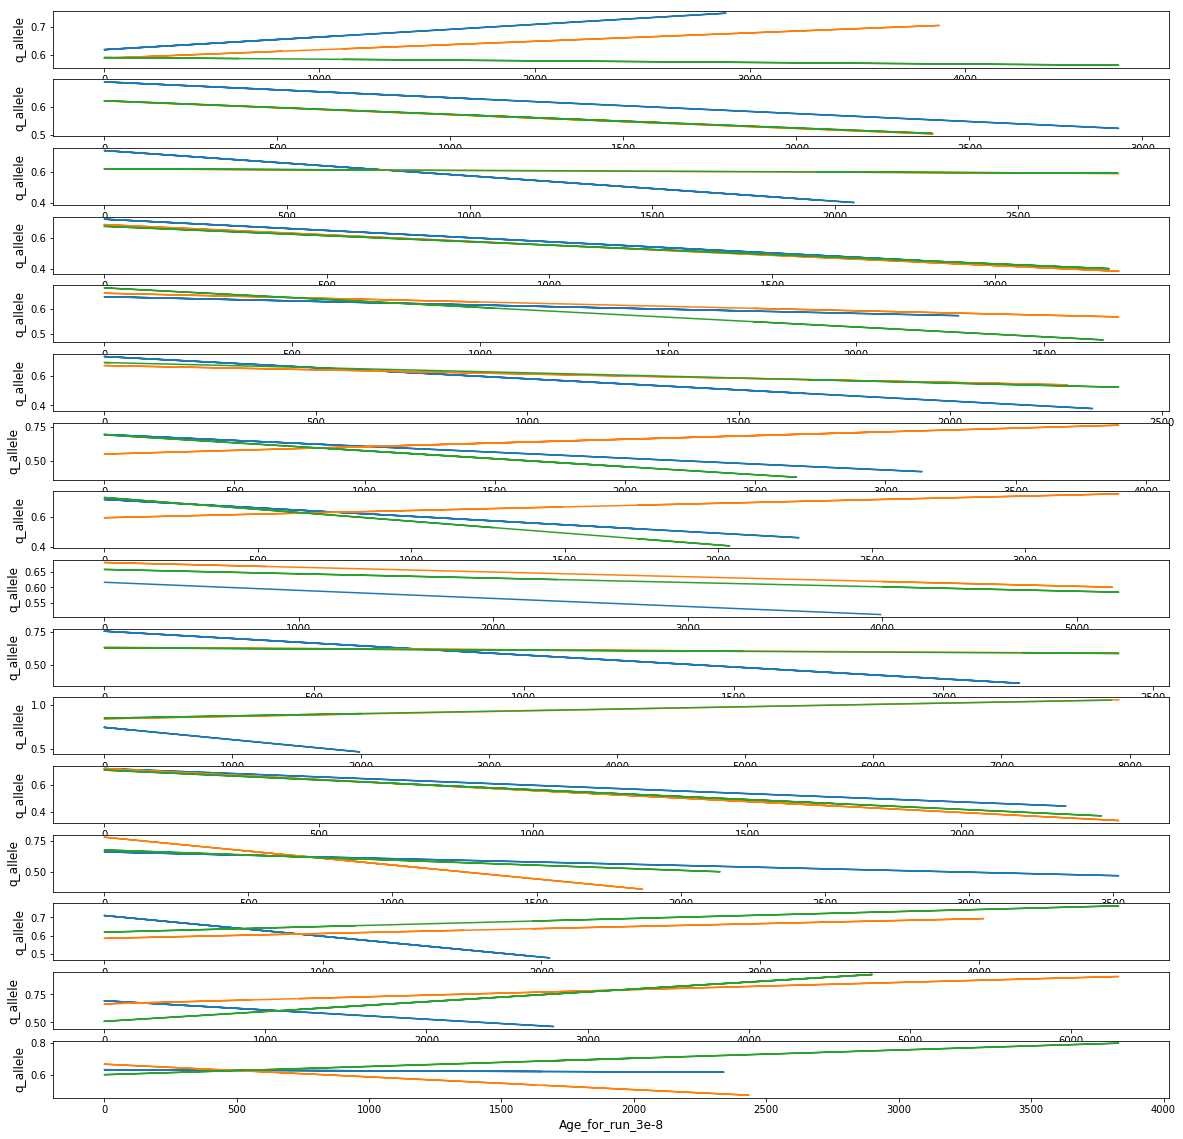

In [12]:
R2_score_list_pop=[]
R2_score_list_pop_1=[]
R2_score_list_pop_2=[]
intercept_list_pop=[]
intercept_list_pop_1=[]
intercept_list_pop_2=[]
slope_list_pop=[]
slope_list_pop_1=[]
slope_list_pop_2=[]
plt.figure(1, figsize=(20,20))
index_line=1
list_namefile,dico_file,dico_file_1,dico_file_2=dico_data_mig("analyses/scaling_M_6/","Age","q_allele","allele",0,1)
for i in list_namefile :
    plt.subplot(len(list_namefile),1,index_line)
    if i+"_x_params" in dico_file and i+"_y_params" in dico_file:
        #plt.plot(dico_file[i+"_x_params"],dico_file[i+"_y_params"],'.',label="pop before migration")
        lm = LinearRegression().fit(np.array(dico_file[i+"_x_params"]).reshape(-1, 1), np.array(dico_file[i+"_y_params"]))
        plt.plot(dico_file[i+"_x_params"], lm.predict(np.array(dico_file[i+"_x_params"]).reshape(-1, 1)))
    #plt.plot(dico_file_1[i+"_x_params"],dico_file_1[i+"_y_params"],'.',label="pop1")
    lm1 = LinearRegression().fit(np.array(dico_file_1[i+"_x_params"]).reshape(-1, 1), np.array(dico_file_1[i+"_y_params"]))
    plt.plot(dico_file_1[i+"_x_params"], lm1.predict(np.array(dico_file_1[i+"_x_params"]).reshape(-1, 1)))
    #plt.plot(dico_file_2[i+"_x_params"],dico_file_2[i+"_y_params"],'.',label="pop2")
    lm2 = LinearRegression().fit(np.array(dico_file_2[i+"_x_params"]).reshape(-1, 1), np.array(dico_file_2[i+"_y_params"]))
    plt.plot(dico_file_2[i+"_x_params"], lm2.predict(np.array(dico_file_2[i+"_x_params"]).reshape(-1, 1)))
    plt.ylabel("q_allele", fontsize = 12)
    plt.xlabel("Age"+"_for_run_"+i, fontsize = 12)
    score_lm = r2_score(np.array(dico_file[i+"_y_params"]),lm.predict(np.array(dico_file[i+"_x_params"]).reshape(-1, 1)))
    score_lm1 = r2_score(np.array(dico_file_1[i+"_y_params"]),lm1.predict(np.array(dico_file_1[i+"_x_params"]).reshape(-1, 1)))
    score_lm2 = r2_score(np.array(dico_file_2[i+"_y_params"]),lm2.predict(np.array(dico_file_2[i+"_x_params"]).reshape(-1, 1)))
    R2_score_list_pop.append(score_lm)
    R2_score_list_pop_1.append(score_lm1)
    R2_score_list_pop_2.append(score_lm2)
    intercept_list_pop.append(lm.intercept_)
    intercept_list_pop_1.append(lm1.intercept_)
    intercept_list_pop_2.append(lm2.intercept_)
    slope_list_pop.append(lm.coef_)
    slope_list_pop_1.append(lm1.coef_)
    slope_list_pop_2.append(lm2.coef_)
    index_line=index_line+1
print(slope_list_pop)
print(slope_list_pop_1)
print(slope_list_pop_2)

[array([ -9.00334026e-05]), array([-0.00017441]), array([-0.00010817]), array([-0.00017932]), array([-0.00011606]), array([-0.00012053]), array([ -9.57079424e-05]), array([ -8.32124091e-05]), array([ -7.02395422e-05]), array([-0.0001572]), array([  8.41875343e-07]), array([-0.00014941]), array([ -9.67010081e-05]), array([ -8.43525087e-05]), array([ -2.09954502e-05]), array([-0.00010394])]
[array([-0.00011772]), array([-0.00016016]), array([-0.00010252]), array([-0.00016716]), array([-0.00013227]), array([-0.00013558]), array([-0.00019795]), array([-0.00015762]), array([ -6.97101471e-05]), array([-0.00015588]), array([  1.01010152e-06]), array([-0.0001117]), array([ -9.19375935e-05]), array([ -6.64721509e-05]), array([ -2.55927899e-05]), array([ -2.87776780e-05])]


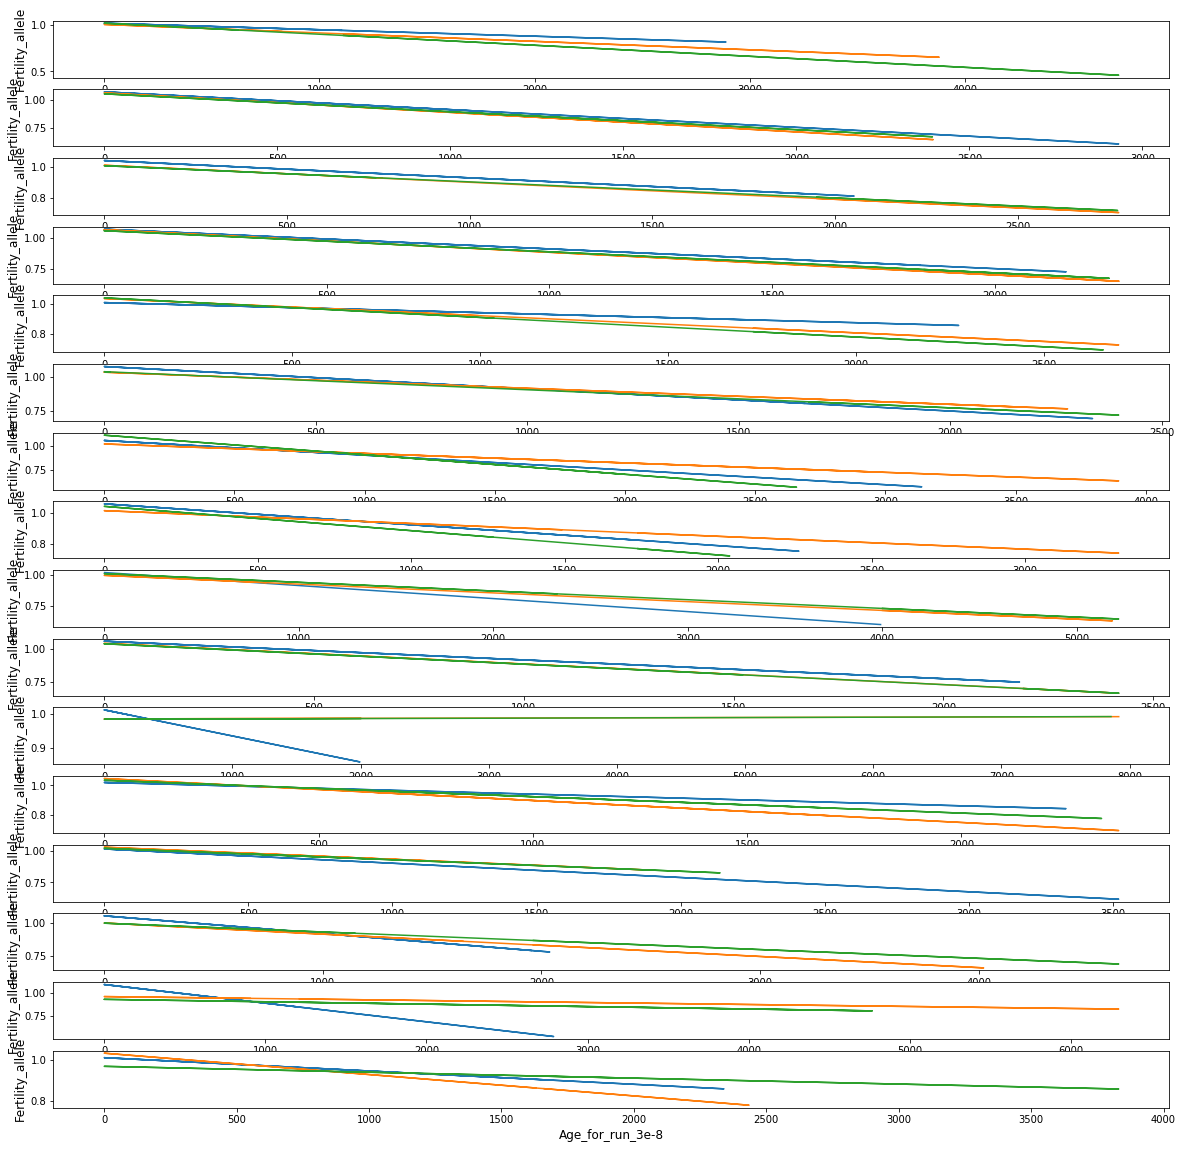

In [13]:
R2_score_list_pop=[]
R2_score_list_pop_1=[]
R2_score_list_pop_2=[]
intercept_list_pop=[]
intercept_list_pop_1=[]
intercept_list_pop_2=[]
slope_list_pop=[]
slope_list_pop_1=[]
slope_list_pop_2=[]
plt.figure(1, figsize=(20,20))
index_line=1
list_namefile,dico_file,dico_file_1,dico_file_2=dico_data_mig("analyses/scaling_M_6/","Age","Fertility_allele","allele",0,1)
for i in list_namefile :
    plt.subplot(len(list_namefile),1,index_line)
    if i+"_x_params" in dico_file and i+"_y_params" in dico_file:
        #plt.plot(dico_file[i+"_x_params"],dico_file[i+"_y_params"],'.',label="pop before migration")
        lm = LinearRegression().fit(np.array(dico_file[i+"_x_params"]).reshape(-1, 1), np.array(dico_file[i+"_y_params"]))
        plt.plot(dico_file[i+"_x_params"], lm.predict(np.array(dico_file[i+"_x_params"]).reshape(-1, 1)))
    #plt.plot(dico_file_1[i+"_x_params"],dico_file_1[i+"_y_params"],'.',label="pop1")
    lm1 = LinearRegression().fit(np.array(dico_file_1[i+"_x_params"]).reshape(-1, 1), np.array(dico_file_1[i+"_y_params"]))
    plt.plot(dico_file_1[i+"_x_params"], lm1.predict(np.array(dico_file_1[i+"_x_params"]).reshape(-1, 1)))
    #plt.plot(dico_file_2[i+"_x_params"],dico_file_2[i+"_y_params"],'.',label="pop2")
    lm2 = LinearRegression().fit(np.array(dico_file_2[i+"_x_params"]).reshape(-1, 1), np.array(dico_file_2[i+"_y_params"]))
    plt.plot(dico_file_2[i+"_x_params"], lm2.predict(np.array(dico_file_2[i+"_x_params"]).reshape(-1, 1)))
    plt.ylabel("Fertility_allele", fontsize = 12)
    plt.xlabel("Age"+"_for_run_"+i, fontsize = 12)
    score_lm = r2_score(np.array(dico_file[i+"_y_params"]),lm.predict(np.array(dico_file[i+"_x_params"]).reshape(-1, 1)))
    score_lm1 = r2_score(np.array(dico_file_1[i+"_y_params"]),lm1.predict(np.array(dico_file_1[i+"_x_params"]).reshape(-1, 1)))
    score_lm2 = r2_score(np.array(dico_file_2[i+"_y_params"]),lm2.predict(np.array(dico_file_2[i+"_x_params"]).reshape(-1, 1)))
    R2_score_list_pop.append(score_lm)
    R2_score_list_pop_1.append(score_lm1)
    R2_score_list_pop_2.append(score_lm2)
    intercept_list_pop.append(lm.intercept_)
    intercept_list_pop_1.append(lm1.intercept_)
    intercept_list_pop_2.append(lm2.intercept_)
    slope_list_pop.append(lm.coef_)
    slope_list_pop_1.append(lm1.coef_)
    slope_list_pop_2.append(lm2.coef_)
    index_line=index_line+1
print(slope_list_pop_1)
print(slope_list_pop_2)

### Scaling

In [12]:
def readscalingexperimentmigration(target_folder_path , scaling_param_name, param_names_allele, param_names_trace, withoutneutral, withoutnan):
    list_files = sorted(os.listdir(target_folder_path))
    stat_dict_allele = dict()
    stat_dict_allele_1 = dict()
    stat_dict_allele_2 = dict()
    for param in param_names_allele:
        stat_dict_allele[scaling_param_name]=[]
        stat_dict_allele[param+"_mean"]=[]
        stat_dict_allele[param+"_variance"]=[]
        stat_dict_allele_1[scaling_param_name]=[]
        stat_dict_allele_1[param+"_mean"]=[]
        stat_dict_allele_1[param+"_variance"]=[]
        stat_dict_allele_2[scaling_param_name]=[]
        stat_dict_allele_2[param+"_mean"]=[]
        stat_dict_allele_2[param+"_variance"]=[]
    stat_dict_trace = dict()
    stat_dict_trace_1 = dict()
    stat_dict_trace_2 = dict()
    for param in param_names_trace:
        stat_dict_trace[scaling_param_name]=[]
        stat_dict_trace[param+"_mean"]=[]
        stat_dict_trace[param+"_variance"]=[]
        stat_dict_trace_1[scaling_param_name]=[]
        stat_dict_trace_1[param+"_mean"]=[]
        stat_dict_trace_1[param+"_variance"]=[]
        stat_dict_trace_2[scaling_param_name]=[]
        stat_dict_trace_2[param+"_mean"]=[]
        stat_dict_trace_2[param+"_variance"]=[]
    for file_name in list_files :
        if file_name.split(".")[1]=="allele" :
            if (file_name.split(".")[0]).split("_")[-1]=="1":
                stat_dict_allele_1[scaling_param_name].append(float((file_name.split(".")[0]).split("_")[2]))
            if (file_name.split(".")[0]).split("_")[-1]=="2":
                stat_dict_allele_2[scaling_param_name].append(float((file_name.split(".")[0]).split("_")[2]))
            else:
                stat_dict_allele[scaling_param_name].append(float((file_name.split(".")[0]).split("_")[2]))
            data_file = readfiles(target_folder_path, file_name.split(".")[0], file_name.split(".")[1], withoutneutral, withoutnan)
            for key in data_file.keys():
                if (file_name.split(".")[0]).split("_")[-1]=="1":
                    #print(key)
                    (stat_dict_allele_1[key+"_mean"]).append(np.mean(data_file[key]))
                    (stat_dict_allele_1[key+"_variance"]).append(np.var(data_file[key]))
                if (file_name.split(".")[0]).split("_")[-1]=="2":
                    #print(key)
                    (stat_dict_allele_2[key+"_mean"]).append(np.mean(data_file[key]))
                    (stat_dict_allele_2[key+"_variance"]).append(np.var(data_file[key]))
                else :
                    #print(key)
                    (stat_dict_allele[key+"_mean"]).append(np.mean(data_file[key]))
                    (stat_dict_allele[key+"_variance"]).append(np.var(data_file[key]))
        elif file_name.split(".")[1]=="trace" :
            if (file_name.split(".")[0]).split("_")[-1]=="1":
                stat_dict_trace_1[scaling_param_name].append(float((file_name.split(".")[0]).split("_")[2]))
            if (file_name.split(".")[0]).split("_")[-1]=="2":
                stat_dict_trace_2[scaling_param_name].append(float((file_name.split(".")[0]).split("_")[2]))  
            else :
                stat_dict_trace[scaling_param_name].append(float((file_name.split(".")[0]).split("_")[2]))  
            data_file = readfiles(target_folder_path, file_name.split(".")[0], file_name.split(".")[1], withoutneutral, withoutnan)
            for key in data_file.keys():
                if (file_name.split(".")[0]).split("_")[-1]=="1":
                    (stat_dict_trace_1[key+"_mean"]).append(np.mean(data_file[key]))
                    (stat_dict_trace_1[key+"_variance"]).append(np.var(data_file[key]))
                if (file_name.split(".")[0]).split("_")[-1]=="2":
                    (stat_dict_trace_2[key+"_mean"]).append(np.mean(data_file[key]))
                    (stat_dict_trace_2[key+"_variance"]).append(np.var(data_file[key]))
                else :
                    (stat_dict_trace[key+"_mean"]).append(np.mean(data_file[key]))
                    (stat_dict_trace[key+"_variance"]).append(np.var(data_file[key]))
    return (stat_dict_allele,stat_dict_allele_1,stat_dict_allele_2,stat_dict_trace,stat_dict_trace_1,stat_dict_trace_2)

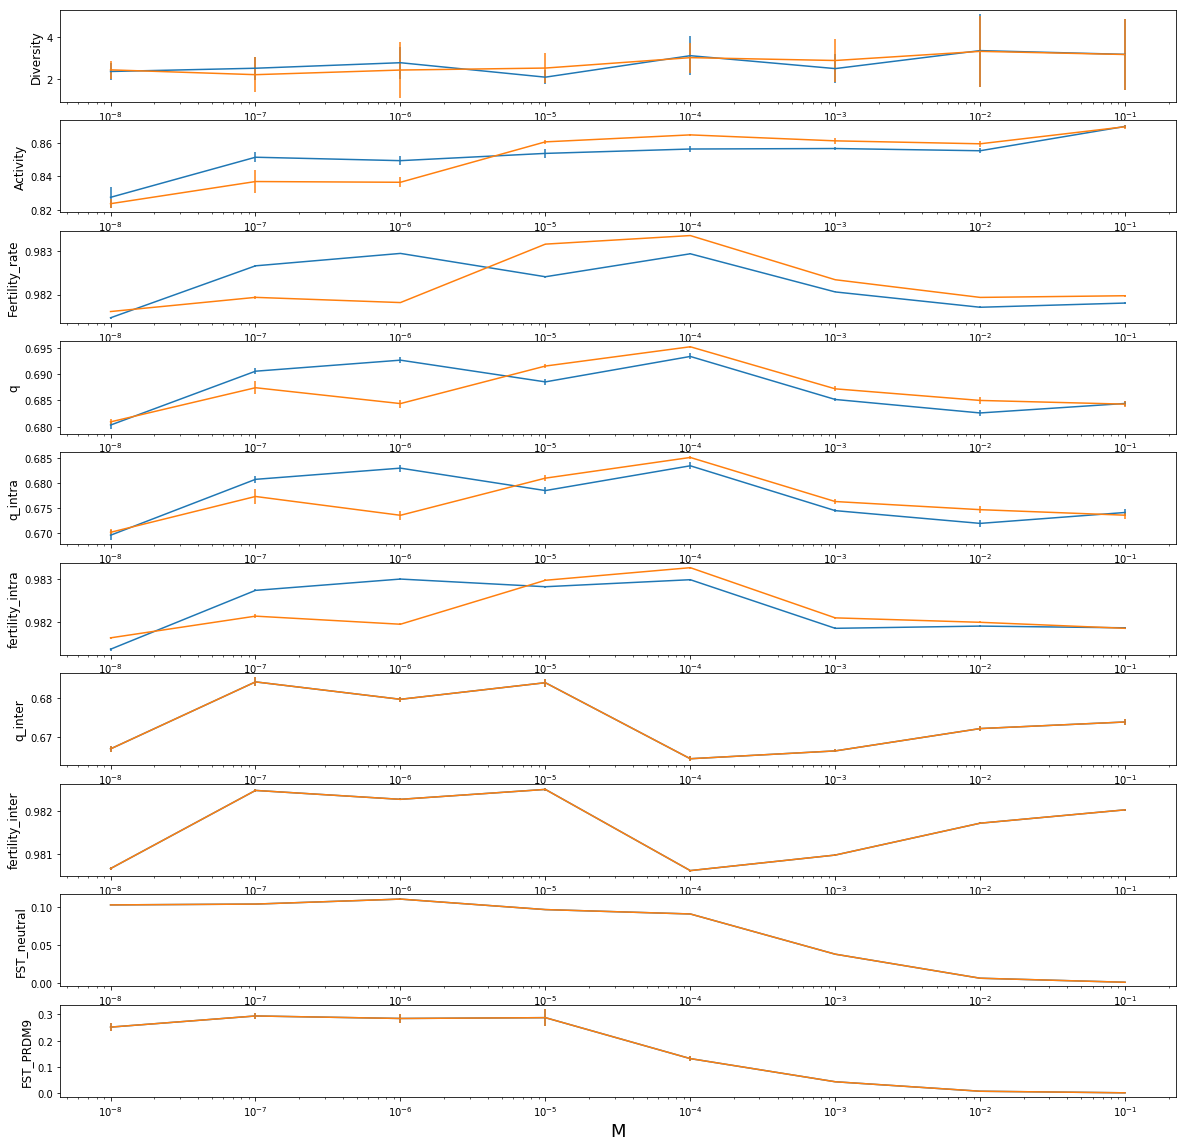

In [115]:
allele,allele1,allele2,trace,trace1,trace2=readscalingexperimentmigration(target_folder_path="analyses/scaling_M_3/" , scaling_param_name="M", param_names_allele=["Generation_number","Allele_number","Frequency","Activity","Age","q_allele","Fertility_allele"], param_names_trace=["Generation_number","Number_of_allele","Total_nb_allele","Total_number_of_allele","Diversity","Activity","Time","Fertility_rate","2_DSB_on_one_site_rate","No_DSB_rate","No_symmetrical_sites_rate","q","q_intra","fertility_intra","q_inter","fertility_inter","FST_neutral","FST_PRDM9"],withoutneutral=0, withoutnan=0)
scaling_param_name="M"
param_to_plot=["Diversity","Activity","Fertility_rate","q","q_intra","fertility_intra","q_inter","fertility_inter","FST_neutral","FST_PRDM9"]
n=len(param_to_plot)

plt.figure(1, figsize=(20,20))
for index_parameter in range(n):
    plt.subplot(n,1,index_parameter+1)
    plt.errorbar(trace1[scaling_param_name][1:len(trace1[scaling_param_name])], trace1[param_to_plot[index_parameter]+'_mean'][1:len(trace1[scaling_param_name])], trace1[param_to_plot[index_parameter]+'_variance'][1:len(trace1[scaling_param_name])])
    plt.errorbar(trace2[scaling_param_name][1:len(trace2[scaling_param_name])], trace2[param_to_plot[index_parameter]+'_mean'][1:len(trace2[scaling_param_name])], trace2[param_to_plot[index_parameter]+'_variance'][1:len(trace2[scaling_param_name])])
    plt.xscale('log')
    plt.ylabel(param_to_plot[index_parameter], fontsize = 12)
    plt.xlabel(scaling_param_name, fontsize = 18)

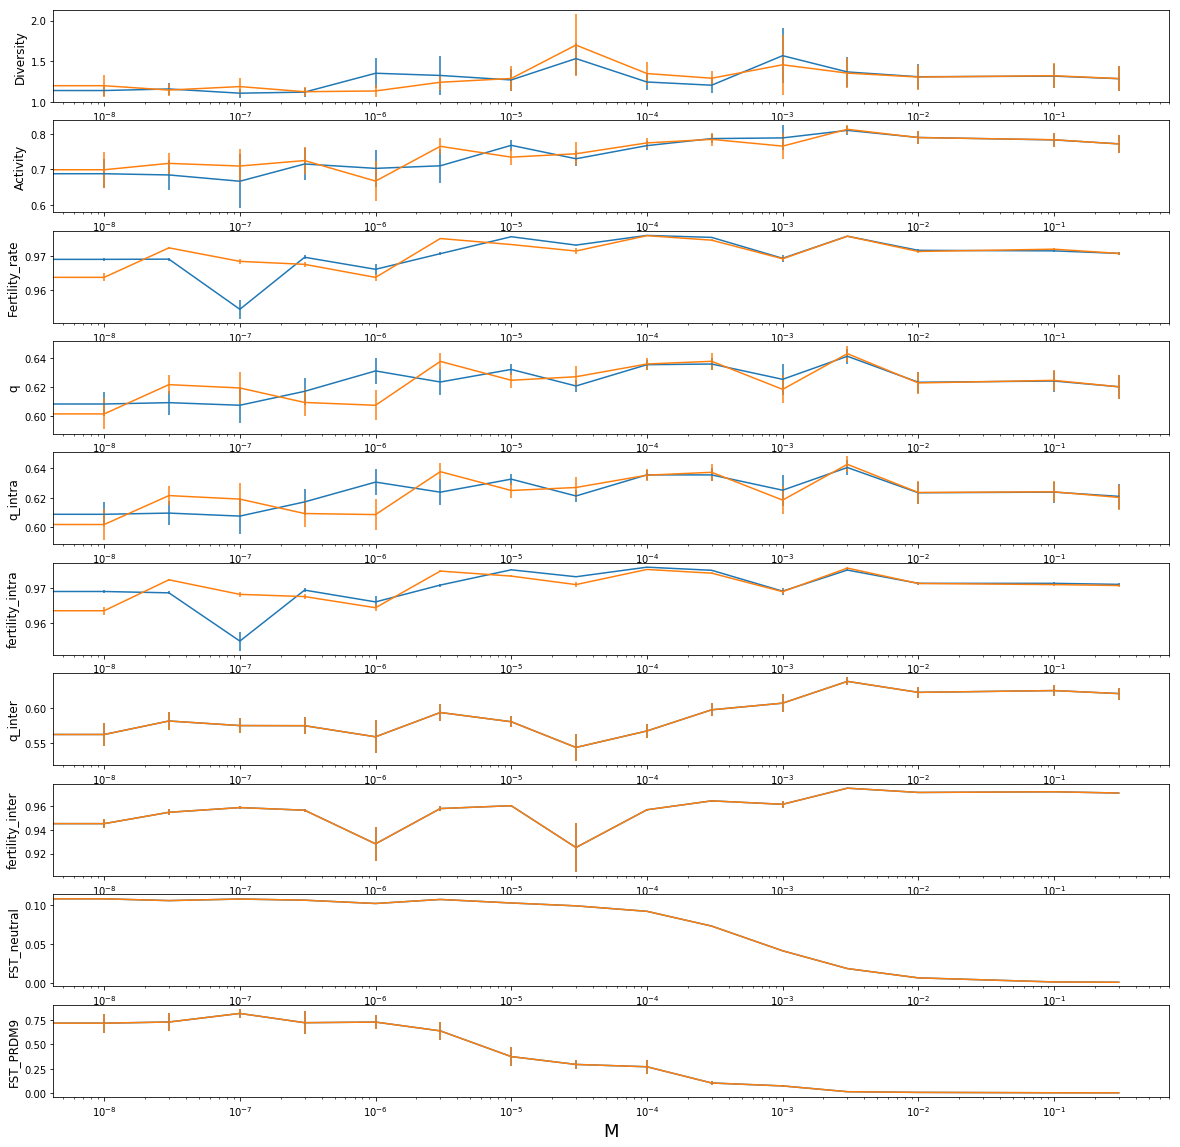

In [116]:
allele,allele1,allele2,trace,trace1,trace2=readscalingexperimentmigration(target_folder_path="analyses/scaling_M_5/" , scaling_param_name="M", param_names_allele=["Generation_number","Allele_number","Frequency","Activity","Age","q_allele","Fertility_allele","mean_affinity"], param_names_trace=["Generation_number","Number_of_allele","Total_nb_allele","Total_number_of_allele","Diversity","Activity","Mean_Age","Time","Fertility_rate","2_DSB_on_one_site_rate","No_DSB_rate","No_symmetrical_sites_rate","q","q_intra","fertility_intra","q_inter","fertility_inter","FST_neutral","FST_PRDM9"], withoutneutral=0, withoutnan=0)
scaling_param_name="M"
param_to_plot=["Diversity","Activity","Fertility_rate","q","q_intra","fertility_intra","q_inter","fertility_inter","FST_neutral","FST_PRDM9"]
n=len(param_to_plot)

plt.figure(1, figsize=(20,20))
#print(trace1)
cletodelete=[]
cletodelete1=[]
cletodelete2=[]
for cle in trace:
    if len(trace[cle])==0:
        cletodelete.append(cle)
    if len(trace1[cle])==0:
        cletodelete1.append(cle)
    if len(trace2[cle])==0:
        cletodelete2.append(cle)
for cle in cletodelete:
    del trace[cle]
for cle in cletodelete1:
    del trace1[cle]
for cle in cletodelete2:
    del trace2[cle]
df_trace_1 = pd.DataFrame(trace1,index = trace1["M"])
df_trace_1.sort_values(by = "M", inplace = True)
df_trace_2 = pd.DataFrame(trace2,index = trace2["M"])
df_trace_2.sort_values(by = "M", inplace = True)
for index_parameter in range(n):
    plt.subplot(n,1,index_parameter+1)
    plt.errorbar(df_trace_1[scaling_param_name], df_trace_1[param_to_plot[index_parameter]+'_mean'], df_trace_1[param_to_plot[index_parameter]+'_variance'])
    plt.errorbar(df_trace_2[scaling_param_name], df_trace_2[param_to_plot[index_parameter]+'_mean'], df_trace_2[param_to_plot[index_parameter]+'_variance'])
    plt.xscale('log')
    plt.ylabel(param_to_plot[index_parameter], fontsize = 12)
    plt.xlabel(scaling_param_name, fontsize = 18)

In [117]:
selct_coeff=[]
selct_coeff1=[]
selct_coeff2=[]
fourNs=[]
fourNs1=[]
fourNs2=[]
for index in range(len(trace1["Fertility_rate"+'_mean'])):
    selct_coeff1.append(np.log(intercept_list_pop_1[index])-np.log(trace1["Fertility_rate"+'_mean'][index]))
    fourNs1.append(4*1000*selct_coeff1[index])
    selct_coeff2.append(np.log(intercept_list_pop_2[index])-np.log(trace2["Fertility_rate"+'_mean'][index]))
    fourNs2.append(4*1000*selct_coeff2[index])
#print(selct_coeff1)
#print(selct_coeff2)
print(fourNs1)
print(fourNs2)

[181.82717059728344, 273.52035886570002, -92.517214310954273, 240.93002246393723, 93.2537204089178, 244.12813507050029, 343.82719583403548, -56.098184358934603, 271.65564589145197, 273.73676913058546, -170.11963185621565, 196.31475675043447, 227.69463514159838, 187.43824708914366, 162.24337751859744, 307.39965965944526]
[422.35405836635726, 271.26418430044527, -52.503519853572641, 194.60847195969936, 352.48927588374517, 240.9770108865863, 302.19705163839609, 321.93167208276412, 367.50524448569485, 236.76555910020761, -176.32200941679039, 246.5508020270598, 269.29997219948035, 204.94210684752517, 265.89762301937571, 18.238032776628167]


Text(0.5,0,'M')

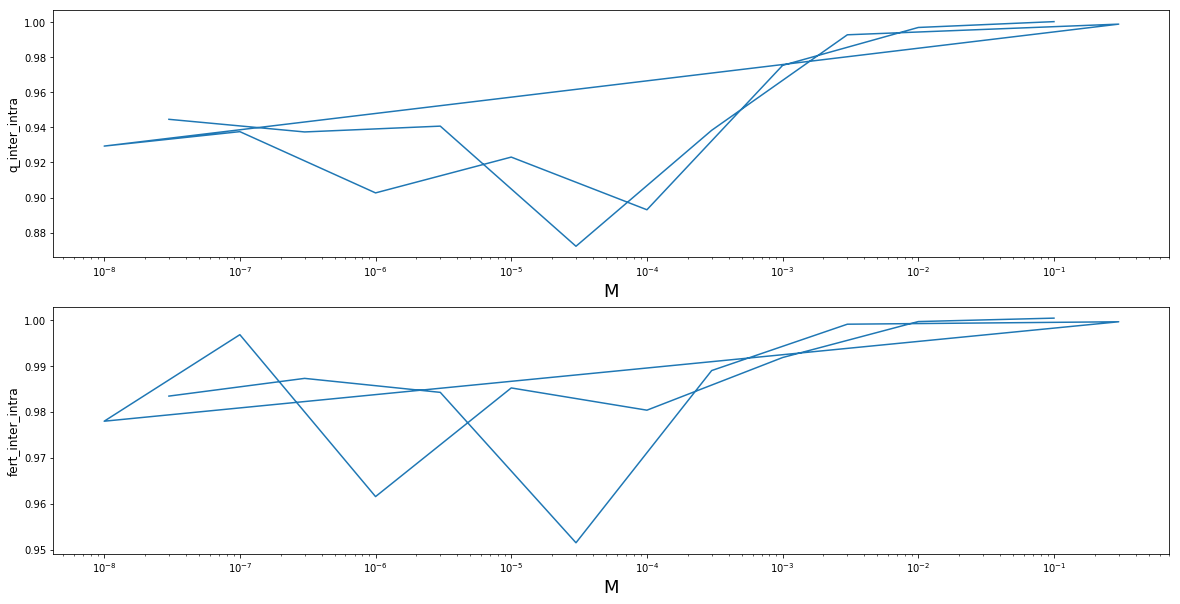

In [118]:
q_inter_intra=[]
fert_inter_intra=[]
for i in range(len(trace1["q_inter"+'_mean'])):
    if i != 0:
        q_inter_intra.append(trace1["q_inter"+'_mean'][i]/((trace1["q_intra"+'_mean'][i]+trace2["q_intra"+'_mean'][i])/2))
        fert_inter_intra.append(trace1["fertility_inter"+'_mean'][i]/((trace1["fertility_intra"+'_mean'][i]+trace2["fertility_intra"+'_mean'][i])/2))
plt.figure(1, figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(trace1["M"][1:len(trace1["q_inter"+'_mean'])],q_inter_intra)
plt.xscale('log')
plt.ylabel("q_inter_intra", fontsize = 12)
plt.xlabel(scaling_param_name, fontsize = 18)
plt.subplot(2,1,2)
plt.plot(trace1["M"][1:len(trace1["q_inter"+'_mean'])],fert_inter_intra)
plt.xscale('log')
plt.ylabel("fert_inter_intra", fontsize = 12)
plt.xlabel(scaling_param_name, fontsize = 18)

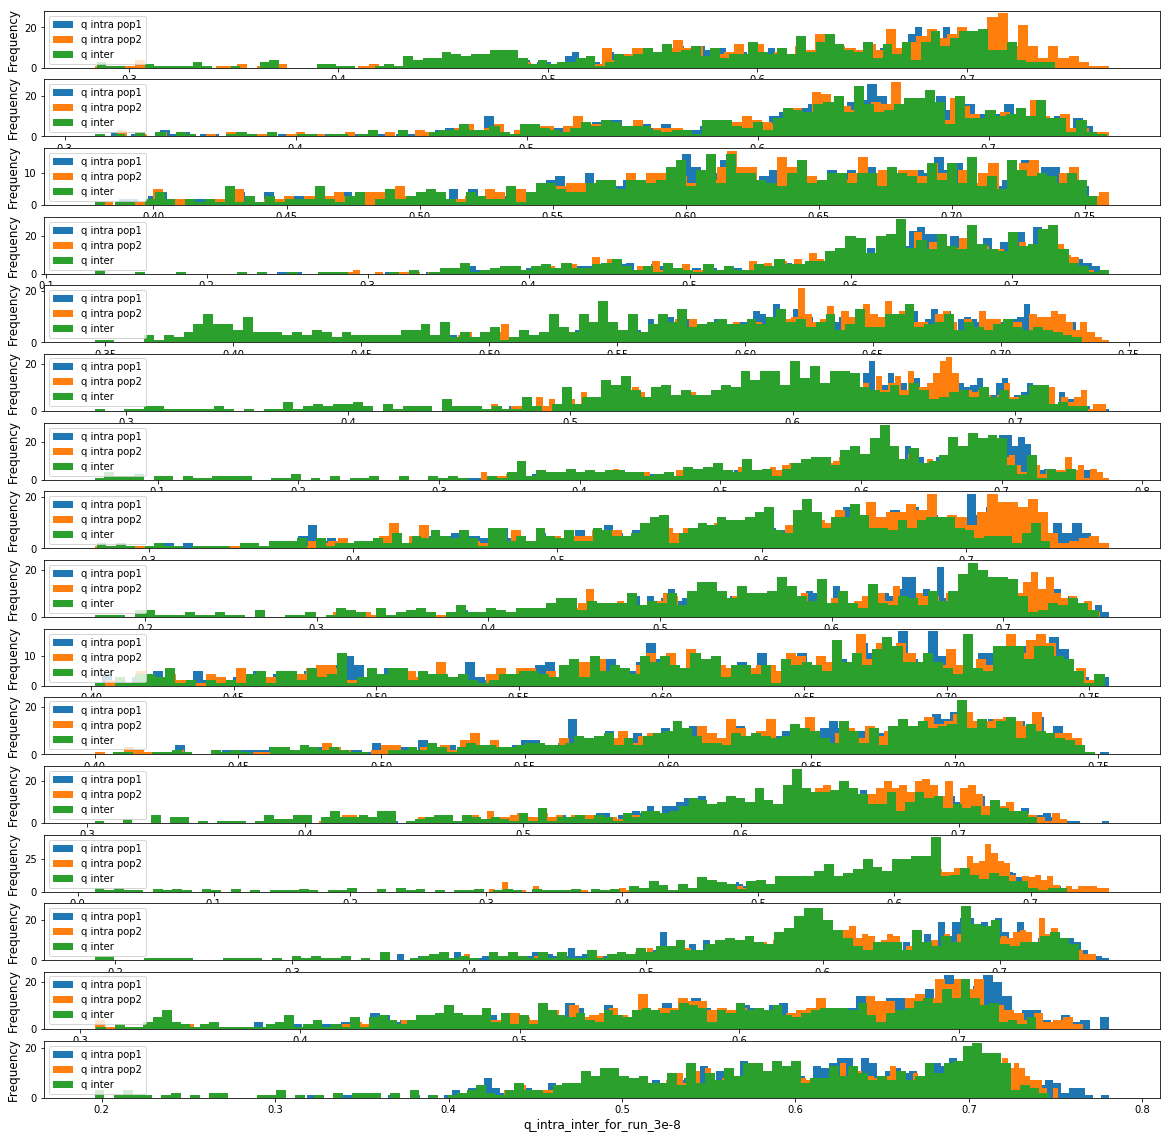

In [15]:
plt.figure(1, figsize=(20,20))
index_line=1
list_namefile,dico_file_inter,dico_file_1_inter,dico_file_2_inter=dico_data_mig("analyses/scaling_M_5/","Generation_number","q_inter", "trace",0,0)
list_namefile,dico_file_intra,dico_file_1_intra,dico_file_2_intra=dico_data_mig("analyses/scaling_M_5/","Generation_number","q_intra", "trace",0,0)
#print(dico_file_1_intra.keys())
for i in list_namefile :
    #print(i)
    plt.subplot(len(list_namefile),1,index_line)
    #if i+"_x_params" in dico_file_intra and i+"_y_params" in dico_file_intra:
        #plt.plot(dico_file_intra[i+"_x_params"],dico_file_intra[i+"_y_params"],'.',label="q intra before mig")
    #plt.plot(dico_file_1_intra[i+"_x_params"],dico_file_1_intra[i+"_y_params"],'.',label="q intra pop1")
    #plt.plot(dico_file_2_intra[i+"_x_params"],dico_file_2_intra[i+"_y_params"],'.',label="q intra pop2")
    #plt.plot(dico_file_1_inter[i+"_x_params"],dico_file_1_inter[i+"_y_params"],'.',label="q inter")
    #df_trace_1 = pd.DataFrame(trace1,index = trace1["M"])
    #df_trace_1.sort_values(by = "M", inplace = True)
    #df_trace_2 = pd.DataFrame(trace2,index = trace2["M"])
    #df_trace_2.sort_values(by = "M", inplace = True)
    plt.hist(dico_file_1_intra[i+"_y_params"], bins = 100,label="q intra pop1")
    plt.hist(dico_file_2_intra[i+"_y_params"], bins = 100,label="q intra pop2")
    plt.hist(dico_file_1_inter[i+"_y_params"], bins = 100,label="q inter")
    plt.ylabel("Frequency", fontsize = 12)
    plt.xlabel("q_intra_inter"+"_for_run_"+i, fontsize = 12)
    plt.legend()
    index_line=index_line+1

# Succession

moy intra 0.594328152167
moy hyb 0.4763086792
diffmoy 0.118019472967
diffpourcent 19.8576279008
moy intra 0.9575345
moy hyb 0.904292333333
diffmoy 0.0532421666667
diffpourcent 5.56033925322


Text(-0.07,6000,'B')

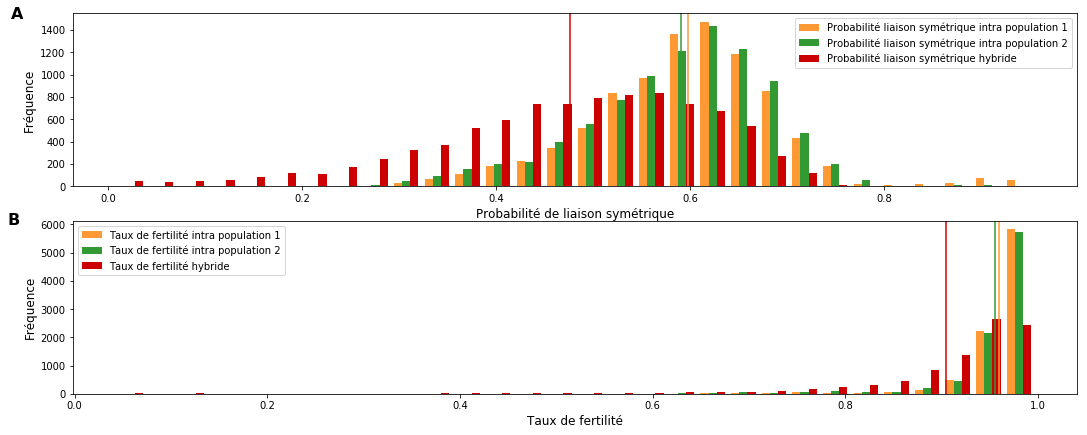

In [733]:
figure=plt.figure(1, figsize=(18,7))
#figure.suptitle("Histogramme des liaisons symétriques et fertilités hybrides et intra-populationnelles en régime de succession",fontsize=18,fontweight="bold")
#figure.subplots_adjust(top=0.9)
#print(dico_file_1_intra.keys())
filenb="0"
list_namefile,dico_file_inter,dico_file_1_inter,dico_file_2_inter=dico_data_mig("meiosis/analyses/scaling_M_11/","Generation_number","q_inter", "trace",0,0)
list_namefile,dico_file_intra,dico_file_1_intra,dico_file_2_intra=dico_data_mig("meiosis/analyses/scaling_M_11/","Generation_number","q_intra", "trace",0,0)
#plt.hist(dico_file_1_intra[filenb+"_y_params"], bins = 200,label="q intra pop1")
#plt.hist(dico_file_2_intra[filenb+"_y_params"], bins = 200,label="q intra pop2")
#plt.hist(dico_file_1_inter[filenb+"_y_params"], bins = 200,label="q inter")
plt.subplot(2,1,1)
plt.hist([dico_file_1_intra[filenb+"_y_params"],dico_file_2_intra[filenb+"_y_params"],dico_file_1_inter[filenb+"_y_params"]],bins=30,label=["Probabilité liaison symétrique intra population 1","Probabilité liaison symétrique intra population 2","Probabilité liaison symétrique hybride"],color=["#FF9933","#339933","#CC0000"])
plt.axvline(x=np.mean(dico_file_1_intra[filenb+"_y_params"]), color='#FF9933')
plt.axvline(x=np.mean(dico_file_2_intra[filenb+"_y_params"]), color='#339933')
plt.axvline(x=np.mean(dico_file_1_inter[filenb+"_y_params"]), color='#CC0000')
moyint=np.mean([float(np.mean(dico_file_1_intra[filenb+"_y_params"])),float(np.mean(dico_file_2_intra[filenb+"_y_params"]))])
print("moy intra",moyint)
moyhyb=np.mean(dico_file_1_inter[filenb+"_y_params"])
print("moy hyb",moyhyb)
diffmoy=moyint-moyhyb
print("diffmoy",diffmoy)
diffpourcent=100*(diffmoy/moyint)
print("diffpourcent",diffpourcent)
#print(np.mean([float(np.mean(dico_file_1_intra[filenb+"_y_params"])),float(np.mean(dico_file_2_intra[filenb+"_y_params"]))])-np.mean(dico_file_1_inter[filenb+"_y_params"]))
plt.ylabel("Fréquence", fontsize = 12)
plt.xlabel("Probabilité de liaison symétrique", fontsize = 12)
plt.legend()
plt.text(x=-0.1,y=1500,s="A",fontweight='bold',fontsize=16)


list_namefile,dico_file_inter,dico_file_1_inter,dico_file_2_inter=dico_data_mig("meiosis/analyses/scaling_M_11/","Generation_number","fertility_inter", "trace",0,0)
list_namefile,dico_file_intra,dico_file_1_intra,dico_file_2_intra=dico_data_mig("meiosis/analyses/scaling_M_11/","Generation_number","fertility_intra", "trace",0,0)
plt.subplot(2,1,2)
plt.hist([dico_file_1_intra[filenb+"_y_params"],dico_file_2_intra[filenb+"_y_params"],dico_file_1_inter[filenb+"_y_params"]],bins=30,label=["Taux de fertilité intra population 1","Taux de fertilité intra population 2","Taux de fertilité hybride"],color=["#FF9933","#339933","#CC0000"])
plt.axvline(x=np.mean(dico_file_1_intra[filenb+"_y_params"]), color='#FF9933')
plt.axvline(x=np.mean(dico_file_2_intra[filenb+"_y_params"]), color='#339933')
plt.axvline(x=np.mean(dico_file_1_inter[filenb+"_y_params"]), color='#CC0000')
moyint=np.mean([float(np.mean(dico_file_1_intra[filenb+"_y_params"])),float(np.mean(dico_file_2_intra[filenb+"_y_params"]))])
print("moy intra",moyint)
moyhyb=np.mean(dico_file_1_inter[filenb+"_y_params"])
print("moy hyb",moyhyb)
diffmoy=moyint-moyhyb
print("diffmoy",diffmoy)
diffpourcent=100*(diffmoy/moyint)
print("diffpourcent",diffpourcent)
#print(np.mean([float(np.mean(dico_file_1_intra[filenb+"_y_params"])),float(np.mean(dico_file_2_intra[filenb+"_y_params"]))])-np.mean(dico_file_1_inter[filenb+"_y_params"]))
plt.ylabel("Fréquence", fontsize = 12)
plt.xlabel("Taux de fertilité", fontsize = 12)
plt.legend()
plt.text(x=-0.07,y=6000,s="B",fontweight='bold',fontsize=16)

# Polymorphe

moy intra 0.652323085
moy hyb 0.614700000667
diffmoy 0.0376230843333
diffpourcent 5.76755371663
moy intra 0.979172666667
moy hyb 0.970744222222
diffmoy 0.00842844444444
diffpourcent 0.860772030447


Text(0.867,2300,'B')

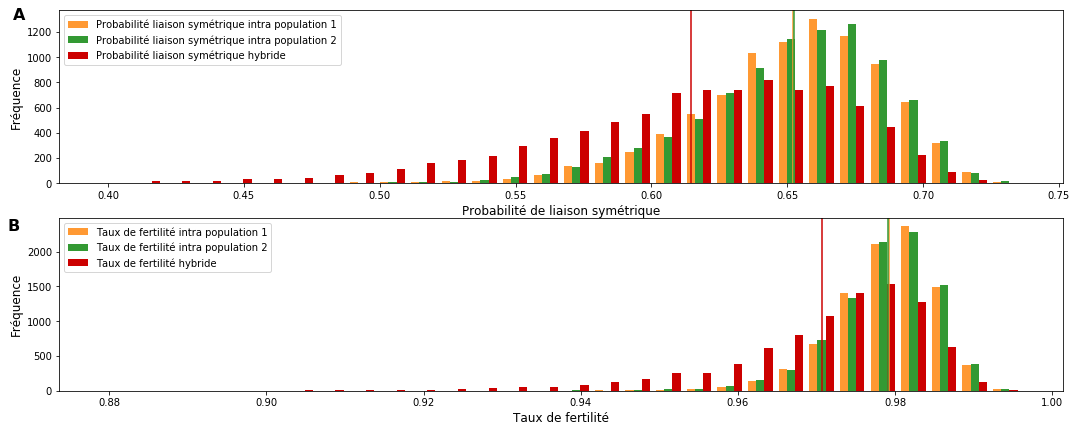

In [23]:
figure=plt.figure(1, figsize=(18,7))
#figure.suptitle("Histogramme des liaisons symétriques et fertilités hybrides et intra-populationnelles en régime polymorphe",fontsize=18,fontweight="bold")
#figure.subplots_adjust(top=0.9)
#print(dico_file_1_intra.keys())
filenb="0"
list_namefile,dico_file_inter,dico_file_1_inter,dico_file_2_inter=dico_data_mig("meiosis/analyses/scaling_M_10/","Generation_number","q_inter", "trace",0,0)
list_namefile,dico_file_intra,dico_file_1_intra,dico_file_2_intra=dico_data_mig("meiosis/analyses/scaling_M_10/","Generation_number","q_intra", "trace",0,0)
#plt.hist(dico_file_1_intra[filenb+"_y_params"], bins = 200,label="q intra pop1")
#plt.hist(dico_file_2_intra[filenb+"_y_params"], bins = 200,label="q intra pop2")
#plt.hist(dico_file_1_inter[filenb+"_y_params"], bins = 200,label="q inter")
plt.subplot(2,1,1)
plt.hist([dico_file_1_intra[filenb+"_y_params"],dico_file_2_intra[filenb+"_y_params"],dico_file_1_inter[filenb+"_y_params"]],bins=30,label=["Probabilité liaison symétrique intra population 1","Probabilité liaison symétrique intra population 2","Probabilité liaison symétrique hybride"],color=["#FF9933","#339933","#CC0000"])
plt.axvline(x=np.mean(dico_file_1_intra[filenb+"_y_params"]), color='#FF9933')
plt.axvline(x=np.mean(dico_file_2_intra[filenb+"_y_params"]), color='#339933')
plt.axvline(x=np.mean(dico_file_1_inter[filenb+"_y_params"]), color='#CC0000')
moyint=np.mean([float(np.mean(dico_file_1_intra[filenb+"_y_params"])),float(np.mean(dico_file_2_intra[filenb+"_y_params"]))])
print("moy intra",moyint)
moyhyb=np.mean(dico_file_1_inter[filenb+"_y_params"])
print("moy hyb",moyhyb)
diffmoy=moyint-moyhyb
print("diffmoy",diffmoy)
diffpourcent=100*(diffmoy/moyint)
print("diffpourcent",diffpourcent)
#print(np.mean([float(np.mean(dico_file_1_intra[filenb+"_y_params"])),float(np.mean(dico_file_2_intra[filenb+"_y_params"]))])-np.mean(dico_file_1_inter[filenb+"_y_params"]))
plt.ylabel("Fréquence", fontsize = 12)
plt.xlabel("Probabilité de liaison symétrique", fontsize = 12)
plt.legend()
plt.text(x=0.365,y=1300,s="A",fontweight='bold',fontsize=16)


list_namefile,dico_file_inter,dico_file_1_inter,dico_file_2_inter=dico_data_mig("meiosis/analyses/scaling_M_10/","Generation_number","fertility_inter", "trace",0,0)
list_namefile,dico_file_intra,dico_file_1_intra,dico_file_2_intra=dico_data_mig("meiosis/analyses/scaling_M_10/","Generation_number","fertility_intra", "trace",0,0)
plt.subplot(2,1,2)
plt.hist([dico_file_1_intra[filenb+"_y_params"],dico_file_2_intra[filenb+"_y_params"],dico_file_1_inter[filenb+"_y_params"]],bins=30,label=["Taux de fertilité intra population 1","Taux de fertilité intra population 2","Taux de fertilité hybride"],color=["#FF9933","#339933","#CC0000"])
plt.axvline(x=np.mean(dico_file_1_intra[filenb+"_y_params"]), color='#FF9933')
plt.axvline(x=np.mean(dico_file_2_intra[filenb+"_y_params"]), color='#339933')
plt.axvline(x=np.mean(dico_file_1_inter[filenb+"_y_params"]), color='#CC0000')
moyint=np.mean([float(np.mean(dico_file_1_intra[filenb+"_y_params"])),float(np.mean(dico_file_2_intra[filenb+"_y_params"]))])
print("moy intra",moyint)
moyhyb=np.mean(dico_file_1_inter[filenb+"_y_params"])
print("moy hyb",moyhyb)
diffmoy=moyint-moyhyb
print("diffmoy",diffmoy)
diffpourcent=100*(diffmoy/moyint)
print("diffpourcent",diffpourcent)
#print(np.mean([float(np.mean(dico_file_1_intra[filenb+"_y_params"])),float(np.mean(dico_file_2_intra[filenb+"_y_params"]))])-np.mean(dico_file_1_inter[filenb+"_y_params"]))
plt.ylabel("Fréquence", fontsize = 12)
plt.xlabel("Taux de fertilité", fontsize = 12)
plt.legend()
plt.text(x=0.867,y=2300,s="B",fontweight='bold',fontsize=16)

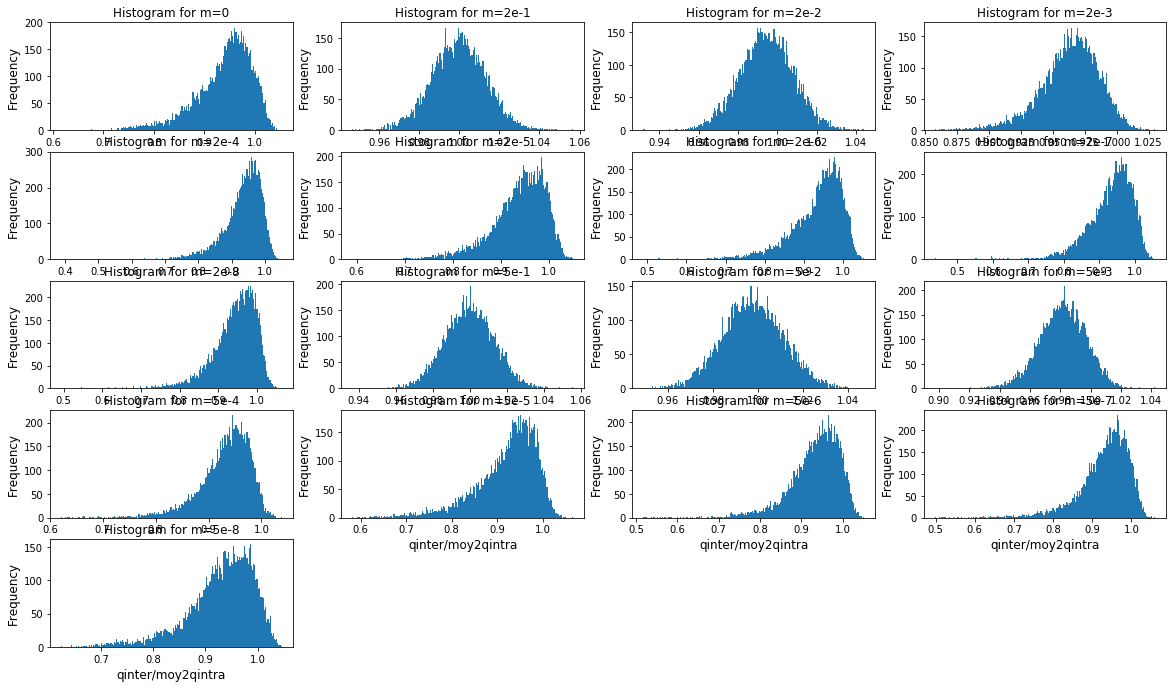

In [572]:
plt.figure(1, figsize=(20,40))
index_line=1
list_namefile,dico_file_inter,dico_file_1_inter,dico_file_2_inter=dico_data_mig("analyses/scaling_M_8/","Generation_number","q_inter", "trace",0,0)
list_namefile,dico_file_intra,dico_file_1_intra,dico_file_2_intra=dico_data_mig("analyses/scaling_M_8/","Generation_number","q_intra", "trace",0,0)
#print(dico_file_1_intra.keys())
for i in list_namefile :
    qinterovermoyqintra=[]
    for j in range(len(dico_file_1_inter[i+"_y_params"])):
        qinterovermoyqintra.append(dico_file_1_inter[i+"_y_params"][j]/((dico_file_1_intra[i+"_y_params"][j]+dico_file_2_intra[i+"_y_params"][j])/2))
    plt.subplot(len(list_namefile),4,index_line)
    plt.hist(qinterovermoyqintra, bins = 200)
    plt.ylabel("Frequency", fontsize = 12)
    plt.xlabel("qinter/moy2qintra", fontsize = 12)
    plt.title("Histogram for m="+i,fontsize=12)
    index_line+=1

Text(0.5,1,'Histogram of values of qinter/mean(qintra1,qintra2) for m=0')

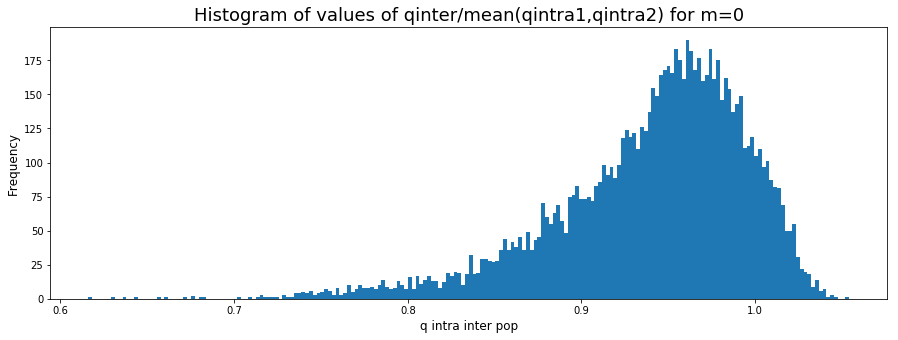

In [57]:
#hist qinter/moy 2 qintra
qinterovermoyqintra=[]
filenb="0"
list_namefile,dico_file_inter,dico_file_1_inter,dico_file_2_inter=dico_data_mig("analyses/scaling_M_8/","Generation_number","q_inter", "trace",0,0)
list_namefile,dico_file_intra,dico_file_1_intra,dico_file_2_intra=dico_data_mig("analyses/scaling_M_8/","Generation_number","q_intra", "trace",0,0)
for i in range(len(dico_file_1_inter[filenb+"_y_params"])):
    qinterovermoyqintra.append(dico_file_1_inter[filenb+"_y_params"][i]/((dico_file_1_intra[filenb+"_y_params"][i]+dico_file_2_intra[filenb+"_y_params"][i])/2))
plt.figure(1, figsize=(15,5))
plt.hist(qinterovermoyqintra, bins = 200)
plt.ylabel("Frequency", fontsize = 12)
plt.xlabel("q intra inter pop", fontsize = 12)
plt.title("Histogram of values of qinter/mean(qintra1,qintra2) for m=0",fontsize=18)

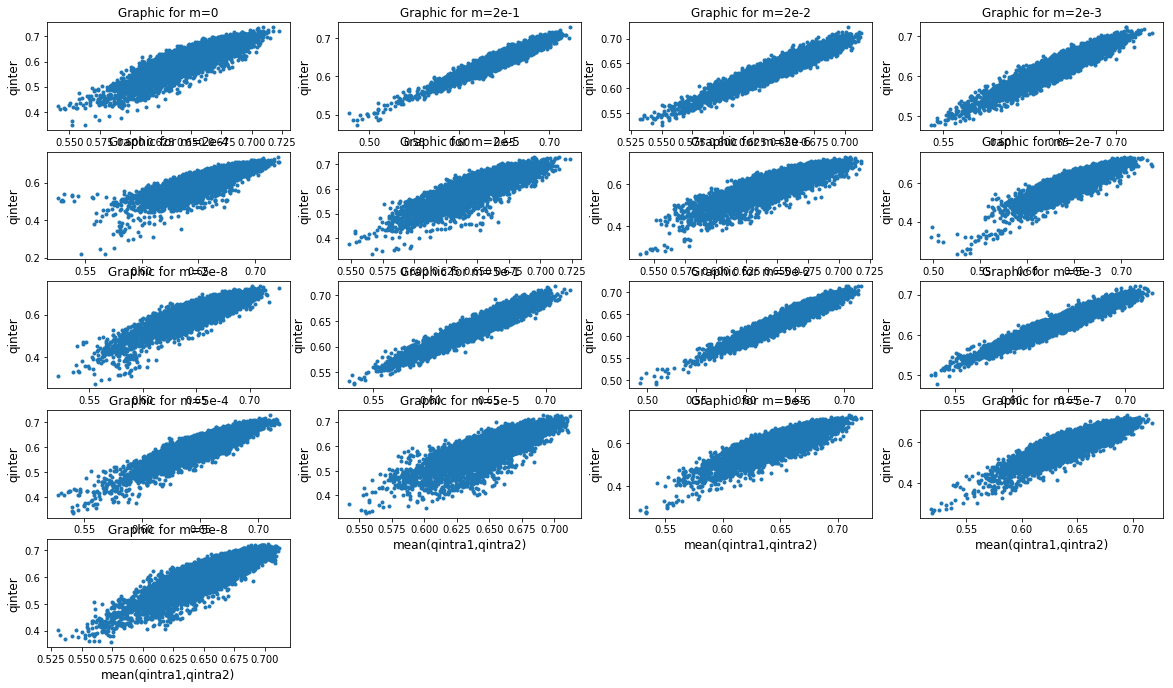

In [58]:
plt.figure(1, figsize=(20,40))
index_line=1
list_namefile,dico_file_inter,dico_file_1_inter,dico_file_2_inter=dico_data_mig("analyses/scaling_M_8/","Generation_number","q_inter", "trace",0,0)
list_namefile,dico_file_intra,dico_file_1_intra,dico_file_2_intra=dico_data_mig("analyses/scaling_M_8/","Generation_number","q_intra", "trace",0,0)
#print(dico_file_1_intra.keys())
for i in list_namefile :
    moyqintra=[]
    for j in range(len(dico_file_1_intra[i+"_y_params"])):
        moyqintra.append((dico_file_1_intra[i+"_y_params"][j]+dico_file_2_intra[i+"_y_params"][j])/2)
    plt.subplot(len(list_namefile),4,index_line)
    plt.plot(moyqintra, dico_file_1_inter[i+"_y_params"],".")
    plt.ylabel("qinter", fontsize = 12)
    plt.xlabel("mean(qintra1,qintra2)", fontsize = 12)
    plt.title("Graphic for m="+i,fontsize=12)
    index_line+=1

Text(0.5,1,'qinter against mean(qintra1,qintra2) for m=0')

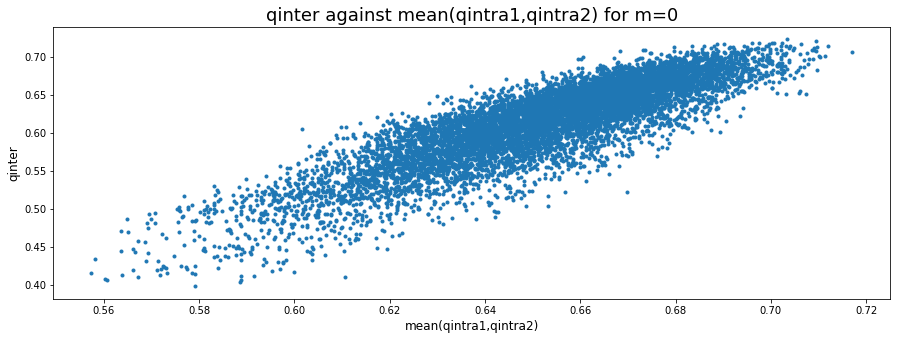

In [29]:
#qinter contre moy q intra
moyqintra=[]
filenb="0"
list_namefile,dico_file_inter,dico_file_1_inter,dico_file_2_inter=dico_data_mig("meiosis/analyses/scaling_M_10/","Generation_number","q_inter", "trace",0,0)
list_namefile,dico_file_intra,dico_file_1_intra,dico_file_2_intra=dico_data_mig("meiosis/analyses/scaling_M_10/","Generation_number","q_intra", "trace",0,0)
for i in range(len(dico_file_1_intra[filenb+"_y_params"])):
    moyqintra.append((dico_file_1_intra[filenb+"_y_params"][i]+dico_file_2_intra[filenb+"_y_params"][i])/2)
plt.figure(1, figsize=(15,5))
plt.plot(moyqintra, dico_file_1_inter[filenb+"_y_params"],".")
plt.ylabel("qinter", fontsize = 12)
plt.xlabel("mean(qintra1,qintra2)", fontsize = 12)
plt.title("qinter against mean(qintra1,qintra2) for m=0",fontsize=18)

Text(0.5,1,'qinter against mean(qintra1,qintra2) for m=0')

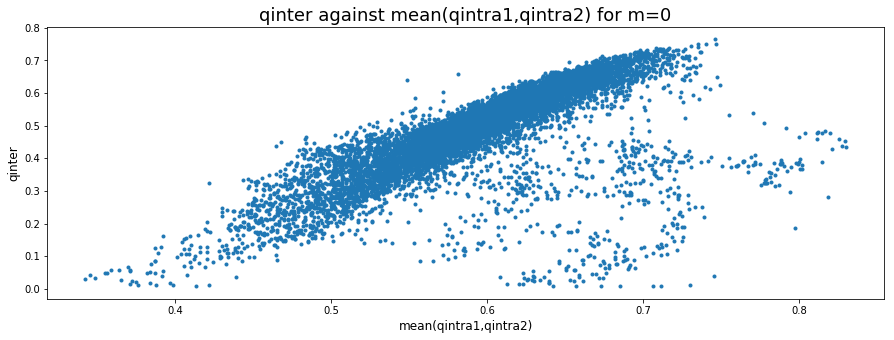

In [30]:
#qinter contre moy q intra
moyqintra=[]
filenb="0"
list_namefile,dico_file_inter,dico_file_1_inter,dico_file_2_inter=dico_data_mig("meiosis/analyses/scaling_M_11/","Generation_number","q_inter", "trace",0,0)
list_namefile,dico_file_intra,dico_file_1_intra,dico_file_2_intra=dico_data_mig("meiosis/analyses/scaling_M_11/","Generation_number","q_intra", "trace",0,0)
for i in range(len(dico_file_1_intra[filenb+"_y_params"])):
    moyqintra.append((dico_file_1_intra[filenb+"_y_params"][i]+dico_file_2_intra[filenb+"_y_params"][i])/2)
plt.figure(1, figsize=(15,5))
plt.plot(moyqintra, dico_file_1_inter[filenb+"_y_params"],".")
plt.ylabel("qinter", fontsize = 12)
plt.xlabel("mean(qintra1,qintra2)", fontsize = 12)
plt.title("qinter against mean(qintra1,qintra2) for m=0",fontsize=18)

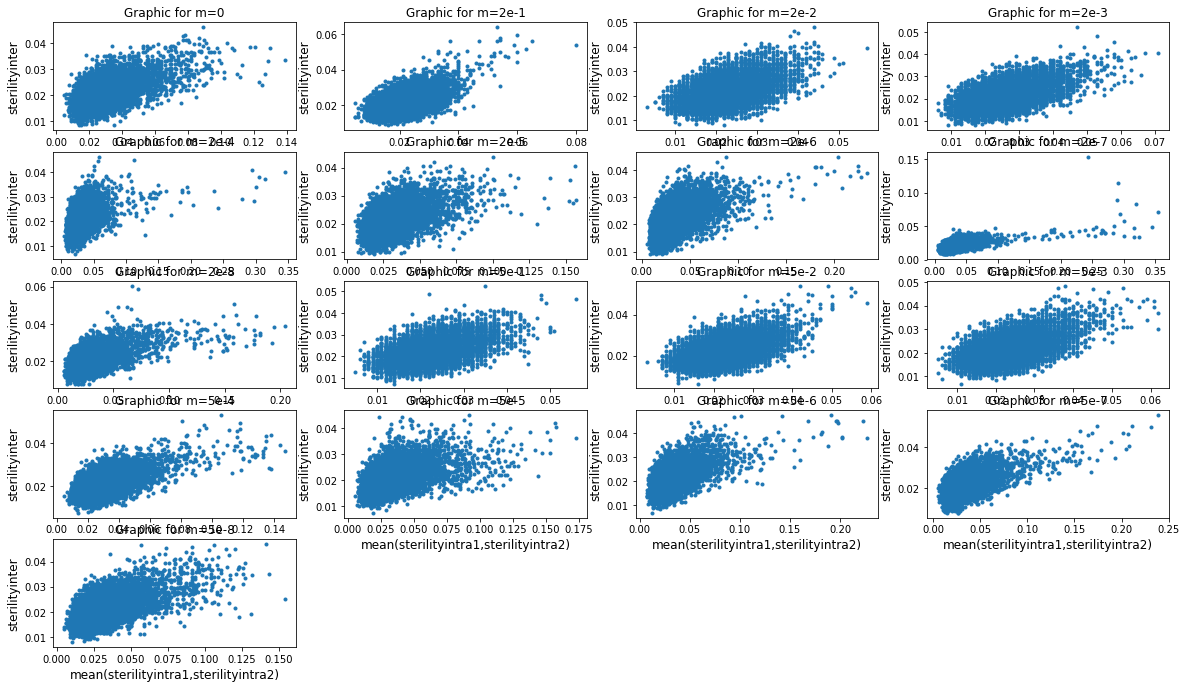

In [17]:
plt.figure(1, figsize=(20,40))
index_line=1
list_namefile,dico_file_inter,dico_file_1_inter,dico_file_2_inter=dico_data_mig("analyses/scaling_M_8/","Generation_number","fertility_inter", "trace",0,0)
list_namefile,dico_file_intra,dico_file_1_intra,dico_file_2_intra=dico_data_mig("analyses/scaling_M_8/","Generation_number","fertility_intra", "trace",0,0)
#print(dico_file_1_intra.keys())
for i in list_namefile :
    moysterilityintra=[]
    sterilityinter=[]
    sterilityintra1=[]
    sterilityintra2=[]
    for j in range(len(dico_file_1_intra[i+"_y_params"])):
        sterilityinter.append(1-dico_file_1_inter[i+"_y_params"][j])
        sterilityintra1.append(1-dico_file_1_intra[i+"_y_params"][j])
        sterilityintra2.append(1-dico_file_2_intra[i+"_y_params"][j])
        moysterilityintra.append((sterilityintra1[j]+sterilityintra2[j])/2)
    plt.subplot(len(list_namefile),4,index_line)
    plt.plot(sterilityinter, moysterilityintra,".")
    plt.ylabel("sterilityinter", fontsize = 12)
    plt.xlabel("mean(sterilityintra1,sterilityintra2)", fontsize = 12)
    plt.title("Graphic for m="+i,fontsize=12)
    index_line+=1

Text(0.5,1,'Graphic for m=0')

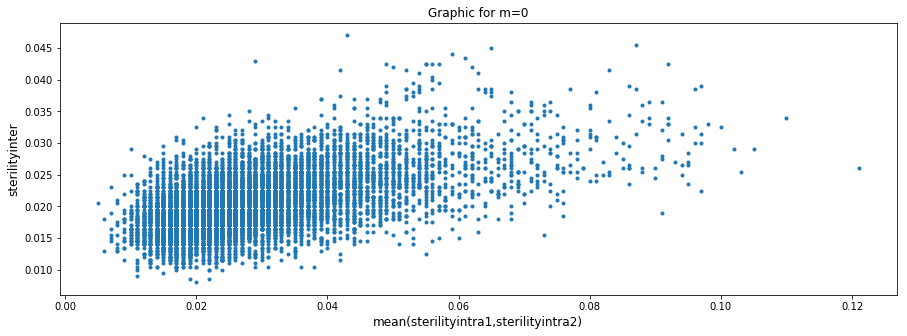

In [28]:
plt.figure(1, figsize=(15,5))
list_namefile,dico_file_inter,dico_file_1_inter,dico_file_2_inter=dico_data_mig("meiosis/analyses/scaling_M_10/","Generation_number","fertility_inter", "trace",0,0)
list_namefile,dico_file_intra,dico_file_1_intra,dico_file_2_intra=dico_data_mig("meiosis/analyses/scaling_M_10/","Generation_number","fertility_intra", "trace",0,0)
filenb="0"
moysterilityintra=[]
sterilityinter=[]
sterilityintra1=[]
sterilityintra2=[]
for j in range(len(dico_file_1_intra[filenb+"_y_params"])):
    sterilityinter.append(1-dico_file_1_inter[filenb+"_y_params"][j])
    sterilityintra1.append(1-dico_file_1_intra[filenb+"_y_params"][j])
    sterilityintra2.append(1-dico_file_2_intra[filenb+"_y_params"][j])
    moysterilityintra.append((sterilityintra1[j]+sterilityintra2[j])/2)
plt.plot(sterilityinter, moysterilityintra,".")
plt.ylabel("sterilityinter", fontsize = 12)
plt.xlabel("mean(sterilityintra1,sterilityintra2)", fontsize = 12)
plt.title("Graphic for m="+filenb,fontsize=12)

Text(0.5,1,'Graphic for m=0')

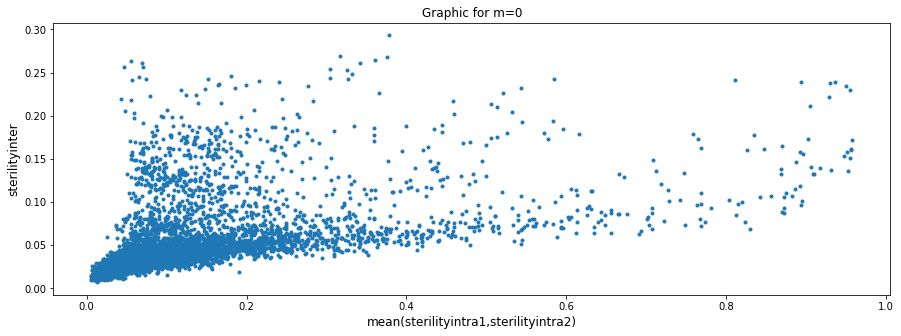

In [27]:
plt.figure(1, figsize=(15,5))
list_namefile,dico_file_inter,dico_file_1_inter,dico_file_2_inter=dico_data_mig("meiosis/analyses/scaling_M_11/","Generation_number","fertility_inter", "trace",0,0)
list_namefile,dico_file_intra,dico_file_1_intra,dico_file_2_intra=dico_data_mig("meiosis/analyses/scaling_M_11/","Generation_number","fertility_intra", "trace",0,0)
filenb="0"
moysterilityintra=[]
sterilityinter=[]
sterilityintra1=[]
sterilityintra2=[]
for j in range(len(dico_file_1_intra[filenb+"_y_params"])):
    sterilityinter.append(1-dico_file_1_inter[filenb+"_y_params"][j])
    sterilityintra1.append(1-dico_file_1_intra[filenb+"_y_params"][j])
    sterilityintra2.append(1-dico_file_2_intra[filenb+"_y_params"][j])
    moysterilityintra.append((sterilityintra1[j]+sterilityintra2[j])/2)
plt.plot(sterilityinter, moysterilityintra,".")
plt.ylabel("sterilityinter", fontsize = 12)
plt.xlabel("mean(sterilityintra1,sterilityintra2)", fontsize = 12)
plt.title("Graphic for m="+filenb,fontsize=12)

# Analytical Model

### Initial parameters

In [337]:
N=200
u=5e-3
v=5e-5
h=400
d=6

### Diversity

In [338]:
U=[2e-2,5e-3,2e-3,5e-4,2e-4,5e-5,2e-5,5e-6,2e-6,5e-7,2e-7,5e-8,2e-8]
D=[]
for i in U :
    D.append(max(1,24*N*i))

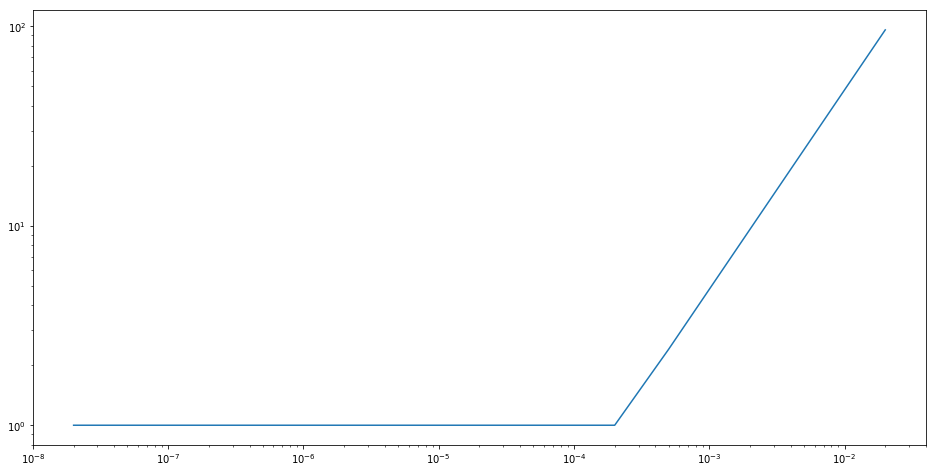

In [339]:
plt.figure(1, figsize=(16,8))
plt.plot(U,D)
plt.xscale('log')
plt.yscale('log')

[0.02, 0.002, 0.0002, 2e-05, 2e-06, 0.05, 0.005, 0.0005, 5e-05, 5e-06]


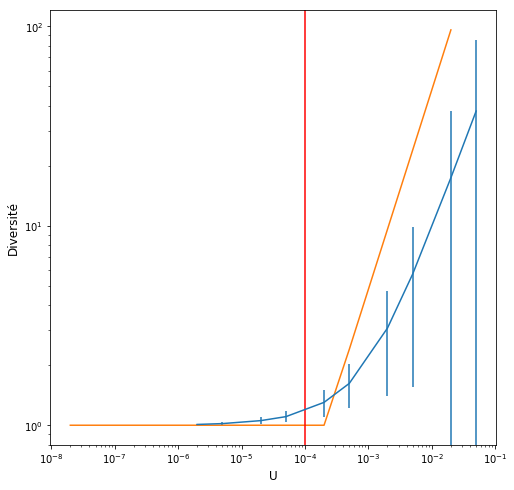

In [342]:
#(allele,trace)=readscalingexperiment(target_folder_path="analyses/scaling_U_10/" , scaling_param_name="U", param_names_allele=["Generation_number","Allele_number","Frequency","Activity","Age","q_allele","Fertility_allele","mean_affinity"], param_names_trace=["Generation_number","Total_number_of_allele","Diversity","Activity","Mean_Age","Time","Fertility_rate","2_DSB_on_one_site_rate","No_DSB_rate","No_symmetrical_sites_rate","q","q_intra","fertility_intra"],withoutneutral=0,init_line=100)
(allele,trace)=readscalingexperiment(target_folder_path="analyses/scaling_U_14/" , scaling_param_name="U", param_names_allele=["Generation_number","Allele_number","Frequency","Activity","Age","q_allele","Fertility_allele","mean_affinity","q_analytic","fertility_analytic"], param_names_trace=["Generation_number","Total_number_of_allele","Diversity","Activity","Mean_Age","Time","Fertility_rate","2_DSB_on_one_site_rate","No_DSB_rate","No_symmetrical_sites_rate","q","q_intra","fertility_intra","q_analytic","fertility_analytic","q_sym"],withoutneutral=0,init_line=100)
scaling_param_name="U"
print(trace[scaling_param_name])
param_to_plot="Diversity"
paramname="Diversité"

cletodelete=[]
for cle in trace:
    if len(trace[cle])==0:
        cletodelete.append(cle)
for cle in cletodelete:
    del trace[cle]
df_trace = pd.DataFrame(trace,index = trace["U"])
df_trace.sort_values(by = "U", inplace = True)

plt.figure(1, figsize=(8,8))
#plt.errorbar(trace[scaling_param_name][0:4], trace[param_to_plot+'_mean'][0:4], trace[param_to_plot+'_variance'][0:4])
plt.errorbar(df_trace[scaling_param_name], df_trace[param_to_plot+'_mean'], df_trace[param_to_plot+'_variance'])
plt.plot(U,D)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(paramname, fontsize = 12)
plt.xlabel(scaling_param_name, fontsize = 12)
plt.axvline(x=1e-4,color="red")
maxval=[]
#for i in range(len(trace[param_to_plot+'_mean'][0:4])):
#    maxval.append(trace[param_to_plot+'_mean'][0:4][i]+trace[param_to_plot+'_variance'][0:4][i])
#for i in range(len(df_trace[param_to_plot+'_mean'])):
#    maxval.append(df_trace[param_to_plot+'_mean'][i]+df_trace[param_to_plot+'_variance'][i])
#ytext=np.max(maxval)

In [344]:
V=[2e-2,5e-3,2e-3,5e-4,2e-4,5e-5,2e-5,5e-6,2e-6,5e-7,2e-7,5e-8,2e-8]
D=[]
for i in V :
    D.append(max(1,24*N*u))

[0.002, 0.0002, 2e-05, 2e-06, 0.005, 0.0005, 5e-05, 5e-06]


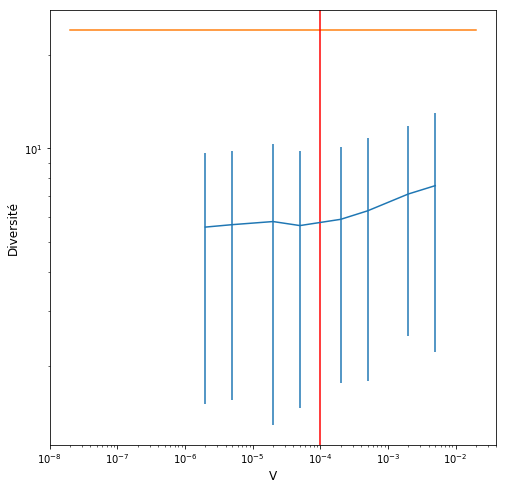

In [345]:
#(allele,trace)=readscalingexperiment(target_folder_path="analyses/scaling_V_10/" , scaling_param_name="V", param_names_allele=["Generation_number","Allele_number","Frequency","Activity","Age","q_allele","Fertility_allele","mean_affinity"], param_names_trace=["Generation_number","Total_number_of_allele","Diversity","Activity","Mean_Age","Time","Fertility_rate","2_DSB_on_one_site_rate","No_DSB_rate","No_symmetrical_sites_rate","q","q_intra","fertility_intra"],withoutneutral=0,init_line=101)
(allele,trace)=readscalingexperiment(target_folder_path="analyses/scaling_V_14/" , scaling_param_name="V", param_names_allele=["Generation_number","Allele_number","Frequency","Activity","Age","q_allele","Fertility_allele","mean_affinity","q_analytic","fertility_analytic"], param_names_trace=["Generation_number","Total_number_of_allele","Diversity","Activity","Mean_Age","Time","Fertility_rate","2_DSB_on_one_site_rate","No_DSB_rate","No_symmetrical_sites_rate","q","q_intra","fertility_intra","q_analytic","fertility_analytic","q_sym"],withoutneutral=0,init_line=100)
scaling_param_name="V"
print(trace[scaling_param_name])
param_to_plot="Diversity"
paramname="Diversité"

plt.figure(1, figsize=(8,8))

cletodelete=[]
for cle in trace:
    if len(trace[cle])==0:
        cletodelete.append(cle)
for cle in cletodelete:
    del trace[cle]
df_trace = pd.DataFrame(trace,index = trace["V"])
df_trace.sort_values(by = "V", inplace = True)
plt.errorbar(df_trace[scaling_param_name], df_trace[param_to_plot+'_mean'], df_trace[param_to_plot+'_variance'])

#plt.errorbar(trace[scaling_param_name][0:5], trace[param_to_plot+'_mean'][0:5], trace[param_to_plot+'_variance'][0:5])
plt.plot(V,D)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(paramname, fontsize = 12)
plt.xlabel(scaling_param_name, fontsize = 12)
plt.axvline(x=1e-4,color="red")
maxval=[]
#for i in range(len(trace[param_to_plot+'_mean'][0:5])):
#    maxval.append(trace[param_to_plot+'_mean'][0:5][i]+trace[param_to_plot+'_variance'][0:5][i])
#ytext=np.max(maxval)

### z_bar

In [346]:
a=1
quantile=[1/16,3/16,5/16,7/16,9/16,11/16,13/16,15/16]
gamma_quantile=[]
for i in quantile:
    gamma_quantile.append(gamma.ppf(i, a, loc=0, scale=0.6))
print(gamma_quantile)

[0.0387231126825427, 0.12458361886694674, 0.22481606966484635, 0.34521848694213703, 0.49600714391068074, 0.69789048588340852, 1.0043858601430027, 1.6635532333438687]


In [347]:
def simpson(f, a, b, n):
    pas = (b - a) / n
    somme = (f(a) + f(b)) / 2 + 2 * f(a + pas / 2)  # On initialise la somme
    x = a + pas           # La somme commence à x_1 
    for i in range(1, n): # On calcule la somme 
        somme += f(x) + 2 * f(x + pas / 2)
        x += pas
    return somme * pas / 3   # On retourne cette somme fois le pas / 3  

In [348]:
simpson(np.cos, 0, np.pi, 100)

-1.2184287286376822e-15

In [349]:
c=1
#c=2
coeff_gamma=0.6
def gamma_func(aff):
    integral=1/coeff_gamma*np.exp(-aff*1/coeff_gamma)
    return integral

def x_0_func(aff):
    integral=(c*aff)/(1+c*aff)*gamma_func(aff)
    return integral
def x2_0_func(aff):
    integral=((c*aff)/(1+c*aff))**2*gamma_func(aff)
    return integral
def x3_0_func(aff):
    integral=((c*aff)/(1+c*aff))**3*gamma_func(aff)
    return integral
def x4_0_func(aff):
    integral=((c*aff)/(1+c*aff))**4*gamma_func(aff)
    return integral

/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


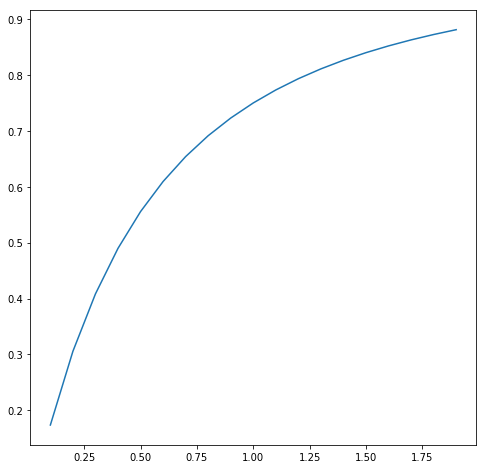

In [350]:
aff=list(range(0,20,1))
for j in range(len(aff)):
    aff[j]=aff[j]/10
myfunclist=[]
for i in aff:
    myfunclist.append((2*x2_0_func(i)-x3_0_func(i))/x_0_func(i))
plt.figure(1, figsize=(8,8))
plt.plot(aff,myfunclist)

In [351]:
#x_0
print(simpson(x_0_func, 0, 5, 100))
#x2_0
print(simpson(x2_0_func, 0, 5, 100))
#x3_0
print(simpson(x3_0_func, 0, 5, 100))
#x4_0
print(simpson(x4_0_func, 0, 5, 100))

0.308570284995
0.131998995562
0.0655656383457
0.0356350484831


In [352]:
integrate.romberg(gamma_func, 0, 5)

0.99975963052876449

In [353]:
x_0=simpson(x_0_func, 0, 10, 100)
x2_0=simpson(x2_0_func, 0, 10, 100)
x3_0=simpson(x3_0_func, 0, 10, 100)
x4_0=simpson(x4_0_func, 0, 10, 100)
q_0=(2*x2_0-x3_0)/(x_0)
beta_0=(-2*x3_0+x4_0+(2*x2_0**2)/(x_0)-(x3_0*x2_0)/(x_0))/(2*x_0**2)
alpha=abs(d*beta_0*np.exp(-d*q_0))
rho=(N*v*d)/(2*h)
mu=4*N*u
z_bar=np.sqrt(rho/(mu*alpha))
print("mu=",mu)
print("rho=",rho)
print("q_0=",q_0)
print("beta=",beta_0)
print("alpha=",alpha)
print("z_bar=",z_bar)

mu= 4.0
rho= 7.5e-05
q_0= 0.643301435158
beta= -0.0557857021433
alpha= 0.00705310863549
z_bar= 0.0515596961685


In [358]:
U=[2e-2,5e-3,2e-3,5e-4,2e-4,5e-5,2e-5,5e-6,2e-6,5e-7,2e-7,5e-8,2e-8]
Z=[]
rho=(N*v*d)/(2*h)
print("rho=",rho)
for i in U :
    mu=4*N*i
    #print("U=",i," ","mu=",mu," ","mu*alpha=",mu*alpha," ","quotient=",rho/(mu*alpha))
    #Z.append(np.sqrt(1/(rho*mu*alpha)))
    Z.append(np.sqrt(rho/(mu*alpha)))
#print(Z)

rho= 7.5e-05


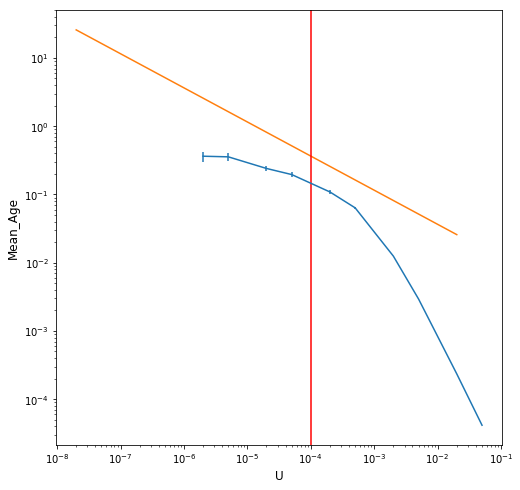

In [359]:
#(allele,trace)=readscalingexperiment(target_folder_path="analyses/scaling_U_10/" , scaling_param_name="U", param_names_allele=["Generation_number","Allele_number","Frequency","Activity","Age","q_allele","Fertility_allele","mean_affinity"], param_names_trace=["Generation_number","Total_number_of_allele","Diversity","Activity","Mean_Age","Time","Fertility_rate","2_DSB_on_one_site_rate","No_DSB_rate","No_symmetrical_sites_rate","q","q_intra","fertility_intra"],withoutneutral=0,init_line=101)
(allele,trace)=readscalingexperiment(target_folder_path="analyses/scaling_U_14/" , scaling_param_name="U", param_names_allele=["Generation_number","Allele_number","Frequency","Activity","Age","q_allele","Fertility_allele","mean_affinity","q_analytic","fertility_analytic"], param_names_trace=["Generation_number","Total_number_of_allele","Diversity","Activity","Mean_Age","Time","Fertility_rate","2_DSB_on_one_site_rate","No_DSB_rate","No_symmetrical_sites_rate","q","q_intra","fertility_intra","q_analytic","fertility_analytic","q_sym"],withoutneutral=0,init_line=100)
scaling_param_name="U"

param_to_plot="Mean_Age"
paramname="Mean_Age"

plt.figure(1, figsize=(8,8))

cletodelete=[]
for cle in trace:
    if len(trace[cle])==0:
        cletodelete.append(cle)
for cle in cletodelete:
    del trace[cle]
df_trace = pd.DataFrame(trace,index = trace["U"])
df_trace.sort_values(by = "U", inplace = True)
plt.errorbar(df_trace[scaling_param_name], df_trace[param_to_plot+'_mean'], df_trace[param_to_plot+'_variance'])

#plt.errorbar(trace[scaling_param_name][0:4], trace[param_to_plot+'_mean'][0:4], trace[param_to_plot+'_variance'][0:4])
plt.plot(U,Z)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(paramname, fontsize = 12)
plt.xlabel(scaling_param_name, fontsize = 12)
plt.axvline(x=1e-4,color="red")
#maxval=[]
#for i in range(len(trace[param_to_plot+'_mean'][0:4])):
#    maxval.append(trace[param_to_plot+'_mean'][0:4][i]+trace[param_to_plot+'_variance'][0:4][i])
#ytext=np.max(maxval)

In [361]:
V=[2e-2,5e-3,2e-3,5e-4,2e-4,5e-5,2e-5,5e-6,2e-6,5e-7,2e-7,5e-8,2e-8]
Z=[]
mu=4*N*u
for i in V :
    rho=(N*i*d)/(2*h)
    #Z.append(np.sqrt(1/(rho*mu*alpha)))
    Z.append(np.sqrt(rho/(mu*alpha)))

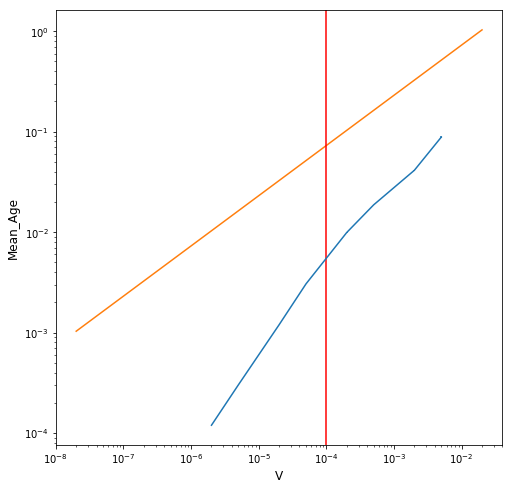

In [362]:
#(allele,trace)=readscalingexperiment(target_folder_path="analyses/scaling_V_10/" , scaling_param_name="V", param_names_allele=["Generation_number","Allele_number","Frequency","Activity","Age","q_allele","Fertility_allele","mean_affinity"], param_names_trace=["Generation_number","Total_number_of_allele","Diversity","Activity","Mean_Age","Time","Fertility_rate","2_DSB_on_one_site_rate","No_DSB_rate","No_symmetrical_sites_rate","q","q_intra","fertility_intra"],withoutneutral=0,init_line=101)
(allele,trace)=readscalingexperiment(target_folder_path="analyses/scaling_V_14/" , scaling_param_name="V", param_names_allele=["Generation_number","Allele_number","Frequency","Activity","Age","q_allele","Fertility_allele","mean_affinity","q_analytic","fertility_analytic"], param_names_trace=["Generation_number","Total_number_of_allele","Diversity","Activity","Mean_Age","Time","Fertility_rate","2_DSB_on_one_site_rate","No_DSB_rate","No_symmetrical_sites_rate","q","q_intra","fertility_intra","q_analytic","fertility_analytic","q_sym"],withoutneutral=0,init_line=100)
scaling_param_name="V"

param_to_plot="Mean_Age"
paramname="Mean_Age"

plt.figure(1, figsize=(8,8))

cletodelete=[]
for cle in trace:
    if len(trace[cle])==0:
        cletodelete.append(cle)
for cle in cletodelete:
    del trace[cle]
df_trace = pd.DataFrame(trace,index = trace["V"])
df_trace.sort_values(by = "V", inplace = True)
plt.errorbar(df_trace[scaling_param_name], df_trace[param_to_plot+'_mean'], df_trace[param_to_plot+'_variance'])

#plt.errorbar(trace[scaling_param_name][0:5], trace[param_to_plot+'_mean'][0:5], trace[param_to_plot+'_variance'][0:5])
plt.plot(V,Z)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(paramname, fontsize = 12)
plt.xlabel(scaling_param_name, fontsize = 12)
plt.axvline(x=1e-4,color="red")
#maxval=[]
#for i in range(len(trace[param_to_plot+'_mean'][0:5])):
#    maxval.append(trace[param_to_plot+'_mean'][0:5][i]+trace[param_to_plot+'_variance'][0:5][i])
#ytext=np.max(maxval)

### theta_bar

In [363]:
U=[2e-2,5e-3,2e-3,5e-4,2e-4,5e-5,2e-5,5e-6,2e-6,5e-7,2e-7,5e-8,2e-8]
T=[]
rho=(N*v*d)/(2*h)
for i in U :
    mu=4*N*i
    T.append(np.exp(-(np.sqrt(rho/(mu*alpha)))))

(0.1, 1)

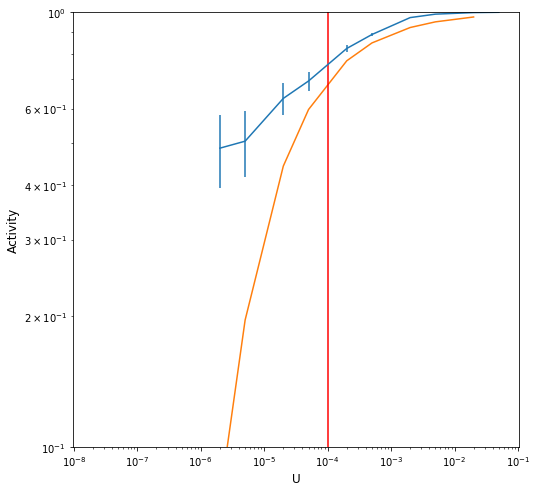

In [364]:
#(allele,trace)=readscalingexperiment(target_folder_path="analyses/scaling_U_10/" , scaling_param_name="U", param_names_allele=["Generation_number","Allele_number","Frequency","Activity","Age","q_allele","Fertility_allele","mean_affinity"], param_names_trace=["Generation_number","Total_number_of_allele","Diversity","Activity","Mean_Age","Time","Fertility_rate","2_DSB_on_one_site_rate","No_DSB_rate","No_symmetrical_sites_rate","q","q_intra","fertility_intra"],withoutneutral=0,init_line=101)
(allele,trace)=readscalingexperiment(target_folder_path="analyses/scaling_U_14/" , scaling_param_name="U", param_names_allele=["Generation_number","Allele_number","Frequency","Activity","Age","q_allele","Fertility_allele","mean_affinity","q_analytic","fertility_analytic"], param_names_trace=["Generation_number","Total_number_of_allele","Diversity","Activity","Mean_Age","Time","Fertility_rate","2_DSB_on_one_site_rate","No_DSB_rate","No_symmetrical_sites_rate","q","q_intra","fertility_intra","q_analytic","fertility_analytic","q_sym"],withoutneutral=0,init_line=100)
scaling_param_name="U"

param_to_plot="Activity"
paramname="Activity"

plt.figure(1, figsize=(8,8))

cletodelete=[]
for cle in trace:
    if len(trace[cle])==0:
        cletodelete.append(cle)
for cle in cletodelete:
    del trace[cle]
df_trace = pd.DataFrame(trace,index = trace["U"])
df_trace.sort_values(by = "U", inplace = True)
plt.errorbar(df_trace[scaling_param_name], df_trace[param_to_plot+'_mean'], df_trace[param_to_plot+'_variance'])

#plt.errorbar(trace[scaling_param_name][0:4], trace[param_to_plot+'_mean'][0:4], trace[param_to_plot+'_variance'][0:4])
plt.plot(U,T)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(paramname, fontsize = 12)
plt.xlabel(scaling_param_name, fontsize = 12)
plt.axvline(x=1e-4,color="red")
#maxval=[]
#for i in range(len(trace[param_to_plot+'_mean'][0:4])):
#    maxval.append(trace[param_to_plot+'_mean'][0:4][i]+trace[param_to_plot+'_variance'][0:4][i])
#ytext=np.max(maxval)
#plt.ylim(min(trace[param_to_plot+'_mean'][0:4]),1)
plt.ylim(1e-1,1)

In [365]:
V=[2e-2,5e-3,2e-3,5e-4,2e-4,5e-5,2e-5,5e-6,2e-6,5e-7,2e-7,5e-8,2e-8]
T=[]
mu=4*N*u
for i in V :
    rho=(N*i*d)/(2*h)
    T.append(np.exp(-(np.sqrt(rho/(mu*alpha)))))

(0.79730349050505045, 1)

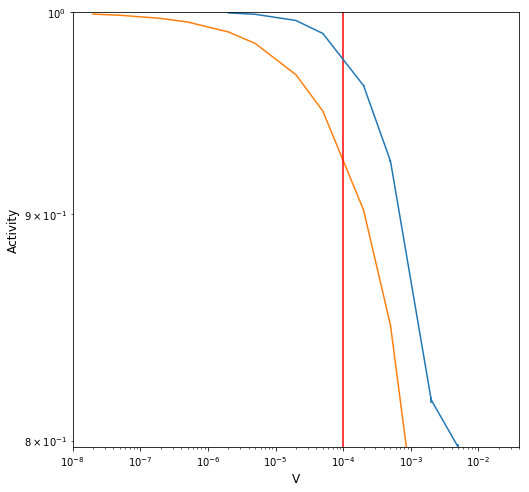

In [366]:
#(allele,trace)=readscalingexperiment(target_folder_path="analyses/scaling_V_10/" , scaling_param_name="V", param_names_allele=["Generation_number","Allele_number","Frequency","Activity","Age","q_allele","Fertility_allele","mean_affinity"], param_names_trace=["Generation_number","Total_number_of_allele","Diversity","Activity","Mean_Age","Time","Fertility_rate","2_DSB_on_one_site_rate","No_DSB_rate","No_symmetrical_sites_rate","q","q_intra","fertility_intra"],withoutneutral=101,init_line=101)
(allele,trace)=readscalingexperiment(target_folder_path="analyses/scaling_V_14/" , scaling_param_name="V", param_names_allele=["Generation_number","Allele_number","Frequency","Activity","Age","q_allele","Fertility_allele","mean_affinity","q_analytic","fertility_analytic"], param_names_trace=["Generation_number","Total_number_of_allele","Diversity","Activity","Mean_Age","Time","Fertility_rate","2_DSB_on_one_site_rate","No_DSB_rate","No_symmetrical_sites_rate","q","q_intra","fertility_intra","q_analytic","fertility_analytic","q_sym"],withoutneutral=0,init_line=100)
scaling_param_name="V"

param_to_plot="Activity"
paramname="Activity"

plt.figure(1, figsize=(8,8))

cletodelete=[]
for cle in trace:
    if len(trace[cle])==0:
        cletodelete.append(cle)
for cle in cletodelete:
    del trace[cle]
df_trace = pd.DataFrame(trace,index = trace["V"])
df_trace.sort_values(by = "V", inplace = True)
plt.errorbar(df_trace[scaling_param_name], df_trace[param_to_plot+'_mean'], df_trace[param_to_plot+'_variance'])

#plt.errorbar(trace[scaling_param_name][0:5], trace[param_to_plot+'_mean'][0:5], trace[param_to_plot+'_variance'][0:5])
plt.plot(V,T)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(paramname, fontsize = 12)
plt.xlabel(scaling_param_name, fontsize = 12)
plt.axvline(x=1e-4,color="red")
#maxval=[]
#for i in range(len(trace[param_to_plot+'_mean'][0:5])):
#    maxval.append(trace[param_to_plot+'_mean'][0:5][i]+trace[param_to_plot+'_variance'][0:5][i])
#ytext=np.max(maxval)
plt.ylim(min(trace[param_to_plot+'_mean'][0:5]),1)

### Q_bar

In [367]:
c=1
#c=2
def x_bar_func(aff):
    integral=(c*aff)/(1+c*aff)*1/0.6*np.exp(-aff*1/0.6)*(1-((c*aff)/(1+c*aff))/(x_0)*z_bar)
    return integral
def x2_bar_func(aff):
    integral=((c*aff)/(1+c*aff))**2*1/0.6*np.exp(-aff*1/0.6)*(1-((c*aff)/(1+c*aff))/(x_0)*z_bar)
    return integral
def x3_bar_func(aff):
    integral=((c*aff)/(1+c*aff))**3*1/0.6*np.exp(-aff*1/0.6)*(1-((c*aff)/(1+c*aff))/(x_0)*z_bar)
    return integral

In [368]:
U=[2e-2,5e-3,2e-3,5e-4,2e-4,5e-5,2e-5,5e-6,2e-6,5e-7,2e-7,5e-8,2e-8]
Q=[]
X1=[]
X2=[]
X3=[]
rho=(N*v*d)/(2*h)
for i in U :
    mu=4*N*i
    z_bar=np.sqrt(rho/(mu*alpha))
    #print("z_bar : ",z_bar)
    x_bar=simpson(x_bar_func, 0, 10, 100)
    X1.append(x_bar)
    #print("x_bar : ",x_bar)
    x2_bar=simpson(x2_bar_func, 0, 10, 100)
    X2.append(x2_bar)
    #print("x2_bar : ",x2_bar)
    x3_bar=simpson(x3_bar_func, 0, 10, 100)
    X3.append(x3_bar)
    #print("x3_bar : ",x3_bar)
    Q.append((2*x2_bar-x3_bar)/(x_bar))
    #print(Q)

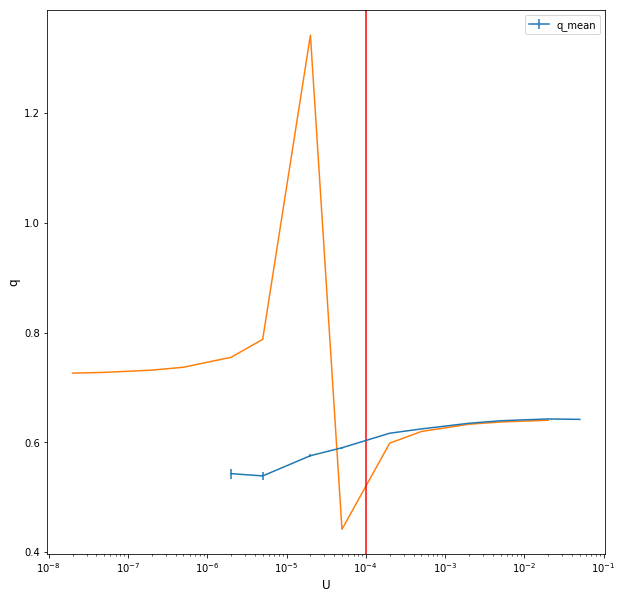

In [369]:
#(allele,trace)=readscalingexperiment(target_folder_path="analyses/scaling_U_10/" , scaling_param_name="U", param_names_allele=["Generation_number","Allele_number","Frequency","Activity","Age","q_allele","Fertility_allele","mean_affinity"], param_names_trace=["Generation_number","Total_number_of_allele","Diversity","Activity","Mean_Age","Time","Fertility_rate","2_DSB_on_one_site_rate","No_DSB_rate","No_symmetrical_sites_rate","q","q_intra","fertility_intra"],withoutneutral=0,init_line=101)
(allele,trace)=readscalingexperiment(target_folder_path="analyses/scaling_U_14/" , scaling_param_name="U", param_names_allele=["Generation_number","Allele_number","Frequency","Activity","Age","q_allele","Fertility_allele","mean_affinity","q_analytic","fertility_analytic"], param_names_trace=["Generation_number","Total_number_of_allele","Diversity","Activity","Mean_Age","Time","Fertility_rate","2_DSB_on_one_site_rate","No_DSB_rate","No_symmetrical_sites_rate","q","q_intra","fertility_intra","q_analytic","fertility_analytic","q_sym"],withoutneutral=0,init_line=100)
scaling_param_name="U"

param_to_plot="q"
paramname="q"

plt.figure(1, figsize=(10,10))

cletodelete=[]
for cle in trace:
    if len(trace[cle])==0:
        cletodelete.append(cle)
for cle in cletodelete:
    del trace[cle]
df_trace = pd.DataFrame(trace,index = trace["U"])
df_trace.sort_values(by = "U", inplace = True)
plt.errorbar(df_trace[scaling_param_name], df_trace[param_to_plot+'_mean'], df_trace[param_to_plot+'_variance'])

#plt.errorbar(trace[scaling_param_name][0:4], trace[param_to_plot+'_mean'][0:4], trace[param_to_plot+'_variance'][0:4])
plt.plot(U,Q)
#############
#plt.plot(U,X1,label="X1")
#plt.plot(U,X2,label="X2")
#plt.plot(U,X3,label="X3")
#############
plt.xscale('log')
#plt.yscale('log')
plt.ylabel(paramname, fontsize = 12)
plt.xlabel(scaling_param_name, fontsize = 12)
plt.axvline(x=1e-4,color="red")
plt.legend()
#maxval=[]
#for i in range(len(trace[param_to_plot+'_mean'][0:4])):
#    maxval.append(trace[param_to_plot+'_mean'][0:4][i]+trace[param_to_plot+'_variance'][0:4][i])
#ytext=np.max(maxval)

In [370]:
V=[2e-2,5e-3,2e-3,5e-4,2e-4,5e-5,2e-5,5e-6,2e-6,5e-7,2e-7,5e-8,2e-8]
Q=[]
mu=4*N*u
for i in V :
    rho=(N*i*d)/(2*h)
    z_bar=np.sqrt(rho/(mu*alpha))
    x_bar=simpson(x_bar_func, 0, 10, 100)
    x2_bar=simpson(x2_bar_func, 0, 10, 100)
    x3_bar=simpson(x3_bar_func, 0, 10, 100)
    Q.append((2*x2_bar-x3_bar)/(x_bar)) 

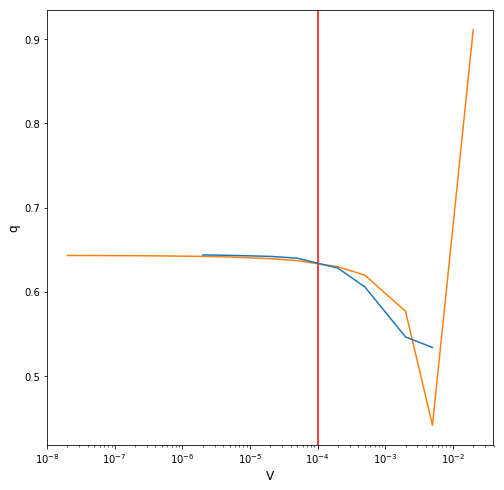

In [371]:
#(allele,trace)=readscalingexperiment(target_folder_path="analyses/scaling_V_10/" , scaling_param_name="V", param_names_allele=["Generation_number","Allele_number","Frequency","Activity","Age","q_allele","Fertility_allele","mean_affinity"], param_names_trace=["Generation_number","Total_number_of_allele","Diversity","Activity","Mean_Age","Time","Fertility_rate","2_DSB_on_one_site_rate","No_DSB_rate","No_symmetrical_sites_rate","q","q_intra","fertility_intra"],withoutneutral=0,init_line=101)
(allele,trace)=readscalingexperiment(target_folder_path="analyses/scaling_V_14/" , scaling_param_name="V", param_names_allele=["Generation_number","Allele_number","Frequency","Activity","Age","q_allele","Fertility_allele","mean_affinity","q_analytic","fertility_analytic"], param_names_trace=["Generation_number","Total_number_of_allele","Diversity","Activity","Mean_Age","Time","Fertility_rate","2_DSB_on_one_site_rate","No_DSB_rate","No_symmetrical_sites_rate","q","q_intra","fertility_intra","q_analytic","fertility_analytic","q_sym"],withoutneutral=0,init_line=100)
scaling_param_name="V"

param_to_plot="q"
paramname="q"

plt.figure(1, figsize=(8,8))

cletodelete=[]
for cle in trace:
    if len(trace[cle])==0:
        cletodelete.append(cle)
for cle in cletodelete:
    del trace[cle]
df_trace = pd.DataFrame(trace,index = trace["V"])
df_trace.sort_values(by = "V", inplace = True)
plt.errorbar(df_trace[scaling_param_name], df_trace[param_to_plot+'_mean'], df_trace[param_to_plot+'_variance'])

#plt.errorbar(trace[scaling_param_name][0:5], trace[param_to_plot+'_mean'][0:5], trace[param_to_plot+'_variance'][0:5])
plt.plot(V,Q)
plt.xscale('log')
#plt.yscale('log')
plt.ylabel(paramname, fontsize = 12)
plt.xlabel(scaling_param_name, fontsize = 12)
plt.axvline(x=1e-4,color="red")
#maxval=[]
#for i in range(len(trace[param_to_plot+'_mean'][0:5])):
#    maxval.append(trace[param_to_plot+'_mean'][0:5][i]+trace[param_to_plot+'_variance'][0:5][i])
#ytext=np.max(maxval)

### W_bar

In [377]:
U=[2e-2,5e-3,2e-3,5e-4,2e-4,5e-5,2e-5,5e-6,2e-6,5e-7,2e-7,5e-8,2e-8]
W=[]
rho=(N*v*d)/(2*h)
for i in U :
    mu=4*N*i
    z_bar=np.sqrt(rho/(mu*alpha))
    x_bar=simpson(x_bar_func, 0, 10, 100)
    x2_bar=simpson(x2_bar_func, 0, 10, 100)
    x3_bar=simpson(x3_bar_func, 0, 10, 100)
    q_bar=(2*x2_bar-x3_bar)/(x_bar)
    W.append(1-np.exp(-d*q_bar))

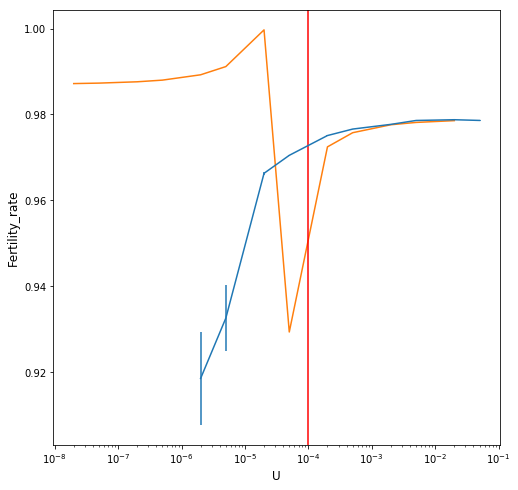

In [378]:
#(allele,trace)=readscalingexperiment(target_folder_path="analyses/scaling_U_10/" , scaling_param_name="U", param_names_allele=["Generation_number","Allele_number","Frequency","Activity","Age","q_allele","Fertility_allele","mean_affinity"], param_names_trace=["Generation_number","Total_number_of_allele","Diversity","Activity","Mean_Age","Time","Fertility_rate","2_DSB_on_one_site_rate","No_DSB_rate","No_symmetrical_sites_rate","q","q_intra","fertility_intra"],withoutneutral=0,init_line=101)
(allele,trace)=readscalingexperiment(target_folder_path="analyses/scaling_U_14/" , scaling_param_name="U", param_names_allele=["Generation_number","Allele_number","Frequency","Activity","Age","q_allele","Fertility_allele","mean_affinity","q_analytic","fertility_analytic"], param_names_trace=["Generation_number","Total_number_of_allele","Diversity","Activity","Mean_Age","Time","Fertility_rate","2_DSB_on_one_site_rate","No_DSB_rate","No_symmetrical_sites_rate","q","q_intra","fertility_intra","q_analytic","fertility_analytic","q_sym"],withoutneutral=0,init_line=100)
scaling_param_name="U"

param_to_plot="Fertility_rate"
paramname="Fertility_rate"

plt.figure(1, figsize=(8,8))

cletodelete=[]
for cle in trace:
    if len(trace[cle])==0:
        cletodelete.append(cle)
for cle in cletodelete:
    del trace[cle]
df_trace = pd.DataFrame(trace,index = trace["U"])
df_trace.sort_values(by = "U", inplace = True)
plt.errorbar(df_trace[scaling_param_name], df_trace[param_to_plot+'_mean'], df_trace[param_to_plot+'_variance'])

#plt.errorbar(trace[scaling_param_name][0:4], trace[param_to_plot+'_mean'][0:4], trace[param_to_plot+'_variance'][0:4])
plt.plot(U,W)
plt.xscale('log')
#plt.yscale('log')
plt.ylabel(paramname, fontsize = 12)
plt.xlabel(scaling_param_name, fontsize = 12)
plt.axvline(x=1e-4,color="red")
#maxval=[]
#for i in range(len(trace[param_to_plot+'_mean'][0:4])):
#    maxval.append(trace[param_to_plot+'_mean'][0:4][i]+trace[param_to_plot+'_variance'][0:4][i])
#ytext=np.max(maxval)

In [374]:
V=[2e-2,5e-3,2e-3,5e-4,2e-4,5e-5,2e-5,5e-6,2e-6,5e-7,2e-7,5e-8,2e-8]
W=[]
mu=4*N*u
for i in V :
    rho=(N*i*d)/(2*h)
    z_bar=np.sqrt(rho/(mu*alpha))
    x_bar=simpson(x_bar_func, 0, 10, 100)
    x2_bar=simpson(x2_bar_func, 0, 10, 100)
    x3_bar=simpson(x3_bar_func, 0, 10, 100)
    q_bar=(2*x2_bar-x3_bar)/(x_bar)
    W.append(1-np.exp(-d*q_bar))

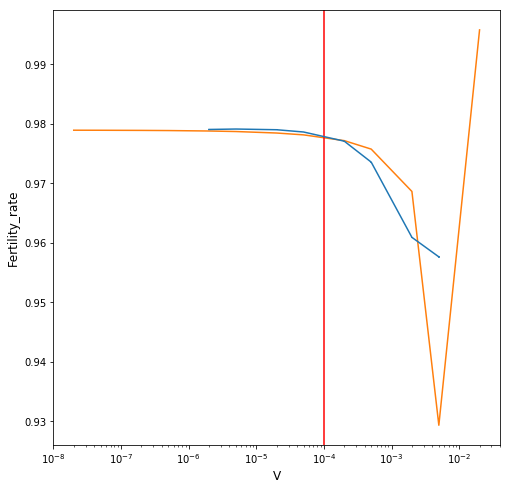

In [375]:
#(allele,trace)=readscalingexperiment(target_folder_path="analyses/scaling_V_10/" , scaling_param_name="V", param_names_allele=["Generation_number","Allele_number","Frequency","Activity","Age","q_allele","Fertility_allele","mean_affinity"], param_names_trace=["Generation_number","Total_number_of_allele","Diversity","Activity","Mean_Age","Time","Fertility_rate","2_DSB_on_one_site_rate","No_DSB_rate","No_symmetrical_sites_rate","q","q_intra","fertility_intra"],withoutneutral=0,init_line=101)
(allele,trace)=readscalingexperiment(target_folder_path="analyses/scaling_V_14/" , scaling_param_name="V", param_names_allele=["Generation_number","Allele_number","Frequency","Activity","Age","q_allele","Fertility_allele","mean_affinity","q_analytic","fertility_analytic"], param_names_trace=["Generation_number","Total_number_of_allele","Diversity","Activity","Mean_Age","Time","Fertility_rate","2_DSB_on_one_site_rate","No_DSB_rate","No_symmetrical_sites_rate","q","q_intra","fertility_intra","q_analytic","fertility_analytic","q_sym"],withoutneutral=0,init_line=100)
scaling_param_name="V"

param_to_plot="Fertility_rate"
paramname="Fertility_rate"

plt.figure(1, figsize=(8,8))

cletodelete=[]
for cle in trace:
    if len(trace[cle])==0:
        cletodelete.append(cle)
for cle in cletodelete:
    del trace[cle]
df_trace = pd.DataFrame(trace,index = trace["V"])
df_trace.sort_values(by = "V", inplace = True)
plt.errorbar(df_trace[scaling_param_name], df_trace[param_to_plot+'_mean'], df_trace[param_to_plot+'_variance'])

#plt.errorbar(trace[scaling_param_name][0:5], trace[param_to_plot+'_mean'][0:5], trace[param_to_plot+'_variance'][0:5])
plt.plot(V,W)
plt.xscale('log')
#plt.yscale('log')
plt.ylabel(paramname, fontsize = 12)
plt.xlabel(scaling_param_name, fontsize = 12)
plt.axvline(x=1e-4,color="red")
#maxval=[]
#for i in range(len(trace[param_to_plot+'_mean'][0:5])):
#    maxval.append(trace[param_to_plot+'_mean'][0:5][i]+trace[param_to_plot+'_variance'][0:5][i])
#ytext=np.max(maxval)

### 4Ns0

In [387]:
def dico_data(target_folder_path,x_params,y_params, file_ext, withneutral,withoutnan):
    list_files = sorted(os.listdir(target_folder_path))
    dico_file = dict()
    list_namefile=[]
    for file_name in list_files :
        if file_name.split(".")[1]==file_ext :
            if withneutral==1:
                data_file=readfiles(target_folder_path, file_name.split(".")[0], file_name.split(".")[1],0,withoutnan)
            elif withneutral==0:
                #data_file=readfiles(target_folder_path, file_name.split(".")[0], file_name.split(".")[1],1,withoutnan)
                data_file=readfiles1(target_folder_path, file_name.split(".")[0], file_name.split(".")[1],1,withoutnan,0,0,True,0)
            if  x_params in data_file and y_params in data_file :
                dico_file[(file_name.split(".")[0]).split("_")[-1]+"_x_params"]=data_file[x_params]
                dico_file[(file_name.split(".")[0]).split("_")[-1]+"_y_params"]=data_file[y_params]
            list_namefile.append((file_name.split(".")[0]).split("_")[2])
    list_namefile=sorted(list(set(list_namefile)))
    #print(data_file[y_params])
    #print(data_file1[y_params])
    return (list_namefile,dico_file)

[array([-0.00015503]), array([ -2.76447823e-06]), array([ -2.09491025e-06]), array([ -6.62865795e-06]), array([ -3.10202737e-05]), array([-0.00126981]), array([ -8.06772078e-06]), array([ -1.45565098e-06]), array([ -4.05022690e-06]), array([ -2.32955940e-05])] [array([  4.00447877e-06]), array([ -1.60355324e-07]), array([ -1.14792026e-06]), array([ -4.52062017e-06]), array([ -4.06773261e-06]), array([  1.16818454e-05]), array([  5.06941159e-07]), array([ -6.91670417e-07]), array([ -2.82550631e-06]), array([ -4.88436767e-06])]
[3.9871845300520903e-05, 4.6775599897297404e-05, 0.0047122055057173817, 0.20129666368649612, 0.5955664065441062, 7.7226064845170583e-05, 1.8838533666354351e-05, 0.00049170333859616111, 0.079497222120688105, 0.39598939569065017] [0.00019333452276226737, 0.00057312291444311381, 0.36804300161925152, 0.53324493314509858, 0.19782296460747695, 5.6876872531308464e-05, 0.00037657841997973396, 0.15355971549168856, 0.53455797511219827, 0.31832587459554651]


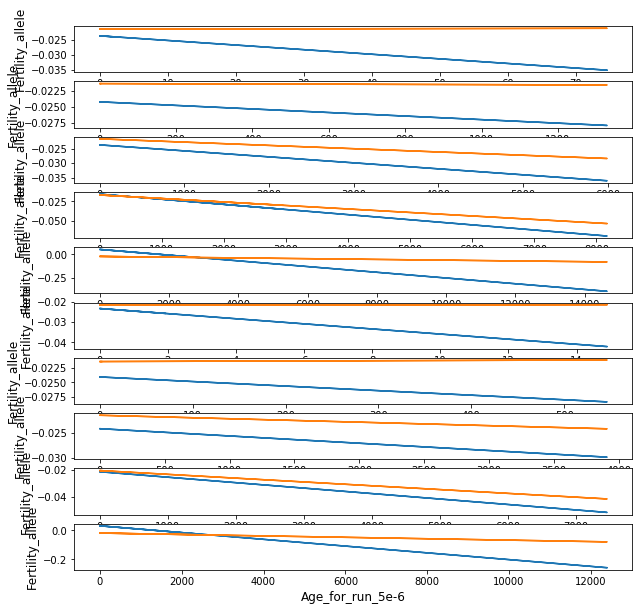

In [388]:
R2_score_list_pop=[]
intercept_list_pop=[]
slope_list_pop=[]
R2_score_list_pop1=[]
intercept_list_pop1=[]
slope_list_pop1=[]
plt.figure(1, figsize=(10,10))
index_line=1
#list_namefile,dico_file=dico_data("analyses/test_N_10000/","Age","Fertility_allele","allele",0,1)
#list_namefile1,dico_file1=dico_data("analyses/test_N_10000/","Age","fertility_analytic","allele",0,1)
list_namefile,dico_file=dico_data("analyses/scaling_U_14/","Age","Fertility_allele","allele",0,1)
list_namefile1,dico_file1=dico_data("analyses/scaling_U_14/","Age","fertility_analytic","allele",0,1)
#print(dico_file)
for i in list_namefile :
    plt.subplot(len(list_namefile),1,index_line)
    #plt.plot(dico_file[i+"_x_params"],dico_file[i+"_y_params"],'.',label="pop before migration")
    lm = LinearRegression().fit(np.array(dico_file[i+"_x_params"]).reshape(-1, 1), np.array(dico_file[i+"_y_params"]))
    plt.plot(dico_file[i+"_x_params"], lm.predict(np.array(dico_file[i+"_x_params"]).reshape(-1, 1)))
    lm1 = LinearRegression().fit(np.array(dico_file1[i+"_x_params"]).reshape(-1, 1), np.array(dico_file1[i+"_y_params"]))
    plt.plot(dico_file1[i+"_x_params"], lm1.predict(np.array(dico_file1[i+"_x_params"]).reshape(-1, 1)))
    plt.ylabel("Fertility_allele", fontsize = 12)
    plt.xlabel("Age"+"_for_run_"+i, fontsize = 12)
    score_lm = r2_score(np.array(dico_file[i+"_y_params"]),lm.predict(np.array(dico_file[i+"_x_params"]).reshape(-1, 1)))
    R2_score_list_pop.append(score_lm)
    intercept_list_pop.append(lm.intercept_)
    slope_list_pop.append(lm.coef_)
    score_lm1 = r2_score(np.array(dico_file1[i+"_y_params"]),lm1.predict(np.array(dico_file1[i+"_x_params"]).reshape(-1, 1)))
    R2_score_list_pop1.append(score_lm1)
    intercept_list_pop1.append(lm1.intercept_)
    slope_list_pop1.append(lm1.coef_)
    index_line=index_line+1
print(slope_list_pop,slope_list_pop1)
print(R2_score_list_pop,R2_score_list_pop1)

[array([-0.0008265]), array([ -3.41435923e-05]), array([ -1.55593160e-05]), array([ -2.46057798e-05]), array([ -1.62024025e-05]), array([-0.00514361]), array([ -9.30732805e-05]), array([ -1.62985650e-05]), array([ -2.07544094e-05]), array([ -1.86340751e-05])] [array([  3.19796654e-05]), array([ -1.05931512e-06]), array([ -7.74173391e-06]), array([ -1.99199617e-05]), array([ -1.16582219e-05]), array([  9.13648974e-05]), array([  4.28227379e-06]), array([ -4.99635667e-06]), array([ -1.48809894e-05]), array([ -1.50295050e-05])]
[0.00029599392145507331, 0.0018342550432830507, 0.067656738365397429, 0.64409351849994767, 0.31291089303043929, 0.00033391960819051381, 0.00067469471740300158, 0.016987231699369776, 0.42450668422942994, 0.38079211435363902] [0.00020497982353817612, 0.00042191220809295604, 0.35698994146796625, 0.70178800196836899, 0.18171792765329753, 5.8940386954309254e-05, 0.00044933849794637215, 0.14442127328004006, 0.63612728597036339, 0.29477989060991139]


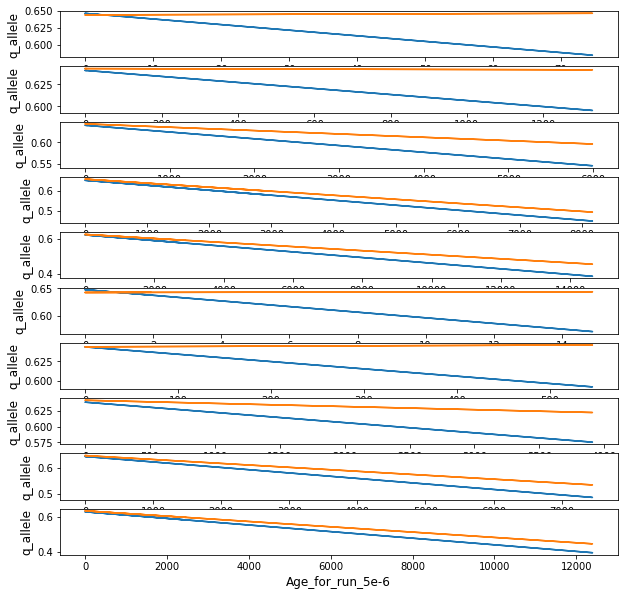

In [389]:
R2_score_list_pop=[]
intercept_list_pop=[]
slope_list_pop=[]
R2_score_list_pop1=[]
intercept_list_pop1=[]
slope_list_pop1=[]
plt.figure(1, figsize=(10,10))
index_line=1
#list_namefile,dico_file=dico_data("analyses/test_N_10000/","Age","q_allele","allele",0,1)
#list_namefile1,dico_file1=dico_data("analyses/test_N_10000/","Age","q_analytic","allele",0,1)
list_namefile,dico_file=dico_data("analyses/scaling_U_14/","Age","q_allele","allele",0,1)
list_namefile1,dico_file1=dico_data("analyses/scaling_U_14/","Age","q_analytic","allele",0,1)
for i in list_namefile :
    plt.subplot(len(list_namefile),1,index_line)
    #plt.plot(dico_file[i+"_x_params"],dico_file[i+"_y_params"],'.',label="pop before migration")
    lm = LinearRegression().fit(np.array(dico_file[i+"_x_params"]).reshape(-1, 1), np.array(dico_file[i+"_y_params"]))
    plt.plot(dico_file[i+"_x_params"], lm.predict(np.array(dico_file[i+"_x_params"]).reshape(-1, 1)))
    lm1 = LinearRegression().fit(np.array(dico_file1[i+"_x_params"]).reshape(-1, 1), np.array(dico_file1[i+"_y_params"]))
    plt.plot(dico_file1[i+"_x_params"], lm1.predict(np.array(dico_file1[i+"_x_params"]).reshape(-1, 1)))
    plt.ylabel("q_allele", fontsize = 12)
    plt.xlabel("Age"+"_for_run_"+i, fontsize = 12)
    score_lm = r2_score(np.array(dico_file[i+"_y_params"]),lm.predict(np.array(dico_file[i+"_x_params"]).reshape(-1, 1)))
    R2_score_list_pop.append(score_lm)
    intercept_list_pop.append(lm.intercept_)
    slope_list_pop.append(lm.coef_)
    score_lm1 = r2_score(np.array(dico_file1[i+"_y_params"]),lm1.predict(np.array(dico_file1[i+"_x_params"]).reshape(-1, 1)))
    R2_score_list_pop1.append(score_lm1)
    intercept_list_pop1.append(lm1.intercept_)
    slope_list_pop1.append(lm1.coef_)
    index_line=index_line+1
print(slope_list_pop,slope_list_pop1)
print(R2_score_list_pop,R2_score_list_pop1)

Run_U_2e-2.allele


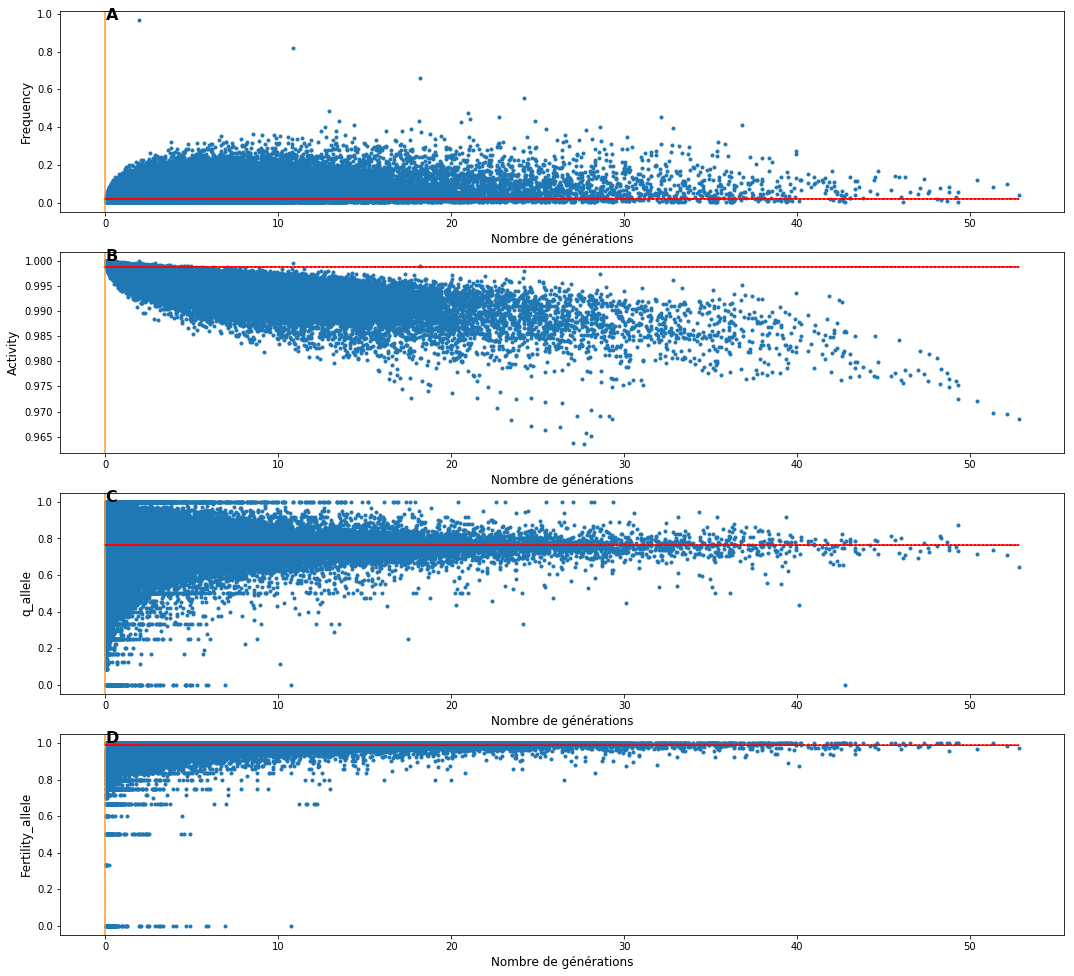

In [80]:
plot_regim(target_folder_path="analyses/scaling_U_10/",x_param="Age",y_params=["Frequency","Activity","q_allele","Fertility_allele"],file_name="Run_U_2e-2.allele",withoutneutral=1,time_stable=0,end_time=0,larg=17,long=18,vertline=0,xtext=0,title="")

In [81]:
(allele,trace)=readscalingexperiment(target_folder_path="analyses/scaling_U_10/" , scaling_param_name="U", param_names_allele=["Generation_number","Allele_number","Frequency","Activity","Age","q_allele","Fertility_allele","mean_affinity"], param_names_trace=["Generation_number","Total_number_of_allele","Diversity","Activity","Mean_Age","Time","Fertility_rate","2_DSB_on_one_site_rate","No_DSB_rate","No_symmetrical_sites_rate","q","q_intra","fertility_intra"],withoutneutral=0,init_line=101)
scaling_param_name="U"
paramname="Mean_Age"
for i in range(len(slope_list_pop)):
    print(list_namefile[i], " : ",4*N*abs(slope_list_pop[i])/2*trace["Mean_Age_mean"][i])

2e-2  :  [ 0.24420783]
2e-3  :  [ 0.07641983]
2e-4  :  [ 0.91354187]
2e-5  :  [ 10.55003848]
2e-6  :  [ 30.69824104]
5e-2  :  [ 0.32551471]
5e-3  :  [ 0.13176403]
5e-4  :  [ 0.31949425]
5e-5  :  [ 3.15915287]
5e-6  :  [ 27.95559802]


[array([-0.00035542]), array([ -3.68618477e-06]), array([  9.41668977e-06]), array([  1.30660047e-05]), array([  1.28376445e-05]), array([  1.05615110e-05]), array([ -3.38499680e-05]), array([  9.46408232e-06]), array([  9.87710243e-06]), array([  9.88288371e-06]), array([  9.30521959e-06])]


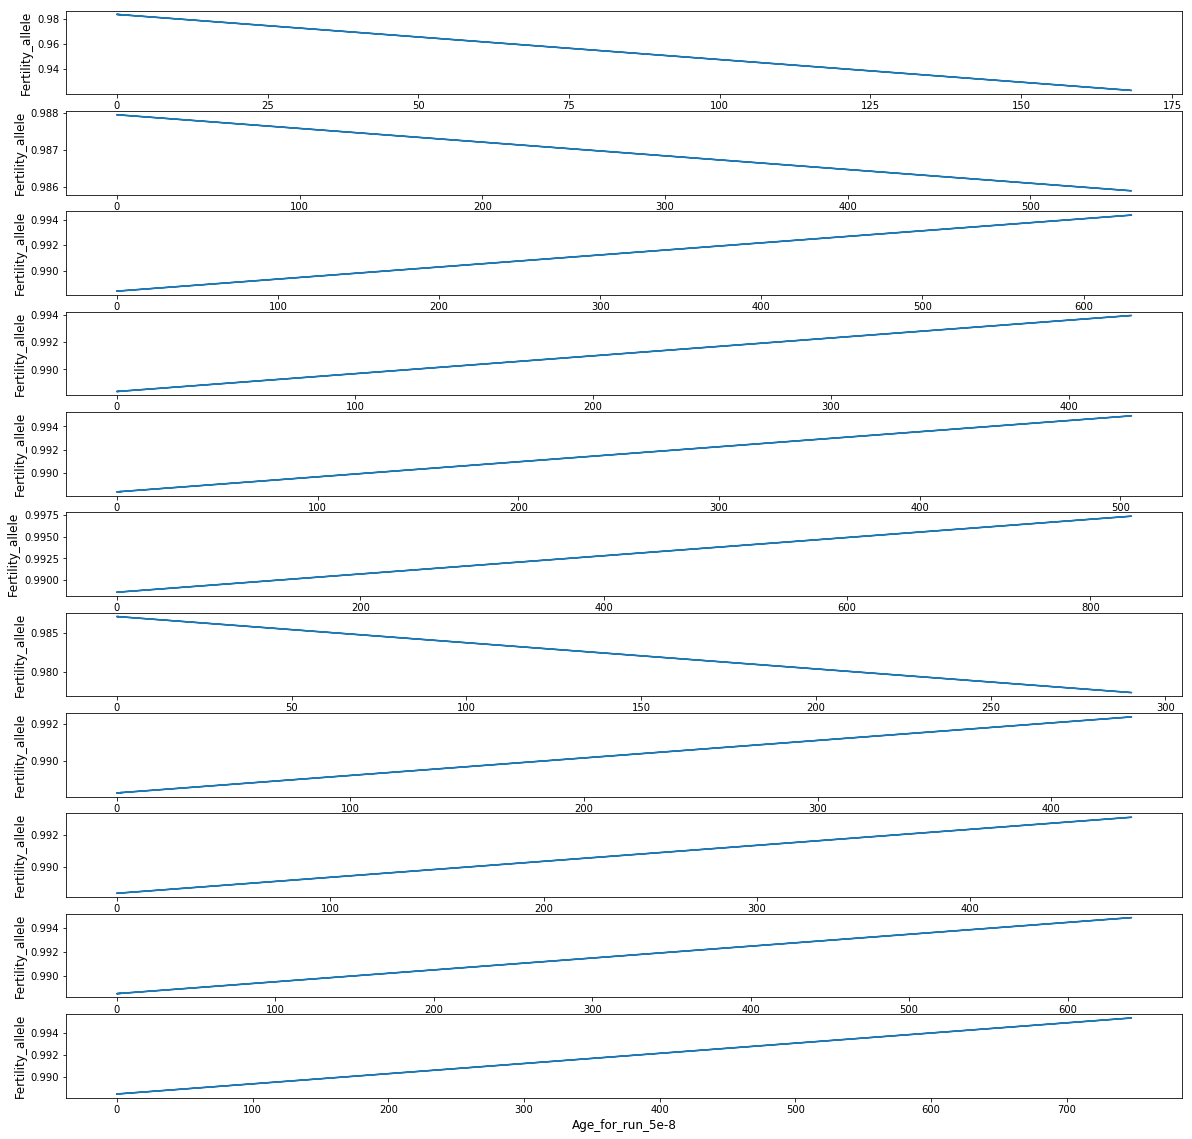

In [82]:
R2_score_list_pop=[]
intercept_list_pop=[]
slope_list_pop=[]
plt.figure(1, figsize=(20,20))
index_line=1
list_namefile,dico_file=dico_data("analyses/scaling_V_10/","Age","Fertility_allele","allele",0,1)
for i in list_namefile :
    plt.subplot(len(list_namefile),1,index_line)
    #plt.plot(dico_file[i+"_x_params"],dico_file[i+"_y_params"],'.',label="pop before migration")
    lm = LinearRegression().fit(np.array(dico_file[i+"_x_params"]).reshape(-1, 1), np.array(dico_file[i+"_y_params"]))
    plt.plot(dico_file[i+"_x_params"], lm.predict(np.array(dico_file[i+"_x_params"]).reshape(-1, 1)))
    plt.ylabel("Fertility_allele", fontsize = 12)
    plt.xlabel("Age"+"_for_run_"+i, fontsize = 12)
    score_lm = r2_score(np.array(dico_file[i+"_y_params"]),lm.predict(np.array(dico_file[i+"_x_params"]).reshape(-1, 1)))
    R2_score_list_pop.append(score_lm)
    intercept_list_pop.append(lm.intercept_)
    slope_list_pop.append(lm.coef_)
    index_line=index_line+1
print(slope_list_pop)

Run_V_2e-3.allele


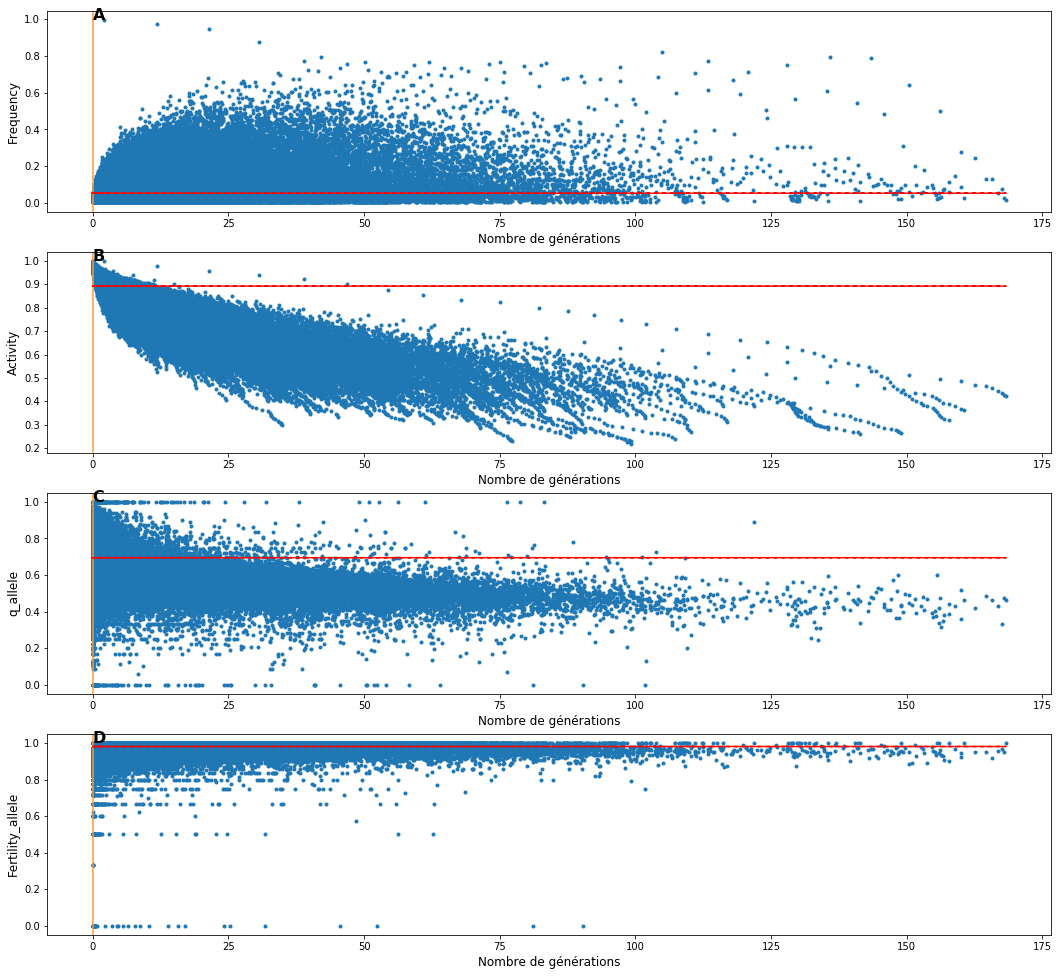

In [83]:
plot_regim(target_folder_path="analyses/scaling_V_10/",x_param="Age",y_params=["Frequency","Activity","q_allele","Fertility_allele"],file_name="Run_V_2e-3.allele",withoutneutral=1,time_stable=0,end_time=0,larg=17,long=18,vertline=0,xtext=0,title="")

In [84]:
(allele,trace)=readscalingexperiment(target_folder_path="analyses/scaling_V_10/" , scaling_param_name="V", param_names_allele=["Generation_number","Allele_number","Frequency","Activity","Age","q_allele","Fertility_allele","mean_affinity"], param_names_trace=["Generation_number","Total_number_of_allele","Diversity","Activity","Mean_Age","Time","Fertility_rate","2_DSB_on_one_site_rate","No_DSB_rate","No_symmetrical_sites_rate","q","q_intra","fertility_intra"],withoutneutral=0,init_line=101)
scaling_param_name="V"
paramname="Mean_Age"
for i in range(len(slope_list_pop)):
    print(list_namefile[i], " : ",4*N*abs(slope_list_pop[i])/2*trace["Mean_Age_mean"][i])

2e-3  :  [ 2.27210932]
2e-4  :  [ 0.05362841]
2e-5  :  [ 0.15925827]
2e-6  :  [ 0.1962997]
2e-7  :  [ 0.19605729]
2e-8  :  [ 0.18057688]
5e-4  :  [ 0.43761558]
5e-5  :  [ 0.15034488]
5e-6  :  [ 0.16341185]
5e-7  :  [ 0.17185976]
5e-8  :  [ 0.15828921]


In [120]:
# s_0=log(fertilite_moyenne_jeune_allele)-log(fertilite_moy)
# prendre les individus avec un age minimal (pas 0 car a partir du moment ou il sont dns le population, leur frequence est non nulle donc leur age non plus), prendre leur fertilite puis leur retirer la fertilite moyenne
list_namefile,dico_file=dico_data("analyses/scaling_U_11/","Age","Fertility_allele","allele",0,1)
S0=[]
for i in list_namefile :
    fert_moy=0
    n=len(dico_file[i+"_x_params"])
    m=min(dico_file[i+"_x_params"])
    ntot=0
    for j in range(n):
        if dico_file[i+"_x_params"][j]==m and dico_file[i+"_y_params"][j]!=0:
            fert_moy+=dico_file[i+"_y_params"][j]
            ntot+=1
    fert_moy=np.log(fert_moy/ntot)-np.log(np.mean(dico_file[i+"_y_params"]))
    S0.append(fert_moy)

In [121]:
for i in range(len(list_namefile)):
    print(list_namefile[i]," , S0 = ",S0[i]," , 4NS0 = ",4*N*S0[i])

2e-2  , S0 =  0.00167004394235  , 4NS0 =  1.33603515388
2e-3  , S0 =  0.00170902210776  , 4NS0 =  1.36721768621
2e-4  , S0 =  0.0050955473876  , 4NS0 =  4.07643791008
2e-5  , S0 =  0.0184262394859  , 4NS0 =  14.7409915887
2e-6  , S0 =  0.0767790309506  , 4NS0 =  61.4232247605
5e-2  , S0 =  0.001712962513  , 4NS0 =  1.3703700104
5e-3  , S0 =  0.0017453033674  , 4NS0 =  1.39624269392
5e-4  , S0 =  0.00277264227656  , 4NS0 =  2.21811382125
5e-5  , S0 =  0.00692165571986  , 4NS0 =  5.53732457589
5e-6  , S0 =  0.0364396291567  , 4NS0 =  29.1517033253


In [92]:
# s_0=log(fertilite_moyenne_jeune_allele)-log(fertilite_moy)
# prendre les individus avec un age  minimal (pas 0 car a partir du moment ou il sont dns le population, leur frequence est non nulle donc leur age non plus), prendre leur fertilite puis leur retirer la fertilite moyenne

#list_namefile,dico_file=dico_data("analyses/test_N_10000/","Age","Fertility_allele","allele",0,1)
#list_namefile1,dico_file1=dico_data("analyses/test_N_10000/","Mean_Age","Fertility_rate","trace",0,1)
list_namefile,dico_file=dico_data("analyses/test_N_10000/","Age","fertility_analytic","allele",0,1)
list_namefile1,dico_file1=dico_data("analyses/test_N_10000/","Mean_Age","fertility_analytic","trace",0,1)
S0=[]
z_moy=[]
for i in list_namefile :
    fert_moy=0
    n=len(dico_file[i+"_x_params"])
    m=min(dico_file[i+"_x_params"])
    ntot=0
    for j in range(n):
        if dico_file[i+"_x_params"][j]==m and dico_file[i+"_y_params"][j]!=0:
            fert_moy+=dico_file[i+"_y_params"][j]
            ntot+=1
    fert_moy=np.log(fert_moy/ntot)-np.log(np.mean(dico_file[i+"_y_params"]))
    S0.append(fert_moy)
    z_moy.append(np.mean(dico_file1[i+"_x_params"][180:733]))

In [91]:
N=10000
v=1e-4
d=6
h=400
for i in range(len(list_namefile)):
    print(list_namefile[i]," , S0 = ",S0[i]," , 4NS0 = ",4*N*S0[i], " , Z_moy = ",z_moy[i]*(N*v*d)/(2*h), ", z_moy = ",z_moy[i])

5e-4  , S0 =  0.00572016337918  , 4NS0 =  228.806535167  , Z_moy =  0.220588429348 , z_moy =  29.4117905797


In [93]:
N=10000
v=1e-4
d=6
h=400
for i in range(len(list_namefile)):
    print(list_namefile[i]," , S0 = ",S0[i]," , 4NS0 = ",4*N*S0[i], " , Z_moy = ",z_moy[i]*(N*v*d)/(2*h), ", z_moy = ",z_moy[i])

5e-4  , S0 =  6.0416074335e-06  , 4NS0 =  0.24166429734  , Z_moy =  0.220588429348 , z_moy =  29.4117905797


In [89]:
U=[2e-2,5e-3,2e-3,5e-4,2e-4,5e-5,2e-5,5e-6,2e-6,5e-7,2e-7,5e-8,2e-8]
S=[]
rho=(N*v*d)/(2*h)
for i in U :
    mu=4*N*i
    z_bar=np.sqrt(rho/(mu*alpha))
    S.append(4*N*alpha/2*z_bar)

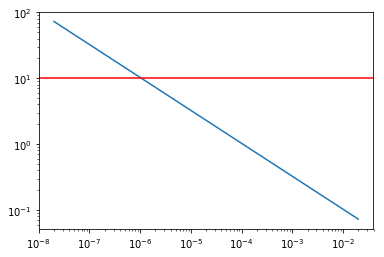

In [90]:
plt.plot(U,S)
plt.xscale('log')
plt.yscale('log')
plt.axhline(y=10,color="red")

In [91]:
V=[2e-2,5e-3,2e-3,5e-4,2e-4,5e-5,2e-5,5e-6,2e-6,5e-7,2e-7,5e-8,2e-8]
S=[]
mu=4*N*u
for i in V :
    rho=(N*i*d)/(2*h)
    z_bar=np.sqrt(rho/(mu*alpha))
    S.append(4*N*alpha/2*z_bar)

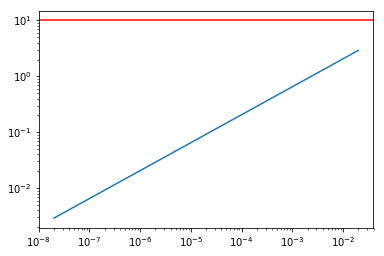

In [92]:
plt.plot(V,S)
plt.xscale('log')
plt.yscale('log')
plt.axhline(y=10,color="red")

# Tests

In [310]:
def simpson(f, a, b, n):
    pas = (b - a) / n
    somme = (f(a) + f(b)) / 2 + 2 * f(a + pas / 2)  # On initialise la somme
    x = a + pas           # La somme commence à x_1 
    for i in range(1, n): # On calcule la somme 
        somme += f(x) + 2 * f(x + pas / 2)
        x += pas
    return somme * pas / 3   # On retourne cette somme fois le pas / 3  

#c=1
c=2
coeff_gamma=0.6
def gamma_func(aff):
    integral=1/coeff_gamma*np.exp(-aff*1/coeff_gamma)
    return integral

def x_0_func(aff):
    integral=(c*aff)/(1+c*aff)*gamma_func(aff)
    return integral
def x2_0_func(aff):
    integral=((c*aff)/(1+c*aff))**2*gamma_func(aff)
    return integral
def x3_0_func(aff):
    integral=((c*aff)/(1+c*aff))**3*gamma_func(aff)
    return integral
def x4_0_func(aff):
    integral=((c*aff)/(1+c*aff))**4*gamma_func(aff)
    return integral


def x_bar_func(aff):
    integral=(c*aff)/(1+c*aff)*1/0.6*np.exp(-aff*1/0.6)*(1-((c*aff)/(1+c*aff))/(x_0)*z_bar)
    return integral
def x2_bar_func(aff):
    integral=((c*aff)/(1+c*aff))**2*1/0.6*np.exp(-aff*1/0.6)*(1-((c*aff)/(1+c*aff))/(x_0)*z_bar)
    return integral
def x3_bar_func(aff):
    integral=((c*aff)/(1+c*aff))**3*1/0.6*np.exp(-aff*1/0.6)*(1-((c*aff)/(1+c*aff))/(x_0)*z_bar)
    return integral

In [321]:
N_test=10000
u_test=5e-4
v_test=1e-4
h_test=400
d_test=6
coeff_gamma_test=0.6
x_0=simpson(x_0_func, 0, 10, 100)
x2_0=simpson(x2_0_func, 0, 10, 100)
x3_0=simpson(x3_0_func, 0, 10, 100)
x4_0=simpson(x4_0_func, 0, 10, 100)
q_0=(2*x2_0-x3_0)/(x_0)
beta_0=abs((-2*x3_0+x4_0+(2*x2_0**2)/(x_0)-(x3_0*x2_0)/(x_0))/(2*x_0**2))
alpha_test=abs(d_test*beta_0*np.exp(-d_test*q_0))
fert_0_test=1-np.exp(-d_test*q_0)
rho_test=(N_test*v_test*d_test)/(2*h_test)
mu_test=4*N_test*u_test
z_bar_test=np.sqrt(rho_test/(mu_test*alpha_test))
age_moy=z_bar_test*(2*h_test)/(N_test*v_test*d_test)
s0_test=alpha_test*z_bar_test/2
x_bar=simpson(x_bar_func, 0, 10, 100)
x2_bar=simpson(x2_bar_func, 0, 10, 100)
x3_bar=simpson(x3_bar_func, 0, 10, 100)
q_bar_test=(2*x2_bar-x3_bar)/(x_bar)
w_bar_test=1-np.exp(-d_test*q_bar_test)
print("alpha = ",alpha_test)
print("fert_0 = ",fert_0_test)
print("beta = ",beta_0)
print("q_0 = ",q_0)
print("mu = ",mu_test)
print("rho = ", rho_test)
print("z_bar = ", z_bar_test)
print("age_moy = ",age_moy)
print("s0 = ",s0_test)
print("4Ns0 = ",4*N_test*s0_test )
print("q_bar = ",q_bar_test)
print("w_bar = ",w_bar_test)
print("ln(w_bar) = ",np.log(w_bar_test))
U_test=[2e-2,5e-3,2e-3,5e-4,2e-4,5e-5,2e-5,5e-6,2e-6,5e-7,2e-7,5e-8,2e-8]
V_test=[2e-2,5e-3,2e-3,5e-4,2e-4,5e-5,2e-5,5e-6,2e-6,5e-7,2e-7,5e-8,2e-8]

alpha =  0.00226684477496
fert_0 =  0.990061077041
beta =  0.0380129179021
q_0 =  0.768549436394
mu =  20.0
rho =  0.0075
z_bar =  0.406728628928
age_moy =  54.2304838571
s0 =  0.000460995333656
4Ns0 =  18.4398133462
q_bar =  0.768410830451
w_bar =  0.99005280804
ln(w_bar) =  -0.00999699582167


In [328]:
def dico_data(target_folder_path,x_params,y_params, file_ext, withneutral,withoutnan):
    list_files = sorted(os.listdir(target_folder_path))
    dico_file = dict()
    list_namefile=[]
    for file_name in list_files :
        if file_name.split(".")[1]==file_ext :
            if withneutral==1:
                data_file=readfiles(target_folder_path, file_name.split(".")[0], file_name.split(".")[1],0,withoutnan)
            elif withneutral==0:
                #data_file=readfiles(target_folder_path, file_name.split(".")[0], file_name.split(".")[1],1,withoutnan)
                data_file=readfiles1(target_folder_path, file_name.split(".")[0], file_name.split(".")[1],1,withoutnan,0,0,True,202)
            if  x_params in data_file and y_params in data_file :
                dico_file[(file_name.split(".")[0]).split("_")[-1]+"_x_params"]=data_file[x_params]
                dico_file[(file_name.split(".")[0]).split("_")[-1]+"_y_params"]=data_file[y_params]
            list_namefile.append((file_name.split(".")[0]).split("_")[2])
    list_namefile=sorted(list(set(list_namefile)))
    #print(len(data_file[y_params]))
    #print(len(data_file[x_params]))
    #print(data_file1[y_params])
    return (list_namefile,dico_file)

In [330]:
list_namefile_fert_an,dico_file_fert_an=dico_data("analyses/test_N_10000/","Mean_Age","fertility_analytic","trace",0,1)
list_namefile_fert_sim,dico_file_fert_sim=dico_data("analyses/test_N_10000/","Mean_Age","Fertility_rate","trace",0,1)
list_namefile_q_an,dico_file_q_an=dico_data("analyses/test_N_10000/","Mean_Age","q_analytic","trace",0,1)
list_namefile_q_sim,dico_file_q_sim=dico_data("analyses/test_N_10000/","Mean_Age","q","trace",0,1)

for i in list_namefile_fert_an :
    print("file = ",i)
    print("mean_age = ",np.mean(dico_file_q_an[i+"_x_params"])*(N_test*v_test*d_test)/(2*h_test),np.mean(dico_file_q_an[i+"_x_params"]))
    print("q_bar_analytic = ",np.mean(dico_file_q_an[i+"_y_params"]))
    print("q_bar_simulation = ",np.mean(dico_file_q_sim[i+"_y_params"]))
    print("w_bar_analytic = ",np.mean(dico_file_fert_an[i+"_y_params"]))
    print("w_bar_simulation = ",np.mean(dico_file_fert_sim[i+"_y_params"]))

file =  5e-4
mean_age =  0.219709659305 29.2946212406
q_bar_analytic =  0.76861968609
q_bar_simulation =  0.732064432331
w_bar_analytic =  -0.00999212914082
w_bar_simulation =  -0.0125878826599


/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


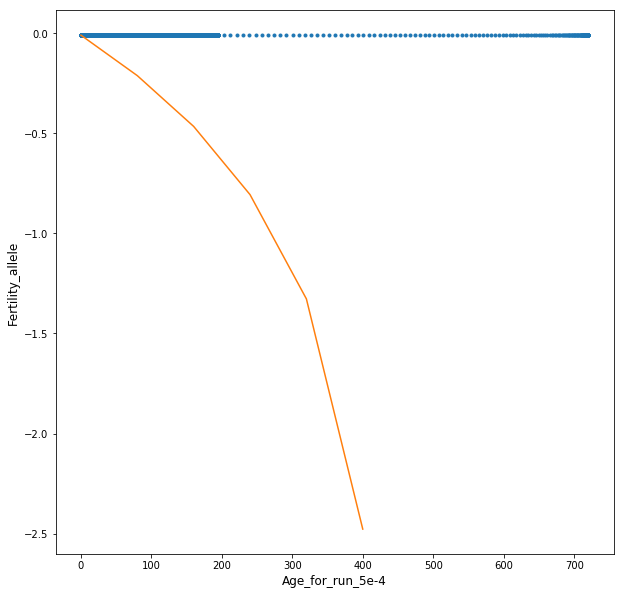

In [326]:
def fertrate(x):
    return np.log(fert_0_test-x*alpha_test)

R2_score_list_pop=[]
intercept_list_pop=[]
slope_list_pop=[]
R2_score_list_pop1=[]
intercept_list_pop1=[]
slope_list_pop1=[]
plt.figure(1, figsize=(10,10))
index_line=1
#list_namefile,dico_file=dico_data("analyses/test_N_10000/","Age","Fertility_allele","allele",0,1)
#list_namefile1,dico_file1=dico_data("analyses/test_N_10000/","Mean_Age","fertility_analytic","trace",0,1)
#list_namefile1,dico_file1=dico_data("analyses/test_N_10000/","Mean_Age","Fertility_rate","trace",0,1)
list_namefile1,dico_file1=dico_data("analyses/test_N_10000/","Age","fertility_analytic","allele",0,1)
#print(dico_file)
for i in list_namefile :
    plt.subplot(len(list_namefile),1,index_line)
    #plt.plot(dico_file[i+"_x_params"],dico_file[i+"_y_params"],'.',label="pop before migration")
    #lm = LinearRegression().fit(np.array(dico_file[i+"_x_params"]).reshape(-1, 1), np.array(dico_file[i+"_y_params"]))
    #plt.plot(dico_file[i+"_x_params"], lm.predict(np.array(dico_file[i+"_x_params"]).reshape(-1, 1)))
    #lm1 = LinearRegression().fit(np.array(dico_file1[i+"_x_params"]).reshape(-1, 1), np.array(dico_file1[i+"_y_params"]))
    #plt.plot(dico_file1[i+"_x_params"], lm1.predict(np.array(dico_file1[i+"_x_params"]).reshape(-1, 1)))
    plt.plot(dico_file1[i+"_x_params"],dico_file1[i+"_y_params"],'.')
    xrange=np.linspace(0, max(dico_file1[i+"_x_params"]), 10)
    plt.plot(xrange,fertrate(xrange))
    plt.ylabel("Fertility_allele", fontsize = 12)
    plt.xlabel("Age"+"_for_run_"+i, fontsize = 12)
    #score_lm = r2_score(np.array(dico_file[i+"_y_params"]),lm.predict(np.array(dico_file[i+"_x_params"]).reshape(-1, 1)))
    #R2_score_list_pop.append(score_lm)
    #intercept_list_pop.append(lm.intercept_)
    #slope_list_pop.append(lm.coef_)
    #score_lm1 = r2_score(np.array(dico_file1[i+"_y_params"]),lm1.predict(np.array(dico_file1[i+"_x_params"]).reshape(-1, 1)))
    #R2_score_list_pop1.append(score_lm1)
    #intercept_list_pop1.append(lm1.intercept_)
    #slope_list_pop1.append(lm1.coef_)
    index_line=index_line+1
#print(slope_list_pop,slope_list_pop1)
#print(R2_score_list_pop,R2_score_list_pop1)

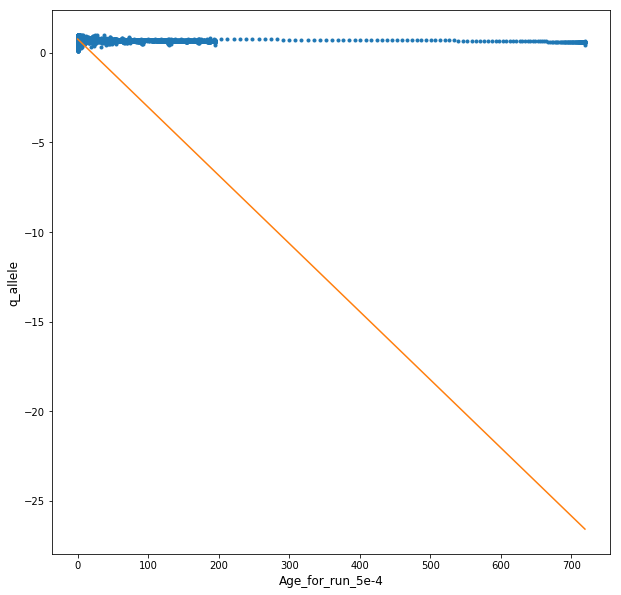

In [327]:
def qrate(x):
    return q_0-x*beta_0

R2_score_list_pop=[]
intercept_list_pop=[]
slope_list_pop=[]
R2_score_list_pop1=[]
intercept_list_pop1=[]
slope_list_pop1=[]
plt.figure(1, figsize=(10,10))
index_line=1
list_namefile1,dico_file1=dico_data("analyses/test_N_10000/","Age","q_allele","allele",0,1)
#list_namefile1,dico_file1=dico_data("analyses/test_N_10000/","Mean_Age","q_analytic","trace",0,1)
#print(dico_file)
for i in list_namefile :
    plt.subplot(len(list_namefile),1,index_line)
    #plt.plot(dico_file[i+"_x_params"],dico_file[i+"_y_params"],'.',label="pop before migration")
    #lm = LinearRegression().fit(np.array(dico_file[i+"_x_params"]).reshape(-1, 1), np.array(dico_file[i+"_y_params"]))
    #plt.plot(dico_file[i+"_x_params"], lm.predict(np.array(dico_file[i+"_x_params"]).reshape(-1, 1)))
    #lm1 = LinearRegression().fit(np.array(dico_file1[i+"_x_params"]).reshape(-1, 1), np.array(dico_file1[i+"_y_params"]))
    #plt.plot(dico_file1[i+"_x_params"], lm1.predict(np.array(dico_file1[i+"_x_params"]).reshape(-1, 1)))
    plt.plot(dico_file1[i+"_x_params"],dico_file1[i+"_y_params"],'.')
    xrange=np.linspace(0, max(dico_file1[i+"_x_params"]), 10)
    plt.plot(xrange,qrate(xrange))
    plt.ylabel("q_allele", fontsize = 12)
    plt.xlabel("Age"+"_for_run_"+i, fontsize = 12)
    #score_lm = r2_score(np.array(dico_file[i+"_y_params"]),lm.predict(np.array(dico_file[i+"_x_params"]).reshape(-1, 1)))
    #R2_score_list_pop.append(score_lm)
    #intercept_list_pop.append(lm.intercept_)
    #slope_list_pop.append(lm.coef_)
    #score_lm1 = r2_score(np.array(dico_file1[i+"_y_params"]),lm1.predict(np.array(dico_file1[i+"_x_params"]).reshape(-1, 1)))
    #R2_score_list_pop1.append(score_lm1)
    #intercept_list_pop1.append(lm1.intercept_)
    #slope_list_pop1.append(lm1.coef_)
    index_line=index_line+1
#print(slope_list_pop,slope_list_pop1)
#print(R2_score_list_pop,R2_score_list_pop1)

In [233]:
umin=N_test*alpha_test*d_test/(800*h_test)
umax=N_test*alpha_test*d_test/(8*h_test)
print("umin = ",umin)
print("umax = ",umax)

umin =  0.00466838592844
umax =  0.466838592844


In [234]:
vmin=200*umin*h_test/(N_test**2*alpha_test*d_test)
vmax=200*umax*h_test/(N_test**2*alpha_test*d_test)
print("vmin = ",vmin)
print("vmax = ",vmax)

vmin =  2.5e-05
vmax =  0.0025


In [235]:
voverumin=0.01*8*h_test*alpha_test/d_test
voverumax=0.25*8*h_test*alpha_test/d_test
print("voverumin = ",voverumin)
print("voverumax = ",voverumax)

voverumin =  0.191217087629
voverumax =  4.78042719072


In [23]:
#4Ns
rho_test=(N_test*v_test*d_test)/(2*h_test)
mu_test=4*N_test*u_test
z_bar_test=np.sqrt(rho_test/(mu_test*alpha_test))
print("Z_moy = ",z_bar_test)
print("z_moy = ",z_bar_test*(2*h_test)/(N_test*v_test*d_test))
fourNs_test=4*N_test*alpha_test/2*z_bar_test
print("s0 = ",alpha_test/2*z_bar_test)
print("4Ns0 = ",fourNs_test)

Z_moy =  0.230581971064
z_moy =  30.7442628085
s0 =  0.00081315984565
4Ns0 =  32.526393826


In [237]:
S_test=[]
#4Ns
rho_test=(N_test*v_test*d_test)/(2*h_test)
for i in U_test :
    mu_test=4*N_test*i
    z_bar_test=np.sqrt(rho_test/(mu_test*alpha_test))
    S_test.append(4*N_test*alpha_test/2*z_bar_test)

Text(0,0.5,'4Ns')

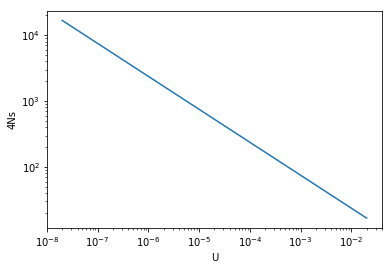

In [238]:
plt.plot(U_test,S_test)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("U")
plt.ylabel("4Ns")

In [239]:
S_test=[]
#4Ns
mu_test=4*N_test*u_test
for i in V_test :
    rho_test=(N_test*i*d_test)/(2*h_test)
    z_bar_test=np.sqrt(rho_test/(mu_test*alpha_test))
    S_test.append(4*N_test*alpha_test/2*z_bar_test)

Text(0,0.5,'4Ns')

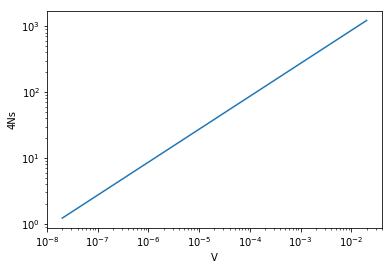

In [240]:
plt.plot(V_test,S_test)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("V")
plt.ylabel("4Ns")

In [241]:
#4Nu
fourNu_test=4*N_test*u_test
print(u_test)
print(fourNu_test)

0.00025
10.0


In [242]:
FourNu_test=[]
for i in U_test :
    FourNu_test.append(4*N_test*i)

Text(0,0.5,'4Nu')

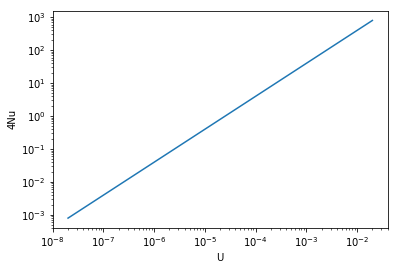

In [243]:
plt.plot(U_test,FourNu_test)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("U")
plt.ylabel("4Nu")

In [244]:
#z_bar
rho_test=(N_test*v_test*d_test)/(2*h_test)
mu_test=4*N_test*u_test
z_bar_test=np.sqrt(rho_test/(mu_test*alpha_test))
print(z_bar_test)

0.250511272708


In [245]:
Z_test=[]
rho_test=(N_test*v_test*d_test)/(2*h_test)
for i in U_test:
    mu_test=4*N_test*i
    z_bar_test=np.sqrt(rho_test/(mu_test*alpha_test))
    Z_test.append(z_bar_test)

Text(0,0.5,'Z')

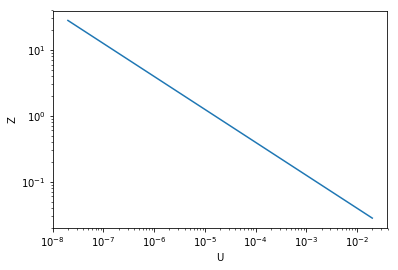

In [246]:
plt.plot(U_test,Z_test)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("U")
plt.ylabel("Z")

In [247]:
Z_test=[]
mu_test=4*N_test*u_test
for i in V_test:
    rho_test=(N_test*i*d_test)/(2*h_test)
    z_bar_test=np.sqrt(rho_test/(mu_test*alpha_test))
    Z_test.append(z_bar_test)

Text(0,0.5,'Z')

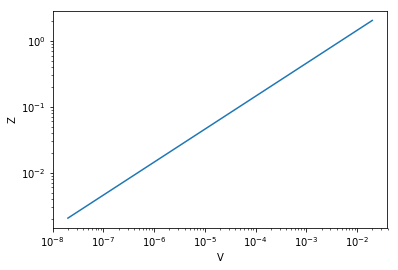

In [248]:
plt.plot(V_test,Z_test)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("V")
plt.ylabel("Z")

# Trouver param

In [110]:
N1=1000
h1=400
d1=6
coeff_gamma=0.3
x_0=simpson(x_0_func, 0, 10, 100)
x2_0=simpson(x2_0_func, 0, 10, 100)
x3_0=simpson(x3_0_func, 0, 10, 100)
x4_0=simpson(x4_0_func, 0, 10, 100)
q_0=(2*x2_0-x3_0)/(x_0)
beta_0=(-2*x3_0+x4_0+(2*x2_0**2)/(x_0)-(x3_0*x2_0)/(x_0))/(2*x_0**2)
alpha1=abs(d1*beta_0*np.exp(-d1*q_0))
print("alpha = ",alpha1)
umin=1/(4*N1)
umax=100/(4*N1)
uint=10/(4*N1)
print("umin = ",umin,", umax = ",umax," uint = ",uint)

alpha =  0.0218720447191
umin =  0.00025 , umax =  0.025  uint =  0.0025


In [2292]:
vmin=200*h1*umin/(N1*N1*alpha1*d1)
vMin=200*h1*umax/(N1*N1*alpha1*d1)
vminint=200*h1*uint/(N1*N1*alpha1*d1)
print("vmin = ",vmin,", vMin = ",vMin," vminint = ",vminint)

vmin =  0.000152401541609 , vMin =  0.0152401541609  vminint =  0.00152401541609


In [2293]:
print("v/u min = ",vmin/umin," v/u max = ",vMin/umax," v/u int = ",vminint/uint)

v/u min =  0.609606166435  v/u max =  0.609606166435  v/u int =  0.609606166435


In [2294]:
voveru_min=0.08*h1*alpha1/d1
voveru_max=0.25*8*h1*alpha1/d1
print("v/u min = ",voveru_min," v/u max = ",voveru_max)

v/u min =  0.116650905169  v/u max =  2.91627262922


In [2295]:
vmax=voveru_max*umin
vMax=voveru_max*umax
vmaxint=voveru_max*uint
print("vmax = ",vmax,", vMax = ",vMax," vmaxint = ",vmaxint)

vmax =  0.000729068157304 , vMax =  0.0729068157304  vmaxint =  0.00729068157304


## Verification

In [2296]:
U1=[2e-2,5e-3,2e-3,5e-4,2e-4,5e-5,2e-5]
V1=[2e-2,5e-3,2e-3,5e-4,2e-4,5e-5,2e-5]
v1=5e-4
u1=1e-3
print("v1 = ",v1)
print("u1 = ",u1)
print("v/u = ",v1/u1)

v1 =  0.0005
u1 =  0.001
v/u =  0.5


### scaling U

In [2297]:
NU=[]
for i in U1 :
    NU.append(4*N*i)

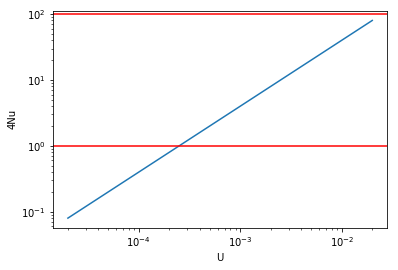

In [2298]:
plt.plot(U1,NU)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("U")
plt.ylabel("4Nu")
plt.axhline(y=1,color="red")
plt.axhline(y=100,color="red")

In [2299]:
S1=[]
#4Ns
rho1=(N1*v1*d1)/(2*h1)
for i in U1 :
    mu1=4*N1*i
    z_bar_1=np.sqrt(rho1/(mu1*alpha1))
    S1.append(4*N1*alpha1/2*z_bar_1)

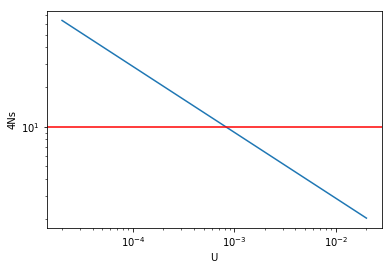

In [2300]:
plt.plot(U1,S1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("U")
plt.ylabel("4Ns")
plt.axhline(y=10,color="red")

In [2301]:
Z1=[]
rho1=(N1*v1*d1)/(2*h1)
for i in U1:
    mu1=4*N1*i
    z_bar_1=np.sqrt(rho1/(mu1*alpha1))
    Z1.append(z_bar_1)

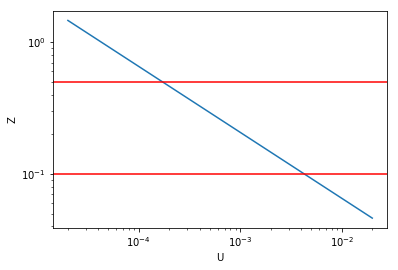

In [2302]:
plt.plot(U1,Z1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("U")
plt.ylabel("Z")
plt.axhline(y=0.1,color="red")
plt.axhline(y=0.5,color="red")

### scaling V

In [2303]:
S1=[]
#4Ns
mu1=4*N1*u1
for i in V1 :
    rho1=(N1*i*d1)/(2*h1)
    z_bar_1=np.sqrt(rho1/(mu1*alpha1))
    S1.append(4*N1*alpha1/2*z_bar_1)

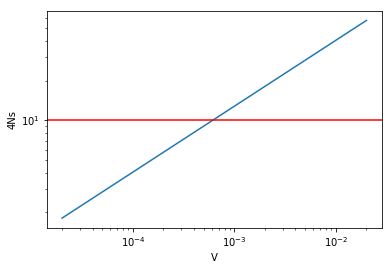

In [2304]:
plt.plot(V1,S1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("V")
plt.ylabel("4Ns")
plt.axhline(y=10,color="red")

In [2305]:
Z1=[]
mu1=4*N1*u1
for i in V1:
    rho1=(N1*i*d1)/(2*h1)
    z_bar_1=np.sqrt(rho1/(mu1*alpha1))
    Z1.append(z_bar_1)

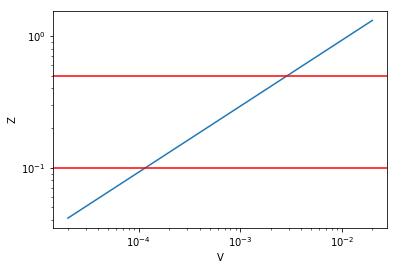

In [2306]:
plt.plot(V1,Z1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("V")
plt.ylabel("Z")
plt.axhline(y=0.1,color="red")
plt.axhline(y=0.5,color="red")

In [2307]:
voveruinf=200*h1/(N1*N1*alpha1*d1)
print("v/u_inf = ",voveruinf)

v/u_inf =  0.609606166435


In [2308]:
voverumin=0.01*8*h1*alpha1/d1
voverumax=0.25*8*h1*alpha1/d1
print("v/u_min",voverumin,"v/u_max",voverumax)

v/u_min 0.116650905169 v/u_max 2.91627262922


In [2309]:
print(N1*N1*alpha1*alpha1,N1*N1*alpha1*alpha1>=100)

478.386340196 True


In [2253]:
N=1000
umin=1/(4*N)
vmin=voveruinf*umin
vmax=voverumax*umin
print("umin = ",umin)
print("vmin = ",vmin," vmax = ",vmax)

umin =  0.00025
vmin =  4.36449231543e-05  vmax =  0.00366594757045


In [2254]:
umax=100/(4*N)
vmin=voveruinf*umax
vmax=voverumax*umax
print("umax = ",umax)
print("vmin = ",vmin," vmax = ",vmax)

umax =  0.025
vmin =  0.00436449231543  vmax =  0.366594757045


In [2255]:
uint=10/(4*N)
vmin=voveruinf*uint
vmax=voverumax*uint
print("uint = ",uint)
print("vmin = ",vmin," vmax = ",vmax)

uint =  0.0025
vmin =  0.000436449231543  vmax =  0.0366594757045


In [2352]:
u2=5e-3
v2=5e-4
D=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

In [2353]:
mu2=4*N1*u2
S=[]
for i in D:
    alpha2=abs(i*beta_0*np.exp(-i*q_0))
    rho2=(N1*v2*i)/(2*h1)
    S.append(N1*np.sqrt((alpha2*v2*i)/(2*h1*u2)))
    #z_bar_2=np.sqrt(rho2/(mu2*alpha2))
    #S.append(4*N1*alpha2/2*z_bar_2)

Text(0,0.5,'S')

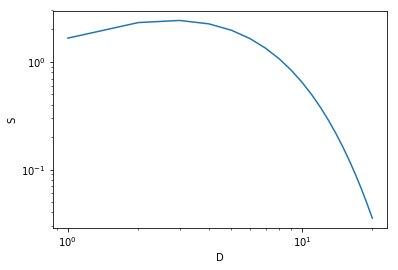

In [2354]:
plt.plot(D,S)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("D")
plt.ylabel("S")

In [2355]:
mu=4*N1*u2
Z=[]
for i in D:
    rho1=(N1*v2*i)/(2*h1)
    alpha2=abs(i*beta_0*np.exp(-i*q_0))
    Z.append(np.sqrt((v2*i)/(8*h1*u2*alpha2)))

Text(0,0.5,'Z')

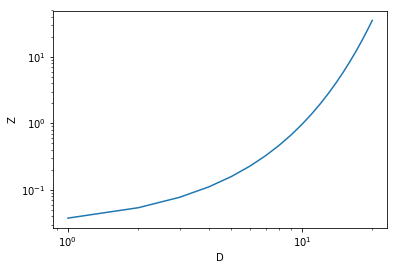

In [2356]:
plt.plot(D,Z)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("D")
plt.ylabel("Z")

In [2375]:
N=1000
coeff_gamma=0.5
x_0=simpson(x_0_func, 0, 10, 100)
x2_0=simpson(x2_0_func, 0, 10, 100)
x3_0=simpson(x3_0_func, 0, 10, 100)
x4_0=simpson(x4_0_func, 0, 10, 100)
q_0=(2*x2_0-x3_0)/(x_0)
beta_0=(-2*x3_0+x4_0+(2*x2_0**2)/(x_0)-(x3_0*x2_0)/(x_0))/(2*x_0**2)
A=[]
Abis=[]
Ater=[]
for i in D:
    A.append(abs(i*beta_0*np.exp(-i*q_0)))
    Abis.append(i/(0.2*abs(i*beta_0*np.exp(-i*q_0))))
    Ater.append(i*abs(i*beta_0*np.exp(-i*q_0))*N*N/2e4)

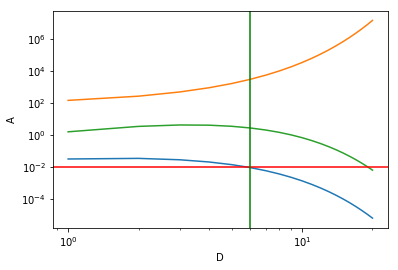

In [2376]:
plt.plot(D,A)
plt.plot(D,Abis)
plt.plot(D,Ater)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("D")
plt.ylabel("A")
plt.axhline(y=np.sqrt(100/(N*N)),color="red")
plt.axvline(x=6,color="green")

In [2260]:
N=1000
h=400
A1=[]
U1=[1/(4*N),10/(4*N),100/(4*N)]
#d=6
D=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
cg=[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]
for j in D:
    d=j
    A2=[]
    for i in cg:
        coeff_gamma=i
        x_0=simpson(x_0_func, 0, 10, 100)
        x2_0=simpson(x2_0_func, 0, 10, 100)
        x3_0=simpson(x3_0_func, 0, 10, 100)
        x4_0=simpson(x4_0_func, 0, 10, 100)
        q_0=(2*x2_0-x3_0)/(x_0)
        beta_0=(-2*x3_0+x4_0+(2*x2_0**2)/(x_0)-(x3_0*x2_0)/(x_0))/(2*x_0**2)
        A2.append(abs(d*beta_0*np.exp(-d*q_0)))
    A1.append(A2)

D =  1  coefflim_min =  0.9  alphalim_min =  0.0220279062573
 v/u_inf =  0.145270275015  v/u_min =  0.704893000234  v/u_max =  17.6223250059
 
u =  5e-05  vmin =  7.26351375074e-06  vmax =  0.000881116250293
u =  0.0005  vmin =  7.26351375074e-05  vmax =  0.00881116250293
u =  0.005  vmin =  0.000726351375074  vmax =  0.0881116250293
 
D =  2  coefflim_min =  0.9  alphalim_min =  0.0214359274804
 v/u_inf =  0.0746410437086  v/u_min =  0.342974839687  v/u_max =  8.57437099217
 
u =  5e-05  vmin =  3.73205218543e-06  vmax =  0.000428718549608
u =  0.0005  vmin =  3.73205218543e-05  vmax =  0.00428718549608
u =  0.005  vmin =  0.000373205218543  vmax =  0.0428718549608
 
D =  3  coefflim_min =  0.9  alphalim_min =  0.0156448931725
 v/u_inf =  0.0681798625856  v/u_min =  0.166878860507  v/u_max =  4.17197151266
 
u =  5e-05  vmin =  3.40899312928e-06  vmax =  0.000208598575633
u =  0.0005  vmin =  3.40899312928e-05  vmax =  0.00208598575633
u =  0.005  vmin =  0.000340899312928  vmax =  0.

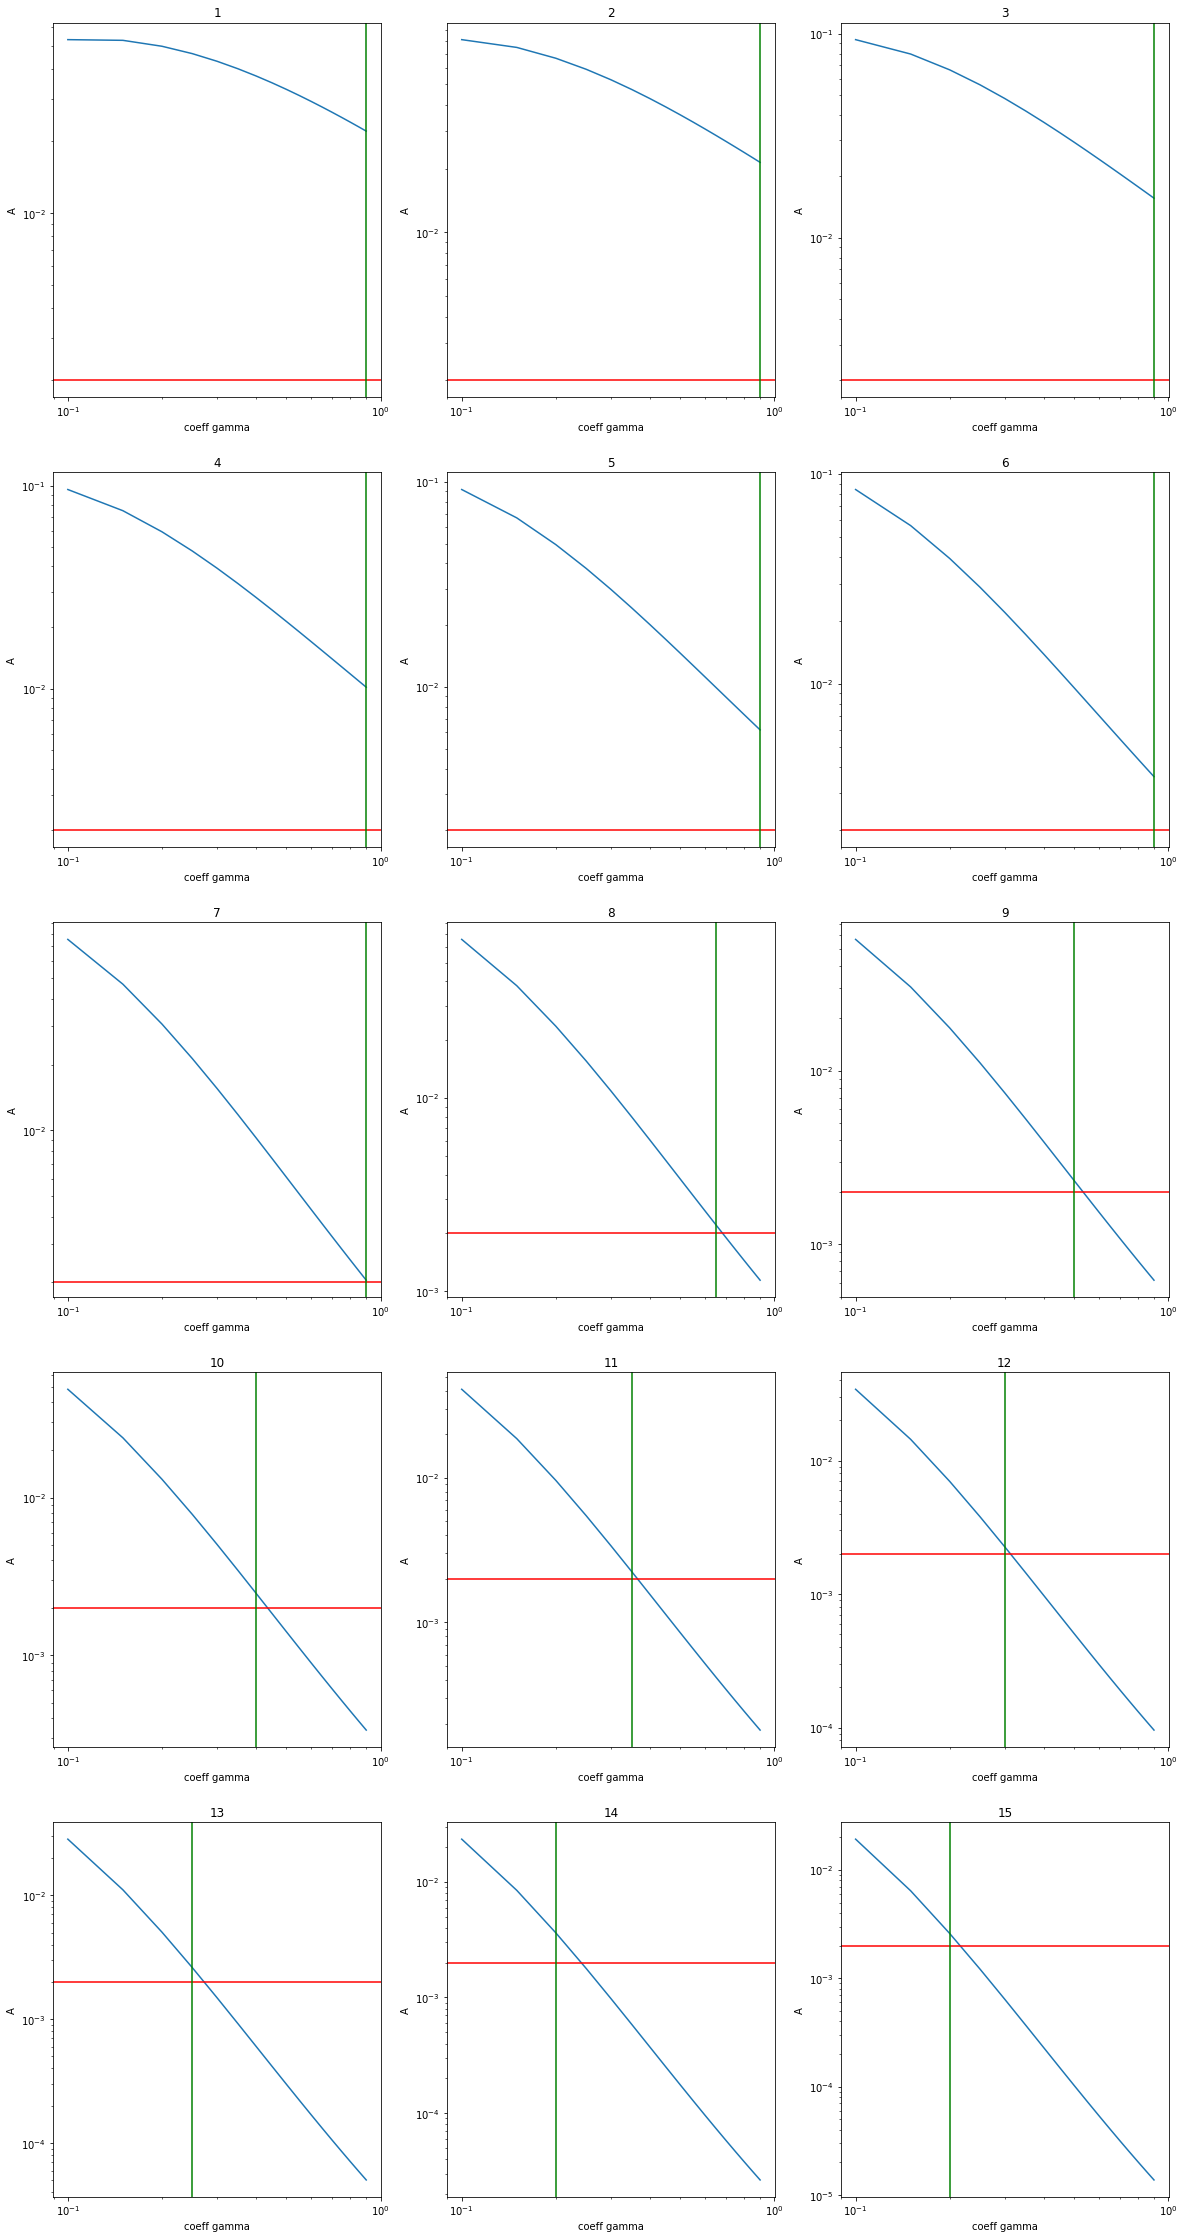

In [2259]:
index_parameter=0
plt.figure(1, figsize=(20,40))
for i in range(len(A1)):
    plt.subplot(5,3,index_parameter+1)
    plt.plot(cg,A1[i])
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("coeff gamma")
    plt.ylabel("A")
    plt.title(index_parameter+1)
    plt.axhline(y=np.sqrt(100/(N*N)),color="red")
    coefflim=0
    alphalim=0
    for j in range(len(A1[i])):
        if A1[i][j]>=np.sqrt(100/(N*N)):
            coefflim_min=cg[j]
            alphalim_min=A1[i][j]
    plt.axvline(x=coefflim_min,color="green")
    vsuruinf=200*h/(N*N*alphalim_min*D[index_parameter])
    vsurumin=0.08*h*alphalim_min/D[index_parameter]
    vsurumax=0.25*8*h*alphalim_min/D[index_parameter]
    ecart=vsurumax-vsuruinf
    print("D = ",D[index_parameter]," coefflim_min = ",coefflim_min," alphalim_min = ",alphalim_min)
    print(" v/u_inf = ",vsuruinf," v/u_min = ",vsurumin," v/u_max = ",vsurumax)
    print(" ")
    for k in U1:
        print("u = ",k," vmin = ",vsuruinf*k," vmax = ",vsurumax*k)
    print(" ")
    index_parameter+=1